# Modeling with manual feature selection (next year)

## Install packages

In [1]:
# Setting current working directory
import os
path = "/Users/fleurroijen/Library/Mobile Documents/com~apple~CloudDocs/Documents/University/Tilburg University MSc/TiU Spring 24:25/Master Thesis : Data Science in Action/Predicting-Tax-Avoidance"
os.chdir(path)

In [2]:
# Loading necessary packages
import datetime
import warnings
import pandas as pd
import numpy as np
from joblib import Parallel, delayed

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
from pandas.plotting import register_matplotlib_converters

# Optimization
import optuna
from optuna import Trial, visualization

# Scikit-learn
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score, precision_score,
    recall_score, f1_score, roc_auc_score, average_precision_score
)

# XGBoost
from xgboost import XGBClassifier

warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
# Loading the datasets
X_train_full = pd.read_csv('X_train_full.csv', index_col=0)
X_train = pd.read_csv('X_train.csv', index_col=0)
X_val = pd.read_csv('X_val.csv', index_col=0)
X_test = pd.read_csv('X_test.csv', index_col=0)
y_train_full = pd.read_csv('y_train_full.csv', index_col=0)
y_train = pd.read_csv('y_train.csv', index_col=0)
y_val = pd.read_csv('y_val.csv', index_col=0)
y_test = pd.read_csv('y_test.csv', index_col=0)

In [4]:
# Checking the datasets
print(X_train_full.shape)
print(y_train_full.shape)
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(43522, 77)
(43522, 1)
(34818, 77)
(34818, 1)
(8704, 77)
(8704, 1)
(7445, 77)
(7445, 1)


In [5]:
if isinstance(y_train_full, pd.DataFrame) and y_train_full.shape[1] == 1:
    y_train_full = y_train_full.squeeze()

In [6]:
if isinstance(y_train, pd.DataFrame) and y_train.shape[1] == 1:
    y_train = y_train.squeeze()

In [7]:
if not isinstance(y_train_full, pd.Series):
    y_train_full = pd.Series(y_train_full, name="tax_avoidance_ind")

In [8]:
if not isinstance(y_train, pd.Series):
    y_train = pd.Series(y_train, name="tax_avoidance_ind")

## Feature selection based on expert knowledge

In [ ]:
# Selecting the features
X_train_EK_full = X_train_full[['fyear_sin', 'fyear_cos', 'at_lag1', 'ceq_lag1',
                                'ch_lag1', 'che_lag1', 'cogs_lag1', 'dlc_lag1',
                                'dltt_lag1', 'ib_lag1', 'intan_lag1', 'pi_lag1',
                                'ppegt_lag1', 'ppent_lag1', 'revt_lag1', 'sale_lag1',
                                'txdb_lag1', 'txdi_lag1', 'txditc_lag1', 'txp_lag1',
                                'txt_lag1', 'txw_lag1', 'xsga_lag1', 'industry_Agriculture',
                                'industry_Industrial', 'industry_Transport',
                                'industry_Information', 'industry_Services', 'industry_Trade',
                                'industry_Finance', 'industry_Social', 'industry_Leisure',
                                'industry_Nonclassifiable', 'region_East', 'region_South',
                                'region_West', 'region_North']]

X_train_EK = X_train[['fyear_sin', 'fyear_cos', 'at_lag1', 'ceq_lag1', 'ch_lag1',
                      'che_lag1', 'cogs_lag1', 'dlc_lag1', 'dltt_lag1', 'ib_lag1',
                      'intan_lag1', 'pi_lag1', 'ppegt_lag1', 'ppent_lag1', 'revt_lag1',
                      'sale_lag1', 'txdb_lag1', 'txdi_lag1', 'txditc_lag1', 'txp_lag1',
                      'txt_lag1', 'txw_lag1', 'xsga_lag1', 'industry_Agriculture',
                      'industry_Industrial', 'industry_Transport', 'industry_Information',
                      'industry_Services', 'industry_Trade', 'industry_Finance',
                      'industry_Social', 'industry_Leisure', 'industry_Nonclassifiable',
                      'region_East', 'region_South', 'region_West', 'region_North']]

X_val_EK = X_val[['fyear_sin', 'fyear_cos', 'at_lag1', 'ceq_lag1', 'ch_lag1',
                  'che_lag1', 'cogs_lag1', 'dlc_lag1', 'dltt_lag1', 'ib_lag1',
                  'intan_lag1', 'pi_lag1', 'ppegt_lag1', 'ppent_lag1', 'revt_lag1',
                  'sale_lag1', 'txdb_lag1', 'txdi_lag1', 'txditc_lag1', 'txp_lag1',
                  'txt_lag1', 'txw_lag1', 'xsga_lag1', 'industry_Agriculture',
                  'industry_Industrial', 'industry_Transport', 'industry_Information',
                  'industry_Services', 'industry_Trade', 'industry_Finance',
                  'industry_Social', 'industry_Leisure', 'industry_Nonclassifiable',
                  'region_East', 'region_South', 'region_West', 'region_North']]

X_test_EK = X_test[['fyear_sin', 'fyear_cos', 'at_lag1', 'ceq_lag1', 'ch_lag1',
                    'che_lag1', 'cogs_lag1', 'dlc_lag1', 'dltt_lag1', 'ib_lag1',
                    'intan_lag1', 'pi_lag1', 'ppegt_lag1', 'ppent_lag1', 'revt_lag1',
                    'sale_lag1', 'txdb_lag1', 'txdi_lag1', 'txditc_lag1', 'txp_lag1',
                    'txt_lag1', 'txw_lag1', 'xsga_lag1', 'industry_Agriculture',
                    'industry_Industrial', 'industry_Transport', 'industry_Information',
                    'industry_Services', 'industry_Trade', 'industry_Finance',
                    'industry_Social', 'industry_Leisure', 'industry_Nonclassifiable',
                    'region_East', 'region_South', 'region_West', 'region_North']]

## Modeling

### Baseline logistic regression (no hyperparameter tuning)

In [10]:
# Instantiating the classifier 
model_lr = LogisticRegression(random_state=123)

# Fitting the model
model_lr.fit(X_train_EK_full, y_train_full)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=123)

In [11]:
# Making predictions (test set)
y_pred_lr = model_lr.predict(X_test_EK)
y_proba_lr = model_lr.predict_proba(X_test_EK)
y_proba_lr_pos = y_proba_lr[:, 1]

In [12]:
# Making predictions (train set)
y_pred_lr_train = model_lr.predict(X_train_EK_full)
y_proba_lr_train = model_lr.predict_proba(X_train_EK_full)
y_proba_lr_train_pos = y_proba_lr_train[:, 1]

#### Evaluating baseline logistic regression

In [13]:
# Creating a function for the evaluation metrics
def evaluate(y_true, y_pred, y_proba, classifier):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc_roc = roc_auc_score(y_true, y_proba)
    pr_auc = average_precision_score(y_true, y_proba)

    print(f"Evaluation metrics for {classifier}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC-ROC: {auc_roc:.4f}")
    print(f"Precision-Recall AUC: {pr_auc:.4f}")

In [14]:
# Evaluating the prediction performance (test set)
evaluate(y_test, y_pred_lr, y_proba_lr_pos, "baseline logistic regression with manual feature selection (test set)")

Evaluation metrics for baseline logistic regression with manual feature selection (test set):
Accuracy: 0.6392
Precision: 0.4070
Recall: 0.7431
F1 Score: 0.5259
AUC-ROC: 0.7294
Precision-Recall AUC: 0.4541


In [15]:
# Evaluating the prediction performance (train set)
evaluate(y_train_full, y_pred_lr_train, y_proba_lr_train_pos, "baseline logistic regression with manual feature selection (train set)")

Evaluation metrics for baseline logistic regression with manual feature selection (train set):
Accuracy: 0.6762
Precision: 0.6493
Recall: 0.7664
F1 Score: 0.7030
AUC-ROC: 0.7413
Precision-Recall AUC: 0.7220


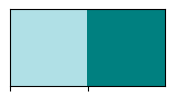

In [16]:
# Defining a smooth fading color gradient
color_codes = ["powderblue", "teal"]
fading_cmap = LinearSegmentedColormap.from_list("fading_blues", color_codes)

# Displaying the fading color palette (optional)
sns.palplot(sns.color_palette(color_codes))

In [17]:
# Code inspired by:
# https://medium.com/analytics-vidhya/evaluating-a-random-forest-model-9d165595ad56
def plot_confusion_matrix(y_true, y_pred, model_name):
    class_names = ['yes', 'no']

    # Computing and normalizing the confusion matrix
    matrix = confusion_matrix(y_true, y_pred)
    matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

    # Plotting
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    ax = sns.heatmap(matrix, annot=True, fmt=".2f", cmap=fading_cmap, 
                     xticklabels=class_names, yticklabels=class_names,
                     linewidths=0.2, vmin=0, vmax=1)

    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.tight_layout()
    plt.show()

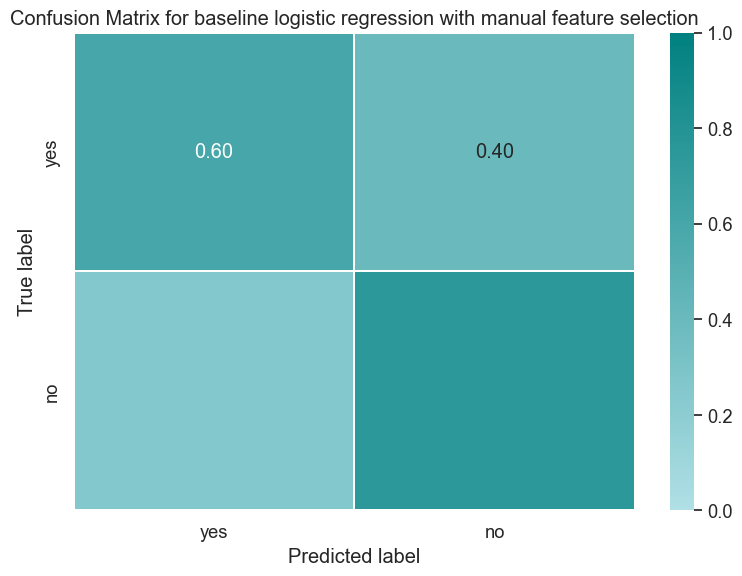

In [18]:
# Plotting the confusion matrix
plot_confusion_matrix(y_test, y_pred_lr, "baseline logistic regression with manual feature selection")

In [19]:
# Printing the classification report
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.86      0.60      0.71      5440
           1       0.41      0.74      0.53      2005

    accuracy                           0.64      7445
   macro avg       0.64      0.67      0.62      7445
weighted avg       0.74      0.64      0.66      7445



### Logistic regression

In [20]:
# Code inspired by:
# https://stackoverflow.com/questions/55591063/how-to-perform-smote-with-cross-validation-in-sklearn-in-python
# https://github.com/optuna/optuna
# https://medium.com/@taeefnajib/hyperparameter-tuning-using-optuna-c46d7b29a3e
# https://medium.com/@moussadoumbia_90919/mastering-hyperparameter-optimization-with-optuna-a-comprehensive-guide-0bd6b4b1bc67

# Defining an objective function to be maximized using pre-defined train/val splits
def objective_lr(trial):
    # Define all valid (solver, penalty) combos explicitly
    solver_penalty_combo = trial.suggest_categorical(
        'solver_penalty',
        [
            ('lbfgs', 'l2'),               # lbfgs only supports l2
            ('liblinear', 'l1'),
            ('liblinear', 'l2'),
            ('saga', 'l1'),
            ('saga', 'l2'),
            ('saga', 'elasticnet'),
        ]
    )
    
    solver, penalty = solver_penalty_combo
    
    C = trial.suggest_float("C", 1e-4, 1e4, log=True)
    tol = trial.suggest_float("tol", 1e-4, 1e-1, log=True)
    verbose = trial.suggest_int("verbose", 0, 1)
    
    params_lr = dict(solver=solver, penalty=penalty, C=C, tol=tol, verbose=verbose)
    
    if penalty == "elasticnet":
        l1_ratio = trial.suggest_float("l1_ratio", 0.0, 1.0)
        params_lr["l1_ratio"] = l1_ratio
    
    model_lr = LogisticRegression(**params_lr, random_state=123, n_jobs=-1)
    
    model_lr.fit(X_train_EK, y_train)
    
    y_pred = model_lr.predict(X_val_EK)
    f1 = f1_score(y_val, y_pred, average='binary')
    
    return float(f1)

# Running Optuna study
optuna.logging.set_verbosity(optuna.logging.DEBUG)
study_lr = optuna.create_study(direction='maximize')
study_lr.optimize(objective_lr, n_trials=100, n_jobs=-1, timeout=600)

# Printing results
print('Number of finished trials:', len(study_lr.trials))
print('Best parameters:', study_lr.best_trial.params)
print('Best F1 score:', study_lr.best_value)

[I 2025-05-16 18:16:17,124] A new study created in memory with name: no-name-7889e6b9-b27e-4a77-8113-43f39f2e8a73


[LibLinear][LibLinear]iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   1  #CD cycles 1
iter   1  #CD cycles 1
iter   3  #CD cycles 3
iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   4  #CD cycles 1
iter   2  #CD cycles 1


/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('saga', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, 

iter   2  #CD cycles 1
iter   3  #CD cycles 2
iter   3  #CD cycles 2
iter   3  #CD cycles 3
iter   4  #CD cycles 1
iter   4  #CD cycles 1
iter   4  #CD cycles 1
optimization finished, #iter = 4
iter   5  #CD cycles 5
Objective value = 55074.244693
#nonzeros/#features = 37/38
iter   5  #CD cycles 1
iter   6  #CD cycles 2
iter   6  #CD cycles 3
iter   7  #CD cycles 1
iter   5  #CD cycles 4
iter   7  #CD cycles 1
iter   8  #CD cycles 4
optimization finished, #iter = 8
Objective value = 59.781449
#nonzeros/#features = 12/38
iter   6  #CD cycles 3
iter   7  #CD cycles 1


[I 2025-05-16 18:16:17,354] Trial 5 finished with value: 0.6962264150943396 and parameters: {'solver_penalty': ('liblinear', 'l1'), 'C': 2.5855205706203437, 'tol': 0.050557972571023714, 'verbose': 0}. Best is trial 7 with value: 0.7.
[I 2025-05-16 18:16:17,368] Trial 7 finished with value: 0.7 and parameters: {'solver_penalty': ('liblinear', 'l1'), 'C': 0.0026805410361406172, 'tol': 0.0020183620083315903, 'verbose': 1}. Best is trial 7 with value: 0.7.


iter   8  #CD cycles 44
optimization finished, #iter = 8
Objective value = 6372.643171
#nonzeros/#features = 37/38
Epoch 1, change: 1
iter   8  #CD cycles 56
Epoch 2, change: 0.31365973
iter   9  #CD cycles 14


/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int,

Epoch 3, change: 0.18926693
Epoch 4, change: 0.13764013
iter  10  #CD cycles 8
Epoch 5, change: 0.10476282
[LibLinear]Epoch 6, change: 0.085542336


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[I 2025-05-16 18:16:17,945] Trial 6 finished with value: 0.6990740740740741 and parameters: {'solver_penalty': ('liblinear', 'l1'), 'C': 0.3022345651343875, 'tol': 0.017667033854848562, 'verbose': 0}. Best is trial 7 with value: 0.7.


iter  1 act 2.673e-01 pre 2.523e-01 delta 2.981e-01 f 4.093e+00 |g| 2.331e+00 CG   2
iter  11  #CD cycles 12
iter  2 act 1.058e-02 pre 1.026e-02 delta 2.981e-01 f 3.826e+00 |g| 2.795e-01 CG   3
Epoch 7, change: 0.071402904
iter  3 act 7.554e-05 pre 7.551e-05 delta 2.981e-01 f 3.815e+00 |g| 1.670e-02 CG   3
iter  4 act 4.911e-07 pre 4.911e-07 delta 2.981e-01 f 3.815e+00 |g| 1.365e-03 CG   3
iter  12  #CD cycles 3
Epoch 8, change: 0.060753489
iter  13  #CD cycles 3
iter  14  #CD cycles 2


/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, 

Epoch 1, change: 1
Epoch 2, change: 0.28652777
iter  15  #CD cycles 5


/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, 

Epoch 3, change: 0.16377801
iter  16  #CD cycles 5
Epoch 4, change: 0.11366316
Epoch 9, change: 0.051624947
iter  17  #CD cycles 2
iter  18  #CD cycles 1
Epoch 10, change: 0.044896742
Epoch 5, change: 0.081772003
Epoch 11, change: 0.039245801
Epoch 6, change: 0.064172954
Epoch 12, change: 0.034403629
Epoch 7, change: 0.051418968
Epoch 13, change: 0.030399702
Epoch 8, change: 0.041955082
Epoch 9, change: 0.034195293
Epoch 14, change: 0.026933994
Epoch 10, change: 0.028453211
Epoch 15, change: 0.02399402
Epoch 16, change: 0.02158526
Epoch 11, change: 0.023701039
Epoch 12, change: 0.019736178
Epoch 13, change: 0.016608852
Epoch 14, change: 0.013985077
Epoch 17, change: 0.019329877
Epoch 18, change: 0.017257693
Epoch 19, change: 0.015600121
Epoch 15, change: 0.011802333
Epoch 16, change: 0.010055165
Epoch 20, change: 0.014180151
Epoch 17, change: 0.0085323683
Epoch 18, change: 0.0072431958
Epoch 21, change: 0.012835592
Epoch 19, change: 0.0061773055
Epoch 22, change: 0.011699358
Epoch 20, 

[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.8s finished
[I 2025-05-16 18:16:19,682] Trial 8 finished with value: 0.6932026944274342 and parameters: {'solver_penalty': ('saga', 'l2'), 'C': 0.0005963527796390194, 'tol': 0.0029617620117328475, 'verbose': 1}. Best is trial 7 with value: 0.7.
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a

Epoch 26, change: 0.0081396871
Epoch 27, change: 0.0074508049
Epoch 28, change: 0.0068176039
iter  19  #CD cycles 207


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.8s finished
[I 2025-05-16 18:16:19,981] Trial 2 finished with value: 0.6995073891625616 and parameters: {'solver_penalty': ('saga', 'elasticnet'), 'C': 0.04605014394674982, 'tol': 0.0063613988001494206, 'verbose': 1, 'l1_ratio': 0.7831387374336963}. Best is trial 7 with value: 0.7.


convergence after 29 epochs took 2 seconds


/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, 

[LibLinear]iter  1 act 6.268e-01 pre 5.825e-01 delta 4.298e-01 f 8.279e+00 |g| 4.714e+00 CG   3
iter  2 act 2.220e-02 pre 2.091e-02 delta 4.298e-01 f 7.652e+00 |g| 5.211e-01 CG   3
iter  20  #CD cycles 57
iter  3 act 5.629e-04 pre 5.617e-04 delta 4.298e-01 f 7.630e+00 |g| 6.283e-02 CG   4


/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, 

Epoch 1, change: 1
Epoch 2, change: 0.20773572
Epoch 3, change: 0.085471735
Epoch 4, change: 0.04493102
Epoch 5, change: 0.02199921
Epoch 6, change: 0.01365898
Epoch 7, change: 0.0091718189
Epoch 8, change: 0.0080232397
Epoch 9, change: 0.0077975263
Epoch 10, change: 0.0071762624


[I 2025-05-16 18:16:21,007] Trial 17 finished with value: 0.6907499745598861 and parameters: {'solver_penalty': ('saga', 'l1'), 'C': 2946.100739946693, 'tol': 0.09950342890448285, 'verbose': 0}. Best is trial 13 with value: 0.7001461683023595.
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

Epoch 11, change: 0.0064620791
Epoch 12, change: 0.0059434651
Epoch 13, change: 0.0054444811
Epoch 14, change: 0.004985637
Epoch 15, change: 0.0045674606
Epoch 16, change: 0.0041703613


[I 2025-05-16 18:16:21,381] Trial 3 finished with value: 0.6817132059626286 and parameters: {'solver_penalty': ('lbfgs', 'l2'), 'C': 0.0010462625726828764, 'tol': 0.02925809911626296, 'verbose': 0}. Best is trial 13 with value: 0.7001461683023595.


Epoch 17, change: 0.0038106806
Epoch 18, change: 0.003468735
Epoch 19, change: 0.0031754029
Epoch 20, change: 0.0028981362
Epoch 21, change: 0.0026454582
Epoch 22, change: 0.0024029949
Epoch 23, change: 0.0021951502
Epoch 24, change: 0.0020045308
Epoch 25, change: 0.0018241908
Epoch 26, change: 0.0016631916
Epoch 27, change: 0.0015140613
Epoch 28, change: 0.0013822308
Epoch 29, change: 0.0012619696


/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, 

[LibLinear]iter  1 act 1.759e+05 pre 1.550e+05 delta 7.214e-01 f 1.821e+06 |g| 1.037e+06 CG   3
cg reaches trust region boundary
iter  2 act 3.072e+04 pre 2.826e+04 delta 7.983e-01 f 1.645e+06 |g| 1.470e+05 CG   6
cg reaches trust region boundary
iter  3 act 7.188e+03 pre 6.619e+03 delta 9.255e-01 f 1.614e+06 |g| 3.776e+04 CG   6
cg reaches trust region boundary
iter  4 act 3.475e+03 pre 5.759e+03 delta 7.103e-01 f 1.607e+06 |g| 2.519e+04 CG   5
Epoch 30, change: 0.0011505312
cg reaches trust region boundary
iter  5 act 4.610e+03 pre 4.884e+03 delta 7.103e-01 f 1.604e+06 |g| 2.087e+04 CG   6
cg reaches trust region boundary
iter  6 act 2.794e+03 pre 4.367e+03 delta 5.492e-01 f 1.599e+06 |g| 1.992e+04 CG   6
iter  27  #CD cycles 9
cg reaches trust region boundary
iter  7 act 2.697e+03 pre 3.100e+03 delta 5.492e-01 f 1.596e+06 |g| 1.573e+04 CG   5
Epoch 31, change: 0.0010460448
iter  28  #CD cycles 5
cg reaches trust region boundary
iter  29  #CD cycles 2
iter  8 act 1.677e+03 pre 3.175e

[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.1s finished
[I 2025-05-16 18:16:21,856] Trial 16 finished with value: 0.6621004566210046 and parameters: {'solver_penalty': ('saga', 'l2'), 'C': 0.00010833439498631779, 'tol': 0.0004859896289031056, 'verbose': 1}. Best is trial 13 with value: 0.7001461683023595.


cg reaches trust region boundary
Epoch 35, change: 0.00072304521
iter 13 act 2.026e+03 pre 2.086e+03 delta 7.885e-01 f 1.585e+06 |g| 1.153e+04 CG   7
iter  30  #CD cycles 31
iter  31  #CD cycles 2
cg reaches trust region boundary
iter 14 act 2.131e+03 pre 2.124e+03 delta 8.230e-01 f 1.583e+06 |g| 1.301e+04 CG   8
iter  32  #CD cycles 3
Epoch 36, change: 0.0006612696
iter  33  #CD cycles 1
cg reaches trust region boundary
iter 15 act 2.208e+03 pre 2.211e+03 delta 9.690e-01 f 1.581e+06 |g| 1.192e+04 CG   8
Epoch 37, change: 0.00060149375
cg reaches trust region boundary
iter 16 act 1.783e+03 pre 1.768e+03 delta 1.030e+00 f 1.579e+06 |g| 1.066e+04 CG   8
Epoch 38, change: 0.00054934829
cg reaches trust region boundary
iter 17 act 1.844e+03 pre 1.812e+03 delta 1.080e+00 f 1.577e+06 |g| 1.340e+04 CG   9
Epoch 39, change: 0.00050133423
cg reaches trust region boundary
iter 18 act 1.589e+03 pre 1.571e+03 delta 1.125e+00 f 1.575e+06 |g| 8.046e+03 CG  11
cg reaches trust region boundary
iter 19

/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, 

iter 20 act 1.117e+03 pre 1.109e+03 delta 1.293e+00 f 1.572e+06 |g| 7.164e+03 CG  12
iter  1 act 7.606e+04 pre 6.702e+04 delta 7.214e-01 f 7.876e+05 |g| 4.485e+05 CG   3
cg reaches trust region boundary
iter  2 act 1.329e+04 pre 1.222e+04 delta 7.983e-01 f 7.115e+05 |g| 6.359e+04 CG   6
cg reaches trust region boundary
iter  3 act 3.109e+03 pre 2.863e+03 delta 9.255e-01 f 6.982e+05 |g| 1.633e+04 CG   6
cg reaches trust region boundary
iter  4 act 1.502e+03 pre 2.490e+03 delta 7.101e-01 f 6.951e+05 |g| 1.089e+04 CG   5
iter 21 act 4.819e+02 pre 4.744e+02 delta 1.293e+00 f 1.571e+06 |g| 2.251e+04 CG   9
cg reaches trust region boundary
iter  5 act 1.994e+03 pre 2.112e+03 delta 7.101e-01 f 6.936e+05 |g| 9.027e+03 CG   6
cg reaches trust region boundary
iter  6 act 1.208e+03 pre 1.888e+03 delta 5.491e-01 f 6.916e+05 |g| 8.613e+03 CG   6
cg reaches trust region boundary
iter 22 act 6.662e+02 pre 6.564e+02 delta 1.561e+00 f 1.570e+06 |g| 2.077e+03 CG  10
RUNNING THE L-BFGS-B CODE

          

 This problem is unconstrained.
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[I 2025-05-16 18:16:22,194] Trial 4 finished with value: 0.699055330634278 and parameters: {'solver_penalty': ('saga', 'l2'), 'C': 20.598723870800914, 'tol': 0.0024908847052043884, 'verbose': 0}. Best is trial 13 with value: 0.7001461683023595.
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warning

iter  7 act 1.165e+03 pre 1.339e+03 delta 5.491e-01 f 6.904e+05 |g| 6.791e+03 CG   5
cg reaches trust region boundary
iter 23 act 8.472e+02 pre 8.295e+02 delta 1.730e+00 f 1.570e+06 |g| 4.517e+03 CG  16
cg reaches trust region boundary
iter  8 act 7.251e+02 pre 1.373e+03 delta 3.912e-01 f 6.892e+05 |g| 6.964e+03 CG   6
cg reaches trust region boundary
iter  9 act 8.356e+02 pre 8.677e+02 delta 4.256e-01 f 6.885e+05 |g| 4.609e+03 CG   5
cg reaches trust region boundary
iter 10 act 6.117e+02 pre 6.652e+02 delta 4.256e-01 f 6.877e+05 |g| 4.638e+03 CG   6
cg reaches trust region boundary
cg reaches trust region boundary
[LibLinear]iter 24 act 6.599e+02 pre 6.458e+02 delta 1.777e+00 f 1.569e+06 |g| 4.844e+03 CG  19
iter  1 act 1.324e+07 pre 1.167e+07 delta 7.214e-01 f 1.371e+08 |g| 7.805e+07 CG   3
iter 11 act 7.953e+02 pre 7.700e+02 delta 5.593e-01 f 6.871e+05 |g| 5.885e+03 CG   6
cg reaches trust region boundary
iter  2 act 2.313e+06 pre 2.127e+06 delta 7.983e-01 f 1.238e+08 |g| 1.107e+07 

[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.4s finished


cg reaches trust region boundary
iter 13 act 8.798e+02 pre 8.987e+02 delta 7.953e-01 f 6.855e+05 |g| 4.972e+03 CG   7

At iterate   50    f=  5.97894D-01    |proj g|=  1.08341D-03
cg reaches trust region boundary
cg reaches trust region boundary
iter  8 act 1.263e+05 pre 2.391e+05 delta 3.914e-01 f 1.200e+08 |g| 1.210e+06 CG   6
iter 25 act 5.517e+02 pre 5.391e+02 delta 1.925e+00 f 1.568e+06 |g| 6.769e+03 CG  22
cg reaches trust region boundary
cg reaches trust region boundary
iter  9 act 1.459e+05 pre 1.514e+05 delta 4.262e-01 f 1.198e+08 |g| 8.047e+05 CG   5
iter 14 act 9.096e+02 pre 9.001e+02 delta 8.277e-01 f 6.846e+05 |g| 5.580e+03 CG   8

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

    

[I 2025-05-16 18:16:22,528] Trial 18 finished with value: 0.7048161028559384 and parameters: {'solver_penalty': ('lbfgs', 'l2'), 'C': 71.1803743158674, 'tol': 0.0004769608440982811, 'verbose': 1}. Best is trial 18 with value: 0.7048161028559384.
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent st

cg reaches trust region boundary
iter 15 act 1.710e+05 pre 1.710e+05 delta 9.811e-01 f 1.190e+08 |g| 8.679e+05 CG   8
cg reaches trust region boundary
cg reaches trust region boundary
iter 19 act 6.300e+02 pre 6.208e+02 delta 1.385e+00 f 6.804e+05 |g| 3.969e+03 CG  12
iter 16 act 1.159e+05 pre 1.412e+05 delta 9.811e-01 f 1.188e+08 |g| 6.013e+05 CG   8
cg reaches trust region boundary
iter 28 act 2.522e+02 pre 2.417e+02 delta 2.331e+00 f 1.567e+06 |g| 2.426e+03 CG  27
iter 20 act 2.056e+02 pre 2.026e+02 delta 1.385e+00 f 6.797e+05 |g| 1.158e+04 CG   5
cg reaches trust region boundary
iter 17 act 1.177e+05 pre 2.219e+05 delta 6.943e-01 f 1.187e+08 |g| 9.368e+05 CG   9
cg reaches trust region boundary
iter 21 act 3.495e+02 pre 3.437e+02 delta 1.554e+00 f 6.795e+05 |g| 1.063e+03 CG  11
cg reaches trust region boundary
iter 18 act -1.333e+05 pre 1.380e+05 delta 2.304e-01 f 1.186e+08 |g| 6.196e+05 CG   7
cg reaches trust region boundary
iter 18 act 5.372e+04 pre 5.879e+04 delta 2.304e-01 f 1

[I 2025-05-16 18:16:23,190] Trial 19 finished with value: 0.7037271004421983 and parameters: {'solver_penalty': ('liblinear', 'l2'), 'C': 75.44885713133229, 'tol': 0.0008045747588269067, 'verbose': 1}. Best is trial 18 with value: 0.7048161028559384.


cg reaches trust region boundary
iter 25 act 1.658e+02 pre 1.599e+02 delta 2.096e+00 f 6.782e+05 |g| 1.049e+03 CG  23
cg reaches trust region boundary
iter 26 act 4.872e+04 pre 4.847e+04 delta 8.313e-01 f 1.183e+08 |g| 3.515e+05 CG  11
cg reaches trust region boundary
iter 27 act 4.642e+04 pre 4.561e+04 delta 9.035e-01 f 1.182e+08 |g| 3.185e+05 CG  13
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           38     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  1.42939D-01


/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, 

cg reaches trust region boundary
iter 26 act 1.126e+02 pre 1.084e+02 delta 2.266e+00 f 6.780e+05 |g| 1.269e+03 CG  25
cg reaches trust region boundary
iter 28 act 4.201e+04 pre 4.318e+04 delta 9.758e-01 f 1.182e+08 |g| 3.543e+05 CG  14
cg reaches trust region boundary
iter 29 act 3.714e+04 pre 3.583e+04 delta 1.016e+00 f 1.181e+08 |g| 3.268e+05 CG  15

At iterate   50    f=  5.97609D-01    |proj g|=  1.07094D-03
cg reaches trust region boundary
iter 30 act 3.713e+04 pre 3.648e+04 delta 1.098e+00 f 1.181e+08 |g| 7.026e+05 CG  16
cg reaches trust region boundary
iter 27 act 5.740e+01 pre 5.315e+01 delta 2.483e+00 f 6.779e+05 |g| 5.413e+02 CG  41
cg reaches trust region boundary
iter 31 act 3.103e+04 pre 3.039e+04 delta 1.213e+00 f 1.181e+08 |g| 3.488e+05 CG  16


/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, 


At iterate  100    f=  5.96501D-01    |proj g|=  2.84948D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   38    100    111      1     0     0   2.849D-04   5.965D-01
  F =  0.59650093526722681     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
cg reaches trust region boundary
iter 32 act 2.619e+04 pre 2.608e+04 delta 1.283e+00 f 1.180e+08 |g| 2.360e+05 CG  20
cg reaches trust region boundary
iter 33 act 2.303e+04 pre 2.269e+04 delta 1.400e+00 f 1.180e+08 |g| 2.110e+05 CG  21
cg reaches trust region boundary
iter 34 act 1.887e+04 pre 1.867e+04 delta 1.534e+00 f 1.180e+08 |g| 1.925e+05 CG  23


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[I 2025-05-16 18:16:23,915] Trial 0 finished with value: 0.699055330634278 and parameters: {'solver_penalty': ('saga', 'elasticnet'), 'C': 116.26210496370457, 'tol': 0.0010438729562971402, 'verbose': 0, 'l1_ratio': 0.8897490167247605}. Best is trial 18 with value: 0.7048161028559384.
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
 

cg reaches trust region boundary
iter 35 act 1.526e+04 pre 1.487e+04 delta 1.674e+00 f 1.180e+08 |g| 2.158e+05 CG  25
cg reaches trust region boundary
iter 36 act 1.204e+04 pre 1.179e+04 delta 1.834e+00 f 1.179e+08 |g| 8.006e+04 CG  27
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           38     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  1.42939D-01


[I 2025-05-16 18:16:24,336] Trial 11 finished with value: 0.699252801992528 and parameters: {'solver_penalty': ('saga', 'elasticnet'), 'C': 5668.6547770060315, 'tol': 0.003957890887082834, 'verbose': 0, 'l1_ratio': 0.348702407213193}. Best is trial 18 with value: 0.7048161028559384.
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool

cg reaches trust region boundary
iter 37 act 9.226e+03 pre 8.947e+03 delta 2.048e+00 f 1.179e+08 |g| 7.072e+04 CG  35
cg reaches trust region boundary
iter 38 act 6.306e+03 pre 6.068e+03 delta 2.334e+00 f 1.179e+08 |g| 4.448e+04 CG  37

At iterate   50    f=  5.97745D-01    |proj g|=  1.98027D-03
iter 39 act 1.317e+03 pre 1.317e+03 delta 2.334e+00 f 1.179e+08 |g| 8.902e+04 CG  13


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.0s finished
[I 2025-05-16 18:16:24,709] Trial 21 finished with value: 0.703664700926706 and parameters: {'solver_penalty': ('liblinear', 'l2'), 'C': 5679.639889667658, 'tol': 0.00011792745273018747, 'verbose': 1}. Best is trial 18 with value: 0.7048161028559384.
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, 

cg reaches trust region boundary
iter 40 act 2.922e+03 pre 2.690e+03 delta 2.664e+00 f 1.179e+08 |g| 7.438e+03 CG  34

At iterate  100    f=  5.96534D-01    |proj g|=  6.71444D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   38    100    110      1     0     0   6.714D-04   5.965D-01
  F =  0.59653372292372486     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
iter 41 act 1.037e+03 pre 1.037e+03 delta 2.664e+00 f 1.179e+08 |g| 3.382e+04 CG  32


/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           38     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  1.42939D-01
[LibLinear]iter  1 act 6.947e+03 pre 6.122e+03 delta 7.213e-01 f 7.193e+04 |g| 4.096e+04 CG   3
cg reaches trust region boundary
iter  2 act 1.213e+03 pre 1.116e+03 delta 7.983e-01 f 6.499e+04 |g| 5.808e+03 CG   6
cg reaches trust region boundary
iter  3 act 2.836e+02 pre 2.612e+02 delta 9.255e-01 f 6.377e+04 |g| 1.491e+03 CG   6

At iterate   50    f=  5.97573D-01    |proj g|=  1.28746D-03
cg reaches trust region boundary
iter  4 act 1.358e+02 pre 2.261e+02 delta 7.076e-01 f 6.349e+04 |g| 9.912e+02 CG   5
[LibLinear]iter  1 act 8.676e+03 pre 7.645e+03 delta 7.213e-01 f 8.983e+04 |g| 5.115e+04 CG   3
cg reaches trust region boundary
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           38     M =           10

At X0         0

 This problem is unconstrained.


cg reaches trust region boundary
iter  3 act 3.543e+02 pre 3.263e+02 delta 9.255e-01 f 7.964e+04 |g| 1.862e+03 CG   6
cg reaches trust region boundary
iter  4 act 1.700e+02 pre 2.827e+02 delta 7.081e-01 f 7.929e+04 |g| 1.239e+03 CG   5
cg reaches trust region boundary
iter  5 act 1.813e+02 pre 1.925e+02 delta 7.076e-01 f 6.335e+04 |g| 8.237e+02 CG   6
cg reaches trust region boundary
iter  6 act 1.088e+02 pre 1.712e+02 delta 5.465e-01 f 6.317e+04 |g| 7.839e+02 CG   6
cg reaches trust region boundary
iter  7 act 1.033e+02 pre 1.194e+02 delta 5.465e-01 f 6.306e+04 |g| 6.000e+02 CG   5
cg reaches trust region boundary
iter  5 act 2.266e+02 pre 2.405e+02 delta 7.081e-01 f 7.912e+04 |g| 1.029e+03 CG   6
cg reaches trust region boundary
iter  8 act 6.581e+01 pre 1.244e+02 delta 3.894e-01 f 6.296e+04 |g| 6.503e+02 CG   6
cg reaches trust region boundary
iter  6 act 1.363e+02 pre 2.142e+02 delta 5.471e-01 f 7.889e+04 |g| 9.798e+02 CG   6
cg reaches trust region boundary
cg reaches trust region

[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.4s finished
 This problem is unconstrained.
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.7s finished


iter 10 act 6.726e+01 pre 7.326e+01 delta 4.211e-01 f 7.845e+04 |g| 5.383e+02 CG   6
cg reaches trust region boundary
iter 12 act 6.779e+01 pre 6.883e+01 delta 6.996e-01 f 6.269e+04 |g| 3.523e+02 CG   6
cg reaches trust region boundary
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           38     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  1.42939D-01

At iterate   50    f=  5.97714D-01    |proj g|=  3.47370D-03
iter 11 act 9.011e+01 pre 8.728e+01 delta 5.533e-01 f 7.838e+04 |g| 7.000e+02 CG   6
cg reaches trust region boundary
iter 13 act 7.166e+01 pre 8.143e+01 delta 7.193e-01 f 6.263e+04 |g| 4.433e+02 CG   7
cg reaches trust region boundary
iter 12 act 8.518e+01 pre 8.629e+01 delta 7.038e-01 f 7.829e+04 |g| 4.412e+02 CG   6
cg reaches trust region boundary
iter 14 act 5.420e+01 pre 9.592e+01 delta 5.269e-01 f 6.255e+04 |g| 4.839e+02 CG   8
cg reaches trust region boundary
i

[I 2025-05-16 18:16:25,472] Trial 24 finished with value: 0.7020063357972545 and parameters: {'solver_penalty': ('lbfgs', 'l2'), 'C': 77.33004394610441, 'tol': 0.0001112187770997255, 'verbose': 1}. Best is trial 18 with value: 0.7048161028559384.


cg reaches trust region boundary
iter 19 act 9.206e+00 pre 1.463e+01 delta 4.749e-02 f 7.794e+04 |g| 4.829e+02 CG   4
cg reaches trust region boundary
iter 23 act 4.026e+00 pre 4.267e+00 delta 7.385e-02 f 6.239e+04 |g| 1.641e+02 CG   4
cg reaches trust region boundary
cg reaches trust region boundary
iter 24 act 6.642e+00 pre 6.685e+00 delta 1.289e-01 f 6.239e+04 |g| 2.059e+02 CG   4
iter 20 act 6.161e+00 pre 7.911e+00 delta 4.749e-02 f 7.793e+04 |g| 3.634e+02 CG   4
cg reaches trust region boundary
cg reaches trust region boundary
iter 21 act 4.183e+00 pre 5.277e+00 delta 4.749e-02 f 7.792e+04 |g| 2.121e+02 CG   4
iter 25 act 9.569e+00 pre 1.006e+01 delta 2.194e-01 f 6.238e+04 |g| 1.571e+02 CG   4
cg reaches trust region boundary
iter 26 act 1.440e+01 pre 1.560e+01 delta 2.515e-01 f 6.237e+04 |g| 2.533e+02 CG   5
cg reaches trust region boundary
iter 22 act 5.882e+00 pre 6.083e+00 delta 6.307e-02 f 7.792e+04 |g| 2.648e+02 CG   4
cg reaches trust region boundary
iter 23 act 5.792e+00 p

/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, 

cg reaches trust region boundary
iter  4 act 1.902e+02 pre 3.162e+02 delta 7.084e-01 f 8.862e+04 |g| 1.385e+03 CG   5
cg reaches trust region boundary
iter 30 act 5.118e+00 pre 5.115e+00 delta 8.273e-02 f 7.785e+04 |g| 1.753e+02 CG   4
[LibLinear]cg reaches trust region boundary
iter 31 act 7.220e+00 pre 7.700e+00 delta 1.202e-01 f 7.785e+04 |g| 2.291e+02 CG   4
cg reaches trust region boundary
iter 31 act 2.214e+00 pre 2.428e+00 delta 4.426e-02 f 6.234e+04 |g| 1.239e+02 CG   4
iter  1 act 1.106e+06 pre 9.747e+05 delta 7.214e-01 f 1.145e+07 |g| 6.522e+06 CG   3
cg reaches trust region boundary
iter  5 act 2.534e+02 pre 2.689e+02 delta 7.084e-01 f 8.843e+04 |g| 1.150e+03 CG   6
cg reaches trust region boundary
iter  2 act 1.932e+05 pre 1.777e+05 delta 7.983e-01 f 1.035e+07 |g| 9.248e+05 CG   6
cg reaches trust region boundary
iter 32 act 3.940e+00 pre 4.001e+00 delta 6.155e-02 f 6.234e+04 |g| 2.049e+02 CG   4
cg reaches trust region boundary
iter  3 act 4.521e+04 pre 4.163e+04 delta 9.2

 This problem is unconstrained.
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.6s finished
[I 2025-05-16 18:16:26,081] Trial 26 finished with value: 0.7025202994832859 and parameters: {'solver_penalty': ('lbfgs', 'l2'), 'C': 4.403736732424313, 'tol': 0.00016220140050203708, 'verbose': 1}. Best is trial 18 with value: 0.7048161028559384.


cg reaches trust region boundary
cg reaches trust region boundary
cg reaches trust region boundary
iter 16 act 1.817e+03 pre 1.104e+04 delta 5.011e-01 f 9.928e+06 |g| 4.986e+04 CG   9
iter 43 act 6.451e+00 pre 7.461e+00 delta 1.035e-01 f 7.775e+04 |g| 2.086e+02 CG   5
iter 16 act 9.271e+01 pre 9.771e+01 delta 1.128e+00 f 8.706e+04 |g| 4.101e+02 CG   8
cg reaches trust region boundary
cg reaches trust region boundary

At iterate   50    f=  5.99061D-01    |proj g|=  8.83947D-04
iter 45 act 1.057e+01 pre 1.067e+01 delta 3.235e-01 f 6.219e+04 |g| 1.220e+02 CG   7
iter 17 act 3.768e+03 pre 1.996e+04 delta 2.505e-01 f 9.926e+06 |g| 8.761e+04 CG   3
cg reaches trust region boundary
iter 18 act 1.042e+04 pre 1.052e+04 delta 2.505e-01 f 9.922e+06 |g| 1.547e+05 CG   6
cg reaches trust region boundary
iter 17 act 9.997e+01 pre 9.938e+01 delta 1.216e+00 f 8.697e+04 |g| 5.655e+02 CG   9
cg reaches trust region boundary
cg reaches trust region boundary
iter 19 act 3.205e+02 pre 3.419e+03 delta 1.25

/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, 

iter 48 act 1.150e+01 pre 1.144e+01 delta 4.464e-01 f 6.216e+04 |g| 1.287e+02 CG   9
cg reaches trust region boundary
iter 23 act 2.723e+02 pre 7.486e+02 delta 3.330e-02 f 9.907e+06 |g| 2.880e+04 CG   4
iter 44 act 7.292e+00 pre 9.160e+00 delta 1.035e-01 f 7.774e+04 |g| 2.687e+02 CG   6
cg reaches trust region boundary
iter 24 act 6.135e+02 pre 6.831e+02 delta 3.330e-02 f 9.907e+06 |g| 4.409e+04 CG   4
cg reaches trust region boundary
iter 19 act 6.659e+01 pre 6.485e+01 delta 1.405e+00 f 8.678e+04 |g| 3.063e+02 CG  14
cg reaches trust region boundary
[LibLinear]cg reaches trust region boundary
cg reaches trust region boundary
iter  1 act 3.454e+04 pre 3.043e+04 delta 7.214e-01 f 3.576e+05 |g| 2.036e+05 CG   3
iter 25 act 2.165e+02 pre 2.516e+02 delta 3.330e-02 f 9.906e+06 |g| 1.602e+04 CG   4
cg reaches trust region boundary
cg reaches trust region boundary
iter 45 act 3.870e+00 pre 8.383e+00 delta 7.022e-02 f 7.774e+04 |g| 1.866e+02 CG   5
iter  2 act 6.034e+03 pre 5.550e+03 delta 7.9

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.6s finished
[I 2025-05-16 18:16:26,436] Trial 27 finished with value: 0.7024060785141409 and parameters: {'solver_penalty': ('lbfgs', 'l2'), 'C': 2.4341174747756074, 'tol': 0.00011835729931033972, 'verbose': 1}. Best is trial 18 with value: 0.7048161028559384.
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, fl

iter 30 act 2.113e+03 pre 2.123e+03 delta 3.689e-01 f 9.903e+06 |g| 3.337e+04 CG   5
iter 51 act 1.061e+01 pre 1.053e+01 delta 5.490e-01 f 6.212e+04 |g| 1.218e+02 CG  11
cg reaches trust region boundary
iter 31 act 2.296e+03 pre 2.307e+03 delta 3.824e-01 f 9.901e+06 |g| 2.699e+04 CG   6
cg reaches trust region boundary
iter  8 act 3.290e+02 pre 6.227e+02 delta 3.910e-01 f 3.130e+05 |g| 3.170e+03 CG   6
cg reaches trust region boundary
iter 51 act 3.493e+00 pre 3.546e+00 delta 9.792e-02 f 7.772e+04 |g| 1.014e+02 CG   3
cg reaches trust region boundary
iter 21 act 4.029e+01 pre 3.724e+01 delta 1.740e+00 f 8.666e+04 |g| 2.662e+02 CG  16
[LibLinear]cg reaches trust region boundary
cg reaches trust region boundary
iter 16 act 2.626e+03 pre 1.303e+04 delta 4.988e-01 f 1.212e+07 |g| 6.101e+04 CG   9
cg reaches trust region boundary
iter  9 act 3.781e+02 pre 3.927e+02 delta 4.250e-01 f 3.127e+05 |g| 2.085e+03 CG   5
cg reaches trust region boundary
iter 52 act 6.323e+00 pre 6.327e+00 delta 1.5

[I 2025-05-16 18:16:26,862] Trial 31 finished with value: 0.7027710462543463 and parameters: {'solver_penalty': ('liblinear', 'l2'), 'C': 4.160259650054734, 'tol': 0.0002493057856943783, 'verbose': 1}. Best is trial 18 with value: 0.7048161028559384.


cg reaches trust region boundary
iter 40 act 1.800e+03 pre 1.785e+03 delta 3.498e-01 f 9.884e+06 |g| 2.143e+04 CG   8
cg reaches trust region boundary
iter 13 act 3.265e+02 pre 3.297e+02 delta 8.076e-01 f 2.533e+05 |g| 1.822e+03 CG   7
cg reaches trust region boundary
cg reaches trust region boundary
iter 17 act 3.403e+02 pre 3.409e+02 delta 1.170e+00 f 3.097e+05 |g| 1.602e+03 CG  10
iter 59 act 2.510e+01 pre 2.559e+01 delta 8.780e-01 f 7.757e+04 |g| 1.951e+02 CG  12
cg reaches trust region boundary
iter 28 act 5.661e+03 pre 5.290e+03 delta 6.943e-01 f 1.209e+07 |g| 4.866e+04 CG   7
cg reaches trust region boundary
iter 41 act 1.833e+03 pre 1.868e+03 delta 3.896e-01 f 9.882e+06 |g| 2.071e+04 CG   9
cg reaches trust region boundary
iter 56 act 3.744e+00 pre 3.704e+00 delta 7.737e-01 f 6.208e+04 |g| 7.201e+01 CG  19
cg reaches trust region boundary
cg reaches trust region boundary
iter 29 act 2.492e+03 pre 6.018e+03 delta 4.517e-01 f 1.208e+07 |g| 3.864e+04 CG   8
iter 14 act 3.397e+02 p

/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, 

cg reaches trust region boundary
iter 20 act 2.376e+02 pre 2.379e+02 delta 1.558e+00 f 3.087e+05 |g| 3.661e+03 CG  14
iter 34 act 6.874e+02 pre 7.038e+02 delta 3.888e-02 f 1.207e+07 |g| 5.305e+04 CG   4
cg reaches trust region boundary
iter 45 act 2.464e+03 pre 2.451e+03 delta 7.153e-01 f 9.873e+06 |g| 1.908e+04 CG  11
cg reaches trust region boundary
cg reaches trust region boundary
iter  3 act 4.456e+04 pre 4.103e+04 delta 9.255e-01 f 1.001e+07 |g| 2.341e+05 CG   6
iter 57 act 1.919e+00 pre 1.883e+00 delta 7.737e-01 f 6.208e+04 |g| 4.686e+01 CG  26
iter 35 act 2.927e+02 pre 3.073e+02 delta 4.319e-02 f 1.207e+07 |g| 1.794e+04 CG   3
cg reaches trust region boundary
iter 36 act 3.246e+02 pre 3.246e+02 delta 4.394e-02 f 1.207e+07 |g| 3.455e+04 CG   4
cg reaches trust region boundary
iter 62 act 1.147e+01 pre 1.138e+01 delta 1.016e+00 f 7.751e+04 |g| 9.237e+01 CG  20
cg reaches trust region boundary
iter 17 act 2.692e+02 pre 2.687e+02 delta 1.131e+00 f 2.520e+05 |g| 1.280e+03 CG  10
cg r

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


cg reaches trust region boundary
cg reaches trust region boundary
iter 22 act 1.470e+02 pre 1.429e+02 delta 1.884e+00 f 3.083e+05 |g| 8.632e+02 CG  17
iter  8 act 1.040e+04 pre 1.968e+04 delta 3.914e-01 f 9.877e+06 |g| 9.962e+04 CG   6
cg reaches trust region boundary
iter 40 act 7.252e+02 pre 7.250e+02 delta 1.563e-01 f 1.207e+07 |g| 1.912e+04 CG   5
cg reaches trust region boundary
iter  2 act 1.729e+05 pre 1.590e+05 delta 7.983e-01 f 9.256e+06 |g| 8.273e+05 CG   6
cg reaches trust region boundary
iter 63 act 7.605e+00 pre 7.456e+00 delta 1.048e+00 f 7.750e+04 |g| 8.155e+01 CG  23
cg reaches trust region boundary
iter  3 act 4.045e+04 pre 3.724e+04 delta 9.255e-01 f 9.084e+06 |g| 2.125e+05 CG   6
iter 20 act 9.097e+01 pre 8.931e+01 delta 1.272e+00 f 2.513e+05 |g| 4.269e+03 CG   8
cg reaches trust region boundary
cg reaches trust region boundary
iter 48 act 2.445e+03 pre 2.461e+03 delta 9.661e-01 f 9.866e+06 |g| 2.536e+04 CG  15
cg reaches trust region boundary
iter 41 act 1.253e+03 p

[I 2025-05-16 18:16:27,541] Trial 30 finished with value: 0.7026343519494205 and parameters: {'solver_penalty': ('liblinear', 'l2'), 'C': 3.7222166956445544, 'tol': 0.00028193041814518374, 'verbose': 1}. Best is trial 18 with value: 0.7048161028559384.


cg reaches trust region boundary
cg reaches trust region boundary
iter 44 act 4.847e+03 pre 4.824e+03 delta 1.052e+00 f 1.206e+07 |g| 3.582e+04 CG   9
iter  7 act 1.519e+04 pre 1.746e+04 delta 5.493e-01 f 8.982e+06 |g| 8.863e+04 CG   5
cg reaches trust region boundary
cg reaches trust region boundary
iter 13 act 1.251e+04 pre 1.297e+04 delta 7.833e-01 f 9.823e+06 |g| 7.166e+04 CG   7
iter 22 act 1.475e+02 pre 1.411e+02 delta 1.576e+00 f 2.511e+05 |g| 6.696e+02 CG  16
cg reaches trust region boundary
cg reaches trust region boundary
iter 14 act 1.317e+04 pre 1.351e+04 delta 8.063e-01 f 9.811e+06 |g| 8.099e+04 CG   8
iter 24 act 6.620e+01 pre 6.336e+01 delta 2.109e+00 f 3.080e+05 |g| 3.728e+02 CG  25
cg reaches trust region boundary
iter  8 act 9.439e+03 pre 1.787e+04 delta 3.914e-01 f 8.967e+06 |g| 9.044e+04 CG   6
cg reaches trust region boundary
iter 45 act 5.796e+03 pre 5.808e+03 delta 1.201e+00 f 1.206e+07 |g| 4.556e+04 CG  12
cg reaches trust region boundary
iter 50 act 1.895e+03 p

/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, 

cg reaches trust region boundary
iter 10 act 8.002e+03 pre 8.696e+03 delta 4.261e-01 f 8.946e+06 |g| 6.025e+04 CG   6
cg reaches trust region boundary
cg reaches trust region boundary
iter 16 act 1.768e+03 pre 1.090e+04 delta 5.012e-01 f 9.783e+06 |g| 4.912e+04 CG   9
iter 46 act 5.071e+03 pre 4.884e+03 delta 1.328e+00 f 1.205e+07 |g| 3.133e+04 CG  15
cg reaches trust region boundary
iter 11 act 1.034e+04 pre 1.001e+04 delta 5.602e-01 f 8.938e+06 |g| 7.599e+04 CG   6
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           38     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  1.42939D-01
cg reaches trust region boundary
cg reaches trust region boundary
cg reaches trust region boundary
iter 24 act 7.935e+01 pre 7.730e+01 delta 1.965e+00 f 2.508e+05 |g| 5.627e+02 CG  21
iter 51 act 1.813e+03 pre 1.792e+03 delta 1.290e+00 f 9.859e+06 |g| 1.719e+04 CG  21
iter 12 act 1.000e+04 pre 1.01

[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.3s finished
[I 2025-05-16 18:16:28,316] Trial 34 finished with value: 0.7029702970297029 and parameters: {'solver_penalty': ('liblinear', 'l2'), 'C': 14.818327723831414, 'tol': 0.0002218269336145819, 'verbose': 1}. Best is trial 18 with value: 0.7048161028559384.
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distr

cg reaches trust region boundary
cg reaches trust region boundary
iter 26 act 1.899e+01 pre 1.800e+01 delta 2.160e+00 f 2.507e+05 |g| 2.961e+02 CG  34
iter 19 act 7.707e+02 pre 2.965e+03 delta 1.453e-01 f 8.867e+06 |g| 4.996e+04 CG   6
iter 23 act 4.565e+02 pre 7.683e+02 delta 3.507e-02 f 9.763e+06 |g| 3.245e+04 CG   3
cg reaches trust region boundary
iter 20 act 1.637e+03 pre 3.635e+03 delta 9.526e-02 f 8.867e+06 |g| 4.797e+04 CG   3
cg reaches trust region boundary
iter 54 act 9.369e+02 pre 9.165e+02 delta 1.575e+00 f 9.855e+06 |g| 8.215e+03 CG  26
cg reaches trust region boundary
iter 21 act 8.685e+02 pre 1.952e+03 delta 6.178e-02 f 8.865e+06 |g| 4.886e+04 CG   4
cg reaches trust region boundary
iter 24 act 5.517e+02 pre 5.565e+02 delta 4.239e-02 f 9.762e+06 |g| 3.544e+04 CG   4
cg reaches trust region boundary
iter 25 act 3.188e+02 pre 3.216e+02 delta 4.985e-02 f 9.762e+06 |g| 1.533e+04 CG   4
cg reaches trust region boundary
iter 22 act 6.702e+02 pre 1.379e+03 delta 4.129e-02 f 8.

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[I 2025-05-16 18:16:28,583] Trial 35 finished with value: 0.7029702970297029 and parameters: {'solver_penalty': ('liblinear', 'l2'), 'C': 12.059519903640478, 'tol': 0.0003246985883642726, 'verbose': 1}. Best is trial 18 with value: 0.7048161028559384.
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categor

cg reaches trust region boundary
iter 29 act 1.754e+03 pre 1.744e+03 delta 2.446e-01 f 9.759e+06 |g| 3.429e+04 CG   5
cg reaches trust region boundary
iter 25 act 2.362e+02 pre 2.499e+02 delta 3.642e-02 f 8.863e+06 |g| 1.832e+04 CG   4
cg reaches trust region boundary
iter 30 act 2.484e+03 pre 2.484e+03 delta 3.377e-01 f 9.757e+06 |g| 4.807e+04 CG   6
Epoch 4, change: 0.1379418
cg reaches trust region boundary
iter 26 act 3.993e+02 pre 3.996e+02 delta 5.187e-02 f 8.862e+06 |g| 2.312e+04 CG   4
cg reaches trust region boundary
iter 27 act 4.181e+02 pre 4.222e+02 delta 7.876e-02 f 8.862e+06 |g| 1.817e+04 CG   4
cg reaches trust region boundary
iter 51 act 1.954e+03 pre 1.895e+03 delta 2.486e+00 f 1.203e+07 |g| 1.728e+04 CG  26
cg reaches trust region boundary
iter 28 act 7.781e+02 pre 7.756e+02 delta 1.678e-01 f 8.862e+06 |g| 2.320e+04 CG   4
cg reaches trust region boundary
Epoch 5, change: 0.10500064
iter 31 act 2.308e+03 pre 2.452e+03 delta 3.607e-01 f 9.755e+06 |g| 3.819e+04 CG   6
c

/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, 

Epoch 8, change: 0.061162335
Epoch 8, change: 0.061162343
cg reaches trust region boundary
iter 32 act 4.018e+02 pre 3.988e+03 delta 1.090e-01 f 8.856e+06 |g| 4.522e+04 CG   7
cg reaches trust region boundary
Epoch 1, change: 1
iter 35 act 3.650e+03 pre 3.483e+03 delta 5.799e-01 f 9.743e+06 |g| 4.144e+04 CG   9
Epoch 9, change: 0.052190763
Epoch 2, change: 0.31391459
Epoch 9, change: 0.05219077
cg reaches trust region boundary
iter 33 act 2.149e+03 pre 2.400e+03 delta 1.090e-01 f 8.856e+06 |g| 4.789e+04 CG   4
Epoch 3, change: 0.18963243
cg reaches trust region boundary
iter 36 act 3.246e+03 pre 3.287e+03 delta 6.095e-01 f 9.739e+06 |g| 3.124e+04 CG  10
Epoch 4, change: 0.1379418
cg reaches trust region boundary
Epoch 5, change: 0.10500064
iter 34 act 1.158e+03 pre 1.180e+03 delta 1.167e-01 f 8.854e+06 |g| 5.830e+04 CG   6
Epoch 10, change: 0.045408572
Epoch 6, change: 0.085977217
cg reaches trust region boundary
Epoch 10, change: 0.045408579
iter 37 act 3.120e+03 pre 3.114e+03 delta 6

/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, 

cg reaches trust region boundary
iter 38 act 1.265e+03 pre 1.280e+03 delta 2.565e-01 f 8.850e+06 |g| 1.794e+04 CG   6
iter 38 act 2.891e+03 pre 2.812e+03 delta 6.950e-01 f 9.733e+06 |g| 2.371e+04 CG  11
Epoch 12, change: 0.034786053
Epoch 12, change: 0.03478606
Epoch 9, change: 0.052190773
cg reaches trust region boundary
iter 39 act 1.662e+03 pre 1.650e+03 delta 3.123e-01 f 8.848e+06 |g| 2.234e+04 CG   7
Epoch 1, change: 1
cg reaches trust region boundary
iter 39 act 2.597e+03 pre 2.666e+03 delta 6.950e-01 f 9.730e+06 |g| 2.608e+04 CG  13
Epoch 13, change: 0.030808991
Epoch 2, change: 0.31391459
Epoch 13, change: 0.030808984
cg reaches trust region boundary
iter 40 act 1.643e+03 pre 1.642e+03 delta 3.330e-01 f 8.847e+06 |g| 2.296e+04 CG   7
Epoch 3, change: 0.18963243
Epoch 10, change: 0.045408582
Epoch 4, change: 0.1379418
cg reaches trust region boundary
iter 40 act 2.735e+03 pre 2.658e+03 delta 7.793e-01 f 9.727e+06 |g| 3.309e+04 CG  14
Epoch 5, change: 0.10500064
Epoch 14, change:

[I 2025-05-16 18:16:29,276] Trial 38 finished with value: 0.7030392570704939 and parameters: {'solver_penalty': ('lbfgs', 'l2'), 'C': 1184.4796795404543, 'tol': 0.0009129172597753364, 'verbose': 1}. Best is trial 18 with value: 0.7048161028559384.


iter 43 act 2.165e+03 pre 2.242e+03 delta 5.400e-01 f 8.841e+06 |g| 2.146e+04 CG   9
Epoch 16, change: 0.021894706
Epoch 13, change: 0.030808993
cg reaches trust region boundary
Epoch 17, change: 0.019648988
iter 44 act 2.505e+03 pre 2.424e+03 delta 6.154e-01 f 8.839e+06 |g| 2.302e+04 CG  10
Epoch 11, change: 0.039688075
cg reaches trust region boundary
iter 42 act 2.110e+03 pre 2.073e+03 delta 9.619e-01 f 9.722e+06 |g| 1.643e+04 CG  16
Epoch 17, change: 0.019648983
iter  35  #CD cycles 706
Epoch 12, change: 0.034786061
Epoch 18, change: 0.017645022
cg reaches trust region boundary
Epoch 14, change: 0.027317957
iter 45 act 2.544e+03 pre 2.581e+03 delta 6.847e-01 f 8.836e+06 |g| 2.019e+04 CG  11
Epoch 18, change: 0.017645017
cg reaches trust region boundary
iter 43 act 2.202e+03 pre 2.177e+03 delta 1.003e+00 f 9.720e+06 |g| 2.320e+04 CG  17
Epoch 19, change: 0.015960271
Epoch 13, change: 0.030808992
Epoch 15, change: 0.024337346
cg reaches trust region boundary
iter 46 act 2.413e+03 pre

/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, 

iter 48 act 2.199e+03 pre 2.146e+03 delta 7.975e-01 f 8.829e+06 |g| 2.601e+04 CG  14
cg reaches trust region boundary
iter 45 act 1.559e+03 pre 1.561e+03 delta 1.066e+00 f 9.716e+06 |g| 1.612e+04 CG  20
Epoch 18, change: 0.017645024
Epoch 21, change: 0.013122929
Epoch 2, change: 0.3139146
Epoch 22, change: 0.011954808
Epoch 17, change: 0.01964899
Epoch 3, change: 0.18963244
Epoch 4, change: 0.13794181
Epoch 19, change: 0.015960273
Epoch 5, change: 0.10500065
cg reaches trust region boundary
cg reaches trust region boundary
iter 49 act 2.062e+03 pre 2.054e+03 delta 8.638e-01 f 8.827e+06 |g| 2.379e+04 CG  15
iter 46 act 1.383e+03 pre 1.364e+03 delta 1.160e+00 f 9.714e+06 |g| 1.168e+04 CG  21
Epoch 23, change: 0.010872966
Epoch 18, change: 0.017645024
Epoch 6, change: 0.085977225
Epoch 20, change: 0.014500623
Epoch 22, change: 0.011954803
Epoch 19, change: 0.015960272
cg reaches trust region boundary
Epoch 24, change: 0.0099309312
Epoch 23, change: 0.010872961
iter 50 act 1.724e+03 pre 1.

[I 2025-05-16 18:16:29,588] Trial 36 finished with value: 0.703477344573235 and parameters: {'solver_penalty': ('liblinear', 'l2'), 'C': 467.6398270552923, 'tol': 0.00091211342250106, 'verbose': 1}. Best is trial 18 with value: 0.7048161028559384.
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent 

Epoch 8, change: 0.061162353
iter  36  #CD cycles 77
Epoch 9, change: 0.05219078
cg reaches trust region boundary
Epoch 26, change: 0.008307038
Epoch 22, change: 0.011954809
iter  37  #CD cycles 8
Epoch 27, change: 0.0076019787
Epoch 10, change: 0.045408588
iter 52 act 1.417e+03 pre 1.422e+03 delta 1.041e+00 f 8.821e+06 |g| 1.117e+04 CG  19
Epoch 23, change: 0.010872967
Epoch 23, change: 0.010872967
Epoch 28, change: 0.0069554148
Epoch 27, change: 0.0076019746
Epoch 1, change: 1
Epoch 2, change: 0.3139146
Epoch 24, change: 0.0099309323
Epoch 11, change: 0.039688083
Epoch 24, change: 0.0099309328
Epoch 29, change: 0.0063973118
Epoch 3, change: 0.18963244
Epoch 28, change: 0.0069554109
Epoch 4, change: 0.13794181
cg reaches trust region boundary
iter 53 act 1.259e+03 pre 1.241e+03 delta 1.064e+00 f 8.820e+06 |g| 1.202e+04 CG  20
Epoch 5, change: 0.10500065
Epoch 12, change: 0.034786068
Epoch 25, change: 0.0090381872
Epoch 6, change: 0.085977224
Epoch 25, change: 0.0090381877
Epoch 30, ch

[I 2025-05-16 18:16:30,242] Trial 37 finished with value: 0.7035906075602822 and parameters: {'solver_penalty': ('liblinear', 'l2'), 'C': 424.54325084380065, 'tol': 0.0008849464871059264, 'verbose': 1}. Best is trial 18 with value: 0.7048161028559384.


Epoch 45, change: 0.005219966
iter 61 act 1.017e+02 pre 1.017e+02 delta 1.682e+00 f 8.814e+06 |g| 5.304e+03 CG  13
Epoch 38, change: 0.0055295327
Epoch 37, change: 0.0055867557
Epoch 27, change: 0.0076019838
Epoch 44, change: 0.0052591873
Epoch 46, change: 0.0051793638
Epoch 39, change: 0.0054845654
Epoch 47, change: 0.0051373404
Epoch 38, change: 0.0055295352
Epoch 45, change: 0.0052199611
Epoch 17, change: 0.019648995
Epoch 28, change: 0.0069554196
Epoch 1, change: 1
Epoch 2, change: 0.3139146
Epoch 40, change: 0.0054335718
Epoch 39, change: 0.0054845678
Epoch 48, change: 0.0051067052
Epoch 3, change: 0.18963244
Epoch 18, change: 0.017645028


/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, 

Epoch 46, change: 0.0051793588
Epoch 29, change: 0.0063973165
Epoch 41, change: 0.0053858772
Epoch 49, change: 0.0050718434
Epoch 4, change: 0.13794181
Epoch 40, change: 0.0054335742
Epoch 19, change: 0.015960277
Epoch 47, change: 0.0051373353
Epoch 30, change: 0.0060498911
Epoch 42, change: 0.0053441797
Epoch 5, change: 0.10500065
Epoch 50, change: 0.0050358745
Epoch 48, change: 0.0051067
Epoch 41, change: 0.0053858796
Epoch 20, change: 0.014500627
Epoch 51, change: 0.0050038594
Epoch 31, change: 0.0059694775
Epoch 43, change: 0.0052998849
Epoch 42, change: 0.005344182
Epoch 21, change: 0.013122939
Epoch 6, change: 0.085977225
Epoch 49, change: 0.0050718381
Epoch 52, change: 0.0049708804
Epoch 22, change: 0.011954813
Epoch 32, change: 0.0058968802
Epoch 44, change: 0.0052591923
Epoch 7, change: 0.071828044
Epoch 53, change: 0.0049369914
Epoch 43, change: 0.0052998872
Epoch 50, change: 0.0050358691
Epoch 45, change: 0.0052199662
Epoch 33, change: 0.0058288524
Epoch 23, change: 0.010872

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.8s finished
[I 2025-05-16 18:16:32,285] Trial 39 finished with value: 0.699055330634278 and parameters: {'solver_penalty': ('saga', 'elasticnet'), 'C': 1331.0453814071366, 'tol': 0.000946874664756949, 'verbose': 1, 'l1_ratio': 0.03463871771951921}. Best is trial 18 with value: 0.7048161028559384.


Epoch 63, change: 0.0046614661
Epoch 85, change: 0.0041837253
Epoch 89, change: 0.0041106387
Epoch 72, change: 0.0044505335
Epoch 48, change: 0.0051067125
Epoch 79, change: 0.0043012022
Epoch 90, change: 0.0040922019
Epoch 94, change: 0.0040224881
Epoch 64, change: 0.0046345795
Epoch 73, change: 0.004427277
Epoch 49, change: 0.0050718508
Epoch 86, change: 0.0041660808
Epoch 80, change: 0.0042822964
Epoch 91, change: 0.004076682
Epoch 95, change: 0.0040055135
Epoch 65, change: 0.0046124796
Epoch 74, change: 0.0044061107
Epoch 50, change: 0.005035882
Epoch 87, change: 0.0041475302
Epoch 81, change: 0.0042631942
Epoch 66, change: 0.0045888826
Epoch 92, change: 0.0040588461
Epoch 75, change: 0.0043832086
Epoch 96, change: 0.0039872694
Epoch 82, change: 0.0042438343
Epoch 88, change: 0.0041278235
Epoch 67, change: 0.0045631844
Epoch 51, change: 0.005003867
Epoch 93, change: 0.0040407075
Epoch 97, change: 0.0039727691
Epoch 76, change: 0.0043636704
Epoch 89, change: 0.004110649
Epoch 83, cha

/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, 

Epoch 99, change: 0.0039372965
Epoch 55, change: 0.004878233
Epoch 1, change: 1
Epoch 2, change: 0.3139146
max_iter reached after 4 seconds
Epoch 100, change: 0.0039201922
Epoch 3, change: 0.18963244
Epoch 1, change: 1
Epoch 79, change: 0.0043012095
Epoch 4, change: 0.13794181
Epoch 2, change: 0.3139146
Epoch 92, change: 0.0040588567
Epoch 70, change: 0.0044925658
Epoch 86, change: 0.0041660827
Epoch 3, change: 0.18963244
Epoch 4, change: 0.13794181
Epoch 71, change: 0.0044697849
Epoch 56, change: 0.0048490186
Epoch 5, change: 0.10500065
Epoch 5, change: 0.10500065
Epoch 93, change: 0.0040407182
Epoch 80, change: 0.0042823037


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.7s finished
[I 2025-05-16 18:16:32,706] Trial 42 finished with value: 0.699055330634278 and parameters: {'solver_penalty': ('saga', 'elasticnet'), 'C': 1639.58869273278, 'tol': 0.0009703455594171352, 'verbose': 1, 'l1_ratio': 0.10419886320549443}. Best is trial 18 with value: 0.7048161028559384.


Epoch 87, change: 0.0041475321
Epoch 6, change: 0.085977224
Epoch 6, change: 0.085977223
Epoch 81, change: 0.0042632016
Epoch 72, change: 0.0044505322
Epoch 94, change: 0.0040224899
Epoch 57, change: 0.0048211368
Epoch 88, change: 0.0041278254
Epoch 82, change: 0.0042438417
Epoch 95, change: 0.0040055153
Epoch 7, change: 0.071828042
Epoch 96, change: 0.0039872712
Epoch 97, change: 0.003972771
Epoch 73, change: 0.0044272756
Epoch 98, change: 0.0039534777
Epoch 7, change: 0.071828043
Epoch 8, change: 0.061162351
Epoch 58, change: 0.00479497
Epoch 99, change: 0.0039373078
Epoch 89, change: 0.0041106509
Epoch 83, change: 0.0042234304
Epoch 74, change: 0.0044061094
max_iter reached after 3 seconds
Epoch 100, change: 0.0039202035
Epoch 59, change: 0.0047639642
Epoch 8, change: 0.061162351
Epoch 75, change: 0.0043832072
Epoch 90, change: 0.0040922142
Epoch 84, change: 0.0042035835
Epoch 60, change: 0.0047379459
Epoch 9, change: 0.052190777
Epoch 9, change: 0.052190778
Epoch 1, change: 1


/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, 

Epoch 2, change: 0.3139146
Epoch 10, change: 0.045408585
Epoch 3, change: 0.18963244
Epoch 10, change: 0.045408584
Epoch 4, change: 0.13794181
Epoch 61, change: 0.0047105528
Epoch 91, change: 0.0040766944
Epoch 76, change: 0.004363669
Epoch 85, change: 0.0041837348
Epoch 5, change: 0.10500065
Epoch 11, change: 0.039688079
Epoch 6, change: 0.085977223
Epoch 11, change: 0.03968808
Epoch 77, change: 0.0043401614
Epoch 86, change: 0.0041660904
Epoch 7, change: 0.071828042
Epoch 78, change: 0.0043227853
Epoch 92, change: 0.0040588585
Epoch 12, change: 0.034786065
Epoch 62, change: 0.0046845968
Epoch 8, change: 0.061162351
Epoch 87, change: 0.0041475399
Epoch 12, change: 0.034786066
Epoch 93, change: 0.0040407201
Epoch 63, change: 0.0046614671
Epoch 79, change: 0.004301208
Epoch 9, change: 0.052190777
Epoch 13, change: 0.030808996
Epoch 13, change: 0.030808997
Epoch 80, change: 0.0042823022
Epoch 10, change: 0.045408584
Epoch 94, change: 0.0040224917
Epoch 64, change: 0.0046345805
Epoch 14, 

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.3s finished
[I 2025-05-16 18:16:33,114] Trial 41 finished with value: 0.699055330634278 and parameters: {'solver_penalty': ('saga', 'elasticnet'), 'C': 1743.8839566635254, 'tol': 0.0008217979372614377, 'verbose': 1, 'l1_ratio': 0.005271187907704755}. Best is trial 18 with value: 0.7048161028559384.


Epoch 15, change: 0.02433735
Epoch 81, change: 0.0042632002
Epoch 95, change: 0.0040055171
Epoch 90, change: 0.0040922221
Epoch 15, change: 0.024337349
Epoch 16, change: 0.021894718
Epoch 66, change: 0.0045888837
Epoch 12, change: 0.034786066
Epoch 82, change: 0.0042438403
Epoch 96, change: 0.0039872731
Epoch 16, change: 0.021894718
Epoch 17, change: 0.019648994
Epoch 17, change: 0.019648994
Epoch 83, change: 0.0042234289
Epoch 13, change: 0.030808997
Epoch 97, change: 0.0039727728
Epoch 18, change: 0.017645028
Epoch 84, change: 0.004203582
Epoch 18, change: 0.017645028
Epoch 14, change: 0.027317961
Epoch 91, change: 0.0040767024
Epoch 98, change: 0.0039534795
Epoch 85, change: 0.0041837333
Epoch 19, change: 0.015960276
Epoch 15, change: 0.02433735
Epoch 19, change: 0.015960276
Epoch 86, change: 0.0041660889
Epoch 99, change: 0.0039373096
Epoch 20, change: 0.014500626
Epoch 20, change: 0.014500625
Epoch 87, change: 0.0041475384
Epoch 16, change: 0.021894718
Epoch 67, change: 0.00456318

/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, 

Epoch 88, change: 0.0041278317
Epoch 2, change: 0.3139146
Epoch 21, change: 0.013122938
Epoch 3, change: 0.18963244
Epoch 22, change: 0.011954812
Epoch 4, change: 0.13794181
Epoch 23, change: 0.01087297
Epoch 22, change: 0.011954812
Epoch 92, change: 0.0040588667
Epoch 22, change: 0.011954812
Epoch 5, change: 0.10500065
Epoch 89, change: 0.0041106572
Epoch 24, change: 0.0099309354
Epoch 6, change: 0.085977224
Epoch 25, change: 0.0090381904
Epoch 7, change: 0.071828043
Epoch 68, change: 0.0045401461
Epoch 26, change: 0.0083070465
Epoch 23, change: 0.01087297
Epoch 23, change: 0.01087297
Epoch 90, change: 0.0040922206
Epoch 69, change: 0.0045169481
Epoch 93, change: 0.0040407283
Epoch 27, change: 0.0076019829
Epoch 8, change: 0.061162352
Epoch 24, change: 0.0099309352
Epoch 24, change: 0.0099309357
Epoch 94, change: 0.0040224999
Epoch 91, change: 0.0040767008
Epoch 28, change: 0.0069554189
Epoch 95, change: 0.0040055254
Epoch 9, change: 0.052190779
Epoch 70, change: 0.0044925669
Epoch 92

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.1s finished
[I 2025-05-16 18:16:33,495] Trial 43 finished with value: 0.699055330634278 and parameters: {'solver_penalty': ('saga', 'elasticnet'), 'C': 9512.538049366525, 'tol': 0.001432371679509943, 'verbose': 1, 'l1_ratio': 0.0593838658562138}. Best is trial 18 with value: 0.7048161028559384.


Epoch 96, change: 0.0039872814
Epoch 71, change: 0.004469786
Epoch 93, change: 0.0040407267
Epoch 10, change: 0.045408586
Epoch 30, change: 0.0060498829
Epoch 26, change: 0.0083070463
Epoch 72, change: 0.0044505333
Epoch 26, change: 0.0083070467
Epoch 27, change: 0.0076019828
Epoch 27, change: 0.0076019831
Epoch 94, change: 0.0040224983
Epoch 97, change: 0.0039727812
Epoch 28, change: 0.0069554188
Epoch 11, change: 0.039688081
Epoch 31, change: 0.0059694694
Epoch 95, change: 0.0040055238
Epoch 73, change: 0.0044272767
Epoch 98, change: 0.003953488
Epoch 12, change: 0.034786067
Epoch 28, change: 0.0069554191
Epoch 74, change: 0.0044061105
Epoch 99, change: 0.0039373181
Epoch 96, change: 0.0039872798
Epoch 13, change: 0.030808998
Epoch 29, change: 0.0063973158
Epoch 75, change: 0.0043832084
Epoch 32, change: 0.0058968722
Epoch 29, change: 0.006397316
Epoch 97, change: 0.0039727796
max_iter reached after 4 seconds
Epoch 100, change: 0.0039202139
Epoch 14, change: 0.027317962
Epoch 30, cha

/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, 

Epoch 4, change: 0.13794174
Epoch 5, change: 0.1050006
Epoch 30, change: 0.006049884
Epoch 16, change: 0.021894719
Epoch 6, change: 0.085977129
Epoch 31, change: 0.0059694688
Epoch 77, change: 0.0043401626
Epoch 34, change: 0.0057618707
Epoch 7, change: 0.071827927
Epoch 8, change: 0.061162244
Epoch 99, change: 0.0039373165
Epoch 32, change: 0.0058968716
Epoch 9, change: 0.052190672
Epoch 31, change: 0.0059694705
Epoch 78, change: 0.0043227865
Epoch 10, change: 0.045408435
Epoch 35, change: 0.0056961398
Epoch 17, change: 0.019648995
max_iter reached after 4 seconds
Epoch 100, change: 0.0039202123
Epoch 32, change: 0.0058968732
Epoch 33, change: 0.0058288439
Epoch 18, change: 0.017645029
Epoch 79, change: 0.0043012092
Epoch 36, change: 0.0056375952
Epoch 11, change: 0.039687947
Epoch 1, change: 1
Epoch 33, change: 0.0058288456
Epoch 2, change: 0.31391438
Epoch 80, change: 0.0042823034
Epoch 37, change: 0.005586752
Epoch 34, change: 0.00576187
Epoch 3, change: 0.18963207
Epoch 4, change:

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


Epoch 19, change: 0.015960277
Epoch 5, change: 0.10500045
Epoch 34, change: 0.0057618717
Epoch 12, change: 0.034785954
Epoch 81, change: 0.0042632014
Epoch 6, change: 0.085976828
Epoch 38, change: 0.0055295317
Epoch 7, change: 0.07182756
Epoch 20, change: 0.014500626
Epoch 35, change: 0.0056961391
Epoch 13, change: 0.030808896
Epoch 8, change: 0.061161901
Epoch 39, change: 0.0054845644
Epoch 35, change: 0.0056961408
Epoch 82, change: 0.0042438415
Epoch 21, change: 0.013122939
Epoch 14, change: 0.027317878
Epoch 36, change: 0.0056375946
Epoch 9, change: 0.052190333
Epoch 36, change: 0.0056375962
Epoch 10, change: 0.045407955
Epoch 37, change: 0.0055867514
Epoch 83, change: 0.0042234301
Epoch 37, change: 0.005586753
Epoch 40, change: 0.005433571
Epoch 15, change: 0.024337257
Epoch 22, change: 0.011954813
Epoch 38, change: 0.0055295311
Epoch 11, change: 0.039687524
Epoch 23, change: 0.010872971
Epoch 84, change: 0.0042035832
Epoch 16, change: 0.021894626
Epoch 39, change: 0.0054845638
Epo

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.1s finished
[I 2025-05-16 18:16:34,430] Trial 45 finished with value: 0.699055330634278 and parameters: {'solver_penalty': ('saga', 'elasticnet'), 'C': 8271.014235908324, 'tol': 0.0005241215707618464, 'verbose': 1, 'l1_ratio': 0.052965485239072074}. Best is trial 18 with value: 0.7048161028559384.


Epoch 38, change: 0.0055295342
Epoch 31, change: 0.0059692251
Epoch 29, change: 0.0063971649
Epoch 50, change: 0.0050358762
max_iter reached after 4 seconds
Epoch 100, change: 0.0039202136
Epoch 53, change: 0.0049369927
Epoch 56, change: 0.0048490117
Epoch 32, change: 0.0058966299
Epoch 1, change: 1
Epoch 2, change: 0.31391455
Epoch 3, change: 0.18963236
Epoch 4, change: 0.13794175
Epoch 5, change: 0.1050006
Epoch 6, change: 0.085977136
Epoch 7, change: 0.071827936
Epoch 8, change: 0.061162251
Epoch 9, change: 0.052190679
Epoch 39, change: 0.005484567


/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, 

Epoch 30, change: 0.0060488463
Epoch 10, change: 0.045408446
Epoch 51, change: 0.0050038613
Epoch 57, change: 0.0048211299
Epoch 33, change: 0.0058286042
Epoch 54, change: 0.0049061402
Epoch 40, change: 0.0054335735
Epoch 31, change: 0.0059684423
Epoch 58, change: 0.0047949632
Epoch 52, change: 0.0049708824
Epoch 34, change: 0.0057616322
Epoch 11, change: 0.039687957
Epoch 41, change: 0.005385879
Epoch 55, change: 0.0048782266
Epoch 32, change: 0.0058958538
Epoch 35, change: 0.0056959031
Epoch 59, change: 0.0047639574
Epoch 12, change: 0.034785962
Epoch 53, change: 0.0049369936
Epoch 42, change: 0.0053441816
Epoch 56, change: 0.0048490122
Epoch 33, change: 0.0058278341
Epoch 13, change: 0.030808904
Epoch 36, change: 0.0056373601
Epoch 54, change: 0.0049061411
Epoch 60, change: 0.0047379391
Epoch 34, change: 0.0057608682
Epoch 14, change: 0.027317884
Epoch 57, change: 0.0048211305
Epoch 43, change: 0.0052998869
Epoch 37, change: 0.0055865183
Epoch 61, change: 0.0047105461
Epoch 58, chan

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.4s finished
[I 2025-05-16 18:16:35,786] Trial 46 finished with value: 0.699055330634278 and parameters: {'solver_penalty': ('saga', 'l1'), 'C': 4724.297049340276, 'tol': 0.0017742340724788562, 'verbose': 1}. Best is trial 18 with value: 0.7048161028559384.


Epoch 71, change: 0.0044695723
Epoch 49, change: 0.0050716394
Epoch 67, change: 0.0045622978
Epoch 74, change: 0.004406107
Epoch 95, change: 0.0040055195
Epoch 89, change: 0.0041106541
Epoch 94, change: 0.0040224945
Epoch 72, change: 0.00445032
Epoch 96, change: 0.0039872755
Epoch 68, change: 0.0045392602
Epoch 75, change: 0.004383205
Epoch 90, change: 0.0040922175
Epoch 50, change: 0.0050356713
Epoch 95, change: 0.00400552
Epoch 73, change: 0.0044270639
Epoch 69, change: 0.0045160644
Epoch 97, change: 0.0039727754
Epoch 51, change: 0.0050036571
Epoch 76, change: 0.0043636668
Epoch 91, change: 0.0040766978
Epoch 74, change: 0.0044058981
Epoch 96, change: 0.003987276
Epoch 98, change: 0.0039534822
Epoch 77, change: 0.0043401592
Epoch 70, change: 0.0044916855
Epoch 52, change: 0.0049706789
Epoch 92, change: 0.004058862
Epoch 75, change: 0.0043829965
Epoch 97, change: 0.0039727759
Epoch 53, change: 0.0049367908
Epoch 93, change: 0.0040407237
Epoch 71, change: 0.0044689065
Epoch 99, change

/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, 

iter   3  #CD cycles 2
iter   4  #CD cycles 1
Epoch 60, change: 0.0047377418
iter   5  #CD cycles 6
iter   6  #CD cycles 2
iter   7  #CD cycles 1
Epoch 94, change: 0.0040224954
Epoch 73, change: 0.0044264007
Epoch 79, change: 0.0043012059
Epoch 99, change: 0.0039373128
Epoch 77, change: 0.0043399516
Epoch 95, change: 0.0040055209
Epoch 78, change: 0.0043225758
Epoch 61, change: 0.0047103493


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.7s finished
[I 2025-05-16 18:16:36,412] Trial 48 finished with value: 0.699055330634278 and parameters: {'solver_penalty': ('saga', 'l1'), 'C': 5052.413224929832, 'tol': 0.001750576953113998, 'verbose': 1}. Best is trial 18 with value: 0.7048161028559384.


Epoch 74, change: 0.004405236
Epoch 80, change: 0.0042823001
Epoch 62, change: 0.0046843939
Epoch 96, change: 0.0039872769
max_iter reached after 4 seconds
Epoch 100, change: 0.0039202086
Epoch 81, change: 0.0042631981
[LibLinear]iter   1  #CD cycles 1
iter   2  #CD cycles 1
Epoch 79, change: 0.004300999
iter   3  #CD cycles 2
iter   4  #CD cycles 1
Epoch 75, change: 0.004382336
Epoch 63, change: 0.0046612646
iter   5  #CD cycles 7
Epoch 97, change: 0.0039727767
iter   6  #CD cycles 1
Epoch 64, change: 0.0046343785
Epoch 80, change: 0.0042820936
Epoch 82, change: 0.0042438382
Epoch 76, change: 0.0043627993
Epoch 98, change: 0.0039534835
Epoch 81, change: 0.004262992


/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, 

Epoch 65, change: 0.0046122791
iter   8  #CD cycles 49
Epoch 77, change: 0.0043392938
Epoch 83, change: 0.0042234269
Epoch 82, change: 0.0042436325
Epoch 99, change: 0.0039373137
Epoch 83, change: 0.0042232216
Epoch 84, change: 0.00420358
Epoch 66, change: 0.0045886826
Epoch 78, change: 0.0043219189
iter   9  #CD cycles 17
max_iter reached after 4 seconds
Epoch 100, change: 0.0039202095
Epoch 67, change: 0.004562985
Epoch 79, change: 0.0043003434
Epoch 68, change: 0.004539946
Epoch 85, change: 0.0041837314
Epoch 84, change: 0.004203375
[LibLinear]iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
Epoch 85, change: 0.0041835268


/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, 

Epoch 86, change: 0.004166087
iter   4  #CD cycles 9
Epoch 80, change: 0.0042814392
iter   5  #CD cycles 4
iter   6  #CD cycles 1
iter  10  #CD cycles 17
iter  11  #CD cycles 2
Epoch 69, change: 0.0045167485
Epoch 87, change: 0.0041475365
Epoch 86, change: 0.0041658827
Epoch 81, change: 0.0042623387
Epoch 70, change: 0.0044923679
iter   7  #CD cycles 60
iter  12  #CD cycles 8
iter  13  #CD cycles 3
iter  14  #CD cycles 1
Epoch 88, change: 0.0041278299
Epoch 82, change: 0.0042429805
Epoch 71, change: 0.0044695874
Epoch 87, change: 0.0041473326
iter   8  #CD cycles 17
Epoch 89, change: 0.0041106554
Epoch 83, change: 0.0042225708
Epoch 72, change: 0.004450335
Epoch 88, change: 0.0041276263
Epoch 90, change: 0.0040922188
Epoch 89, change: 0.0041104522
Epoch 73, change: 0.004427079
Epoch 84, change: 0.0042027254
Epoch 91, change: 0.0040766991
iter   7  #CD cycles 55
iter   9  #CD cycles 23
Epoch 74, change: 0.0044059131
Epoch 90, change: 0.004092016
Epoch 85, change: 0.0041828785
Epoch 92, 

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.1s finished
[I 2025-05-16 18:16:37,283] Trial 49 finished with value: 0.699055330634278 and parameters: {'solver_penalty': ('saga', 'l1'), 'C': 7174.196089219181, 'tol': 0.00044460019023836826, 'verbose': 1}. Best is trial 18 with value: 0.7048161028559384.


Epoch 96, change: 0.0039870774
Epoch 79, change: 0.0043010139
iter  11  #CD cycles 43
Epoch 97, change: 0.0039727781
Epoch 91, change: 0.0040758546
Epoch 98, change: 0.0039534848
Epoch 97, change: 0.0039725774
Epoch 80, change: 0.0042821084
Epoch 92, change: 0.0040580203
Epoch 81, change: 0.0042630068
Epoch 99, change: 0.003937315
Epoch 98, change: 0.0039532846
Epoch 93, change: 0.0040398833
max_iter reached after 4 seconds
Epoch 100, change: 0.0039202108
Epoch 82, change: 0.0042436473
[LibLinear]iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 2
iter   4  #CD cycles 1
Epoch 94, change: 0.0040216565
iter   5  #CD cycles 4
iter   6  #CD cycles 6
iter   7  #CD cycles 2
iter   8  #CD cycles 1


/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, 

Epoch 99, change: 0.0039371151
Epoch 95, change: 0.0040046834
Epoch 83, change: 0.0042232363
max_iter reached after 4 seconds
Epoch 100, change: 0.0039200112
Epoch 84, change: 0.0042033897
Epoch 96, change: 0.003986441
Epoch 85, change: 0.0041835415
Epoch 97, change: 0.0039719417


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
[I 2025-05-16 18:16:37,717] Trial 57 finished with value: 0.7005279831045407 and parameters: {'solver_penalty': ('liblinear', 'l1'), 'C': 48.53171955789814, 'tol': 0.010598397404646598, 'verbose': 0}. Best is trial 18 with value: 0.7048161028559384.
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.1s finished
[I 2025-05-16 18:16:37,795] Trial 51 finished with value: 0.699055330634278 and parameters: {'solver_penalty': ('saga', 'l1'), 'C': 44.27472415871257, 'tol': 0.00044712888530428987, 'verbose': 1}. Best is trial 18 with value: 0.7048161028559384.


Epoch 86, change: 0.0041658974
Epoch 98, change: 0.0039526502
Epoch 87, change: 0.0041473473
Epoch 99, change: 0.0039364816
Epoch 88, change: 0.0041276409
Epoch 89, change: 0.0041104668
max_iter reached after 4 seconds
Epoch 100, change: 0.0039193788


/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, 

[LibLinear]iter  1 act 8.884e+05 pre 7.828e+05 delta 7.214e-01 f 9.199e+06 |g| 5.238e+06 CG   3
cg reaches trust region boundary
iter  2 act 1.552e+05 pre 1.428e+05 delta 7.983e-01 f 8.310e+06 |g| 7.428e+05 CG   6
[LibLinear]cg reaches trust region boundary
iter  3 act 3.632e+04 pre 3.344e+04 delta 9.255e-01 f 8.155e+06 |g| 1.908e+05 CG   6
Epoch 90, change: 0.0040920305
cg reaches trust region boundary
iter  4 act 1.756e+04 pre 2.910e+04 delta 7.103e-01 f 8.119e+06 |g| 1.273e+05 CG   5
cg reaches trust region boundary
iter  5 act 2.329e+04 pre 2.467e+04 delta 7.103e-01 f 8.101e+06 |g| 1.054e+05 CG   6
Epoch 91, change: 0.0040765111
iter  1 act 8.149e+02 pre 7.181e+02 delta 7.209e-01 f 8.441e+03 |g| 4.806e+03 CG   3
cg reaches trust region boundary
cg reaches trust region boundary
iter  2 act 1.421e+02 pre 1.307e+02 delta 7.979e-01 f 7.626e+03 |g| 6.813e+02 CG   6
iter  6 act 1.412e+04 pre 2.206e+04 delta 5.493e-01 f 8.078e+06 |g| 1.006e+05 CG   6
cg reaches trust region boundary
iter 

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.8s finished
[I 2025-05-16 18:16:38,301] Trial 52 finished with value: 0.699055330634278 and parameters: {'solver_penalty': ('saga', 'l1'), 'C': 194.65787006300525, 'tol': 0.00040975001173582034, 'verbose': 1}. Best is trial 18 with value: 0.7048161028559384.


Epoch 99, change: 0.0039371294
cg reaches trust region boundary
iter 15 act 1.159e+04 pre 1.151e+04 delta 1.008e+00 f 7.986e+06 |g| 5.842e+04 CG   8
cg reaches trust region boundary
iter 11 act 6.006e+00 pre 5.721e+00 delta 5.395e-01 f 7.375e+03 |g| 4.307e+01 CG   6
max_iter reached after 4 seconds
Epoch 100, change: 0.0039200256
cg reaches trust region boundary
[LibLinear]iter  1 act 6.361e+02 pre 5.606e+02 delta 7.207e-01 f 6.590e+03 |g| 3.752e+03 CG   3
cg reaches trust region boundary
iter  2 act 1.108e+02 pre 1.020e+02 delta 7.978e-01 f 5.953e+03 |g| 5.318e+02 CG   6
cg reaches trust region boundary
cg reaches trust region boundary
iter  3 act 2.561e+01 pre 2.365e+01 delta 9.245e-01 f 5.843e+03 |g| 1.356e+02 CG   6
cg reaches trust region boundary
iter  4 act 1.105e+01 pre 1.929e+01 delta 6.783e-01 f 5.817e+03 |g| 8.701e+01 CG   5
iter 16 act 1.242e+03 pre 9.072e+03 delta 5.042e-01 f 7.974e+06 |g| 3.994e+04 CG   9
cg reaches trust region boundary
iter  5 act 1.592e+01 pre 1.709e+0

/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, 

cg reaches trust region boundary
iter 18 act 7.412e+03 pre 7.510e+03 delta 2.521e-01 f 7.968e+06 |g| 1.087e+05 CG   6
cg reaches trust region boundary
cg reaches trust region boundary
iter 10 act 3.622e+00 pre 3.986e+00 delta 3.566e-01 f 5.764e+03 |g| 2.984e+01 CG   6
iter 19 act 9.785e+02 pre 2.624e+03 delta 1.564e-01 f 7.961e+06 |g| 4.495e+04 CG   6
cg reaches trust region boundary
iter 14 act 6.002e+00 pre 5.990e+00 delta 7.392e-01 f 7.357e+03 |g| 3.477e+01 CG   8
cg reaches trust region boundary
iter 20 act 7.625e+02 pre 3.246e+03 delta 7.820e-02 f 7.960e+06 |g| 4.198e+04 CG   3
cg reaches trust region boundary
iter 11 act 4.087e+00 pre 3.891e+00 delta 4.212e-01 f 5.761e+03 |g| 3.835e+01 CG   6
cg reaches trust region boundary
iter 21 act 1.675e+03 pre 1.925e+03 delta 7.820e-02 f 7.959e+06 |g| 6.018e+04 CG   4
cg reaches trust region boundary
iter 12 act 3.612e+00 pre 4.056e+00 delta 4.301e-01 f 5.757e+03 |g| 3.765e+01 CG   6
cg reaches trust region boundary
iter 22 act 6.332e+02 p

[I 2025-05-16 18:16:38,985] Trial 59 finished with value: 0.7014736842105264 and parameters: {'solver_penalty': ('liblinear', 'l2'), 'C': 0.3497367911824982, 'tol': 0.0001636676971340203, 'verbose': 1}. Best is trial 18 with value: 0.7048161028559384.


cg reaches trust region boundary
iter 21 act 4.884e-01 pre 4.955e-01 delta 8.483e-02 f 5.745e+03 |g| 1.791e+01 CG   5
cg reaches trust region boundary
iter 30 act 2.365e+03 pre 2.383e+03 delta 4.264e-01 f 7.947e+06 |g| 2.456e+04 CG   8
cg reaches trust region boundary
iter 22 act 4.704e-01 pre 4.837e-01 delta 9.726e-02 f 5.745e+03 |g| 1.606e+01 CG   5
cg reaches trust region boundary
cg reaches trust region boundary
iter 23 act 6.037e-01 pre 6.111e-01 delta 1.259e-01 f 5.744e+03 |g| 1.750e+01 CG   5
iter 31 act 2.643e+03 pre 2.640e+03 delta 5.094e-01 f 7.945e+06 |g| 2.653e+04 CG   8
iter 19 act 1.181e-02 pre 1.179e-02 delta 8.977e-01 f 7.339e+03 |g| 2.203e+00 CG  23
iter  16  #CD cycles 41
cg reaches trust region boundary
iter 24 act 6.885e-01 pre 7.088e-01 delta 1.756e-01 f 5.744e+03 |g| 2.210e+01 CG   5
cg reaches trust region boundary
iter 32 act 2.473e+03 pre 2.409e+03 delta 5.691e-01 f 7.942e+06 |g| 2.061e+04 CG   8


/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, 

iter  19  #CD cycles 35
cg reaches trust region boundary
iter 25 act 6.984e-01 pre 7.232e-01 delta 1.756e-01 f 5.743e+03 |g| 1.724e+01 CG   6
Epoch 1, change: 1
Epoch 2, change: 0.31391455
cg reaches trust region boundary
iter 33 act 2.828e+03 pre 2.844e+03 delta 6.162e-01 f 7.940e+06 |g| 2.893e+04 CG  10
Epoch 3, change: 0.1896324
Epoch 4, change: 0.13794177
cg reaches trust region boundary
iter 26 act 1.039e+00 pre 1.074e+00 delta 2.128e-01 f 5.742e+03 |g| 2.574e+01 CG   6
Epoch 5, change: 0.10500061
iter  18  #CD cycles 49
cg reaches trust region boundary
iter 27 act 8.785e-01 pre 8.435e-01 delta 2.739e-01 f 5.741e+03 |g| 1.275e+01 CG   6
Epoch 6, change: 0.085977187
cg reaches trust region boundary
cg reaches trust region boundary
Epoch 7, change: 0.071828008
iter 34 act 2.782e+03 pre 2.732e+03 delta 7.081e-01 f 7.937e+06 |g| 2.635e+04 CG  10
iter 28 act 8.618e-01 pre 9.813e-01 delta 2.793e-01 f 5.740e+03 |g| 1.306e+01 CG   7
Epoch 8, change: 0.061162318
Epoch 9, change: 0.05219074

[I 2025-05-16 18:16:39,532] Trial 60 finished with value: 0.7014626959907397 and parameters: {'solver_penalty': ('liblinear', 'l2'), 'C': 0.2730411234605801, 'tol': 0.0007045725357807952, 'verbose': 1}. Best is trial 18 with value: 0.7048161028559384.


cg reaches trust region boundary
Epoch 15, change: 0.024337324
iter 31 act 5.347e-01 pre 5.340e-01 delta 3.226e-01 f 5.738e+03 |g| 9.772e+00 CG  10
iter  21  #CD cycles 14
Epoch 16, change: 0.021894693
iter  22  #CD cycles 1
cg reaches trust region boundary
iter 37 act 2.308e+03 pre 2.316e+03 delta 8.466e-01 f 7.929e+06 |g| 5.876e+04 CG  13
Epoch 17, change: 0.01964897
cg reaches trust region boundary
iter 32 act 3.682e-01 pre 3.680e-01 delta 3.296e-01 f 5.737e+03 |g| 6.484e+00 CG  14
iter  14  #CD cycles 137
iter  15  #CD cycles 5
Epoch 18, change: 0.017645005
iter  17  #CD cycles 90
cg reaches trust region boundary
iter 38 act 2.141e+03 pre 2.124e+03 delta 8.620e-01 f 7.927e+06 |g| 2.325e+04 CG  15
Epoch 19, change: 0.015960253
iter  18  #CD cycles 16
iter 33 act 1.762e-01 pre 1.750e-01 delta 3.296e-01 f 5.737e+03 |g| 4.147e+00 CG  20
Epoch 20, change: 0.014500604
iter  19  #CD cycles 5
iter  20  #CD cycles 108
cg reaches trust region boundary
Epoch 21, change: 0.013122918
iter 39 ac

/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, 

Epoch 23, change: 0.010872951
Epoch 24, change: 0.0099309169
Epoch 1, change: 1
Epoch 2, change: 0.31391455
cg reaches trust region boundary
iter 41 act 1.471e+03 pre 1.461e+03 delta 9.567e-01 f 7.921e+06 |g| 1.432e+04 CG  19
iter  16  #CD cycles 61
Epoch 3, change: 0.18963239
iter  21  #CD cycles 41
Epoch 25, change: 0.0090381724
iter  17  #CD cycles 6
Epoch 4, change: 0.13794177
iter  22  #CD cycles 9
Epoch 5, change: 0.10500061
Epoch 6, change: 0.085977184
iter  21  #CD cycles 42
Epoch 26, change: 0.008307029
iter  23  #CD cycles 7
iter  24  #CD cycles 2
Epoch 27, change: 0.0076019659
iter  22  #CD cycles 7
Epoch 7, change: 0.071828005
cg reaches trust region boundary
iter 42 act 1.326e+03 pre 1.319e+03 delta 1.105e+00 f 7.920e+06 |g| 1.031e+04 CG  19
Epoch 28, change: 0.0069554025
iter  23  #CD cycles 8
iter  25  #CD cycles 9
Epoch 8, change: 0.061162316
iter  26  #CD cycles 1
Epoch 29, change: 0.0063973
iter  24  #CD cycles 6
Epoch 9, change: 0.052190744
Epoch 30, change: 0.006049

[I 2025-05-16 18:16:41,034] Trial 58 finished with value: 0.7038012003790671 and parameters: {'solver_penalty': ('liblinear', 'l2'), 'C': 381.15422778595985, 'tol': 0.00015840897665651612, 'verbose': 1}. Best is trial 18 with value: 0.7048161028559384.


Epoch 63, change: 0.0046614375
Epoch 45, change: 0.0052199485
Epoch 1, change: 1
Epoch 46, change: 0.0051793459
Epoch 2, change: 0.31391453
Epoch 64, change: 0.0046345506
Epoch 3, change: 0.18963238
Epoch 4, change: 0.13794175


/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, 

Epoch 47, change: 0.0051373222
Epoch 65, change: 0.0046124503
Epoch 5, change: 0.10500059
Epoch 48, change: 0.0051066867
Epoch 66, change: 0.004588853
Epoch 6, change: 0.085977168
Epoch 49, change: 0.0050718246
Epoch 67, change: 0.0045631544
Epoch 7, change: 0.07182799
Epoch 68, change: 0.0045401147
Epoch 50, change: 0.0050358553
Epoch 8, change: 0.061162301
Epoch 69, change: 0.0045169163
Epoch 51, change: 0.0050038399
Epoch 70, change: 0.0044925348
Epoch 9, change: 0.05219073
Epoch 52, change: 0.0049708606
Epoch 10, change: 0.04540854
Epoch 71, change: 0.0044697535
Epoch 53, change: 0.0049369713
Epoch 11, change: 0.039688036
Epoch 72, change: 0.0044505004
Epoch 54, change: 0.0049061183
Epoch 12, change: 0.034786023
Epoch 55, change: 0.0048782043
Epoch 73, change: 0.0044272435
Epoch 13, change: 0.030808955
Epoch 56, change: 0.0048489894
Epoch 74, change: 0.004406077
Epoch 14, change: 0.02731792
Epoch 57, change: 0.0048211072
Epoch 75, change: 0.0043831745
Epoch 15, change: 0.024337311


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.9s finished
[I 2025-05-16 18:16:42,044] Trial 61 finished with value: 0.699055330634278 and parameters: {'solver_penalty': ('saga', 'l2'), 'C': 418.75751736523006, 'tol': 0.00016863600187749184, 'verbose': 1}. Best is trial 18 with value: 0.7048161028559384.


Epoch 93, change: 0.0040406882
Epoch 35, change: 0.0056961194
Epoch 77, change: 0.0043401251
Epoch 94, change: 0.0040224596
Epoch 95, change: 0.0040054848
Epoch 36, change: 0.0056375742
Epoch 78, change: 0.0043227486
Epoch 37, change: 0.0055867303
Epoch 96, change: 0.0039872405
Epoch 79, change: 0.004301171
Epoch 97, change: 0.00397274
Epoch 38, change: 0.0055295093
Epoch 39, change: 0.0054845414
Epoch 98, change: 0.0039534465
Epoch 80, change: 0.0042822648
Epoch 40, change: 0.0054335473
Epoch 99, change: 0.0039372763
Epoch 41, change: 0.0053858521
Epoch 81, change: 0.0042631624
max_iter reached after 3 seconds
Epoch 100, change: 0.0039201719
Epoch 82, change: 0.0042438021


/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           38     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  1.42939D-01
Epoch 42, change: 0.005344154
Epoch 83, change: 0.0042233904
Epoch 84, change: 0.0042035432
Epoch 43, change: 0.0052998587
Epoch 44, change: 0.0052591656
Epoch 85, change: 0.0041836942
Epoch 45, change: 0.005219939
Epoch 46, change: 0.0051793362
Epoch 86, change: 0.0041660494
Epoch 47, change: 0.0051373123
Epoch 87, change: 0.0041474985
Epoch 48, change: 0.0051066767
Epoch 88, change: 0.0041277915
Epoch 89, change: 0.0041106167
Epoch 49, change: 0.0050718144

At iterate   50    f=  5.97749D-01    |proj g|=  1.22213D-03
Epoch 90, change: 0.0040921798
Epoch 50, change: 0.0050358449
Epoch 91, change: 0.0040766597
Epoch 92, change: 0.0040588236
Epoch 93, change: 0.0040406849
Epoch 51, change: 0.0050038294
Epoch 94, change: 0.0040224562
Epoch 95, change: 0.004005481

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.7s finished
[I 2025-05-16 18:16:42,740] Trial 62 finished with value: 0.699055330634278 and parameters: {'solver_penalty': ('saga', 'l2'), 'C': 387.6456254588377, 'tol': 0.0026

Epoch 56, change: 0.004848978
iter  23  #CD cycles 874
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           38     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  1.42939D-01
Epoch 57, change: 0.0048210957
Epoch 58, change: 0.0047949283

At iterate   50    f=  5.97791D-01    |proj g|=  1.57348D-03
Epoch 59, change: 0.004763922
Epoch 60, change: 0.004737903
Epoch 61, change: 0.0047105094
Epoch 62, change: 0.0046845528
Epoch 63, change: 0.0046614225
Epoch 64, change: 0.0046345354
Epoch 65, change: 0.0046124349

At iterate  100    f=  5.96545D-01    |proj g|=  5.64383D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F

[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.3s finished


Epoch 68, change: 0.0045400987
Epoch 69, change: 0.0045169002
Epoch 70, change: 0.0044925185
iter  28  #CD cycles 905
iter  27  #CD cycles 927
Epoch 71, change: 0.0044697371
Epoch 72, change: 0.0044504838
Epoch 73, change: 0.0044272267
Epoch 74, change: 0.0044060599
Epoch 75, change: 0.0043831573
Epoch 76, change: 0.0043636186
Epoch 77, change: 0.0043401105
Epoch 78, change: 0.0043227339
Epoch 79, change: 0.0043011561
Epoch 80, change: 0.0042822498


[I 2025-05-16 18:16:43,866] Trial 64 finished with value: 0.7026798902722093 and parameters: {'solver_penalty': ('lbfgs', 'l2'), 'C': 84.48336058302193, 'tol': 0.00014669495296142795, 'verbose': 1}. Best is trial 18 with value: 0.7048161028559384.


Epoch 81, change: 0.0042631472
Epoch 82, change: 0.0042437868
iter  24  #CD cycles 925
Epoch 83, change: 0.004223375
Epoch 84, change: 0.0042035276
Epoch 85, change: 0.0041836785
Epoch 86, change: 0.0041660336
iter  56  #CD cycles 1000
Epoch 87, change: 0.0041474826
Epoch 88, change: 0.0041277754


/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, 

Epoch 89, change: 0.0041106005
Epoch 90, change: 0.0040921634
Epoch 91, change: 0.0040766432
Epoch 92, change: 0.004058807
Epoch 93, change: 0.0040406681


[I 2025-05-16 18:16:44,273] Trial 65 finished with value: 0.7024749868351764 and parameters: {'solver_penalty': ('lbfgs', 'l2'), 'C': 95.22322529144627, 'tol': 0.00018205045016754775, 'verbose': 1}. Best is trial 18 with value: 0.7048161028559384.


Epoch 94, change: 0.0040224394
Epoch 95, change: 0.0040054644
[LibLinear]

/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, 

iter  1 act 2.516e+04 pre 2.217e+04 delta 7.214e-01 f 2.606e+05 |g| 1.484e+05 CG   3
Epoch 96, change: 0.00398722
cg reaches trust region boundary
iter  2 act 4.396e+03 pre 4.043e+03 delta 7.983e-01 f 2.354e+05 |g| 2.104e+04 CG   6
Epoch 97, change: 0.0039727193
cg reaches trust region boundary
iter  3 act 1.028e+03 pre 9.468e+02 delta 9.255e-01 f 2.310e+05 |g| 5.402e+03 CG   6
Epoch 98, change: 0.0039534257
cg reaches trust region boundary
Epoch 99, change: 0.0039372553
iter  4 act 4.959e+02 pre 8.228e+02 delta 7.096e-01 f 2.300e+05 |g| 3.601e+03 CG   5
cg reaches trust region boundary
iter  5 act 6.589e+02 pre 6.985e+02 delta 7.096e-01 f 2.295e+05 |g| 2.986e+03 CG   6
max_iter reached after 3 seconds
Epoch 100, change: 0.0039201507


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.5s finished
[I 2025-05-16 18:16:44,557] Trial 63 finished with value: 0.699055330634278 and parameters: {'solver_penalty': ('saga', 'l2'), 'C': 283.1404741489783, 'tol': 0.00016543395810356828, 'verbose': 1}. Best is trial 18 with value: 0.7048161028559384.
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear',

[LibLinear]cg reaches trust region boundary
iter  6 act 3.985e+02 pre 6.238e+02 delta 5.486e-01 f 2.288e+05 |g| 2.848e+03 CG   6
iter  1 act 6.893e+06 pre 6.074e+06 delta 7.214e-01 f 7.137e+07 |g| 4.064e+07 CG   3
cg reaches trust region boundary
iter  2 act 1.204e+06 pre 1.108e+06 delta 7.983e-01 f 6.448e+07 |g| 5.763e+06 CG   6
cg reaches trust region boundary
iter  3 act 2.818e+05 pre 2.594e+05 delta 9.255e-01 f 6.327e+07 |g| 1.480e+06 CG   6
cg reaches trust region boundary
cg reaches trust region boundary
iter  7 act 3.831e+02 pre 4.409e+02 delta 5.486e-01 f 2.284e+05 |g| 2.231e+03 CG   5
iter  4 act 1.363e+05 pre 2.258e+05 delta 7.104e-01 f 6.299e+07 |g| 9.875e+05 CG   5
cg reaches trust region boundary
iter  8 act 2.396e+02 pre 4.534e+02 delta 3.909e-01 f 2.280e+05 |g| 2.313e+03 CG   6
cg reaches trust region boundary
iter  5 act 1.807e+05 pre 1.914e+05 delta 7.104e-01 f 6.285e+07 |g| 8.181e+05 CG   6
cg reaches trust region boundary
cg reaches trust region boundary
iter  6 act 

 This problem is unconstrained.


iter 20 act 1.250e+04 pre 1.353e+04 delta 1.744e-01 f 6.171e+07 |g| 3.050e+05 CG   6
cg reaches trust region boundary
iter 20 act 1.658e+02 pre 1.635e+02 delta 1.524e+00 f 2.249e+05 |g| 2.088e+03 CG  14
cg reaches trust region boundary
iter 21 act 1.011e+04 pre 1.048e+04 delta 2.155e-01 f 6.170e+07 |g| 1.704e+05 CG   6
cg reaches trust region boundary
iter 22 act 1.246e+04 pre 1.263e+04 delta 3.124e-01 f 6.169e+07 |g| 1.936e+05 CG   6
cg reaches trust region boundary
iter 21 act 1.259e+02 pre 1.286e+02 delta 1.605e+00 f 2.248e+05 |g| 6.064e+02 CG  15
cg reaches trust region boundary

At iterate  100    f=  5.96366D-01    |proj g|=  6.89958D-04
iter 23 act 1.460e+04 pre 1.520e+04 delta 4.106e-01 f 6.168e+07 |g| 1.446e+05 CG   6

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy 

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.4s finished
[I 2025-05-16 18:16:45,450] Trial 66 finished with value: 0.7016766845934831 and parameters: {'solver_penalty': ('lbfgs', 'l2'), 'C': 1956.6063061773716, 'tol': 0.00019504355690717177, 'verbose': 1}. Best is trial 18 with value: 0.7048161028559384.
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, fl

cg reaches trust region boundary
iter 26 act 1.844e+04 pre 1.851e+04 delta 5.230e-01 f 6.162e+07 |g| 1.566e+05 CG   9
[LibLinear]iter  1 act 6.117e+04 pre 5.390e+04 delta 7.214e-01 f 6.334e+05 |g| 3.607e+05 CG   3
cg reaches trust region boundary
iter  2 act 1.069e+04 pre 9.829e+03 delta 7.983e-01 f 5.722e+05 |g| 5.114e+04 CG   6
cg reaches trust region boundary
iter  3 act 2.500e+03 pre 2.302e+03 delta 9.255e-01 f 5.615e+05 |g| 1.313e+04 CG   6
cg reaches trust region boundary
iter  4 act 1.208e+03 pre 2.002e+03 delta 7.101e-01 f 5.590e+05 |g| 8.759e+03 CG   5
cg reaches trust region boundary
iter  5 act 1.603e+03 pre 1.699e+03 delta 7.101e-01 f 5.578e+05 |g| 7.260e+03 CG   6
cg reaches trust region boundary
iter  6 act 9.709e+02 pre 1.518e+03 delta 5.490e-01 f 5.562e+05 |g| 6.926e+03 CG   6
cg reaches trust region boundary
iter  7 act 9.360e+02 pre 1.076e+03 delta 5.490e-01 f 5.552e+05 |g| 5.457e+03 CG   5
cg reaches trust region boundary
iter  8 act 5.830e+02 pre 1.104e+03 delta 3.9

[I 2025-05-16 18:16:46,077] Trial 67 finished with value: 0.7029077117572693 and parameters: {'solver_penalty': ('liblinear', 'l2'), 'C': 10.796019269431348, 'tol': 0.0003397342237347467, 'verbose': 1}. Best is trial 18 with value: 0.7048161028559384.


cg reaches trust region boundary
iter 31 act 2.190e+04 pre 2.162e+04 delta 9.677e-01 f 6.152e+07 |g| 1.828e+05 CG  15
cg reaches trust region boundary
iter 17 act 6.253e+02 pre 6.283e+02 delta 1.222e+00 f 5.484e+05 |g| 2.973e+03 CG  10
cg reaches trust region boundary
iter 18 act 6.515e+02 pre 6.454e+02 delta 1.391e+00 f 5.478e+05 |g| 2.847e+03 CG  11
iter 25 act 1.846e+01 pre 1.749e+01 delta 1.842e+00 f 2.244e+05 |g| 1.366e+02 CG  42
cg reaches trust region boundary
cg reaches trust region boundary
iter 19 act 5.103e+02 pre 4.985e+02 delta 1.622e+00 f 5.471e+05 |g| 2.162e+03 CG  12
cg reaches trust region boundary
iter 20 act 4.305e+02 pre 4.206e+02 delta 1.780e+00 f 5.466e+05 |g| 1.889e+03 CG  15
iter 32 act 1.897e+04 pre 1.867e+04 delta 1.106e+00 f 6.150e+07 |g| 9.259e+04 CG  15
cg reaches trust region boundary
iter 21 act 3.513e+02 pre 3.518e+02 delta 1.895e+00 f 5.462e+05 |g| 1.644e+03 CG  16
cg reaches trust region boundary
iter 22 act 2.717e+02 pre 2.615e+02 delta 2.046e+00 f 5.

/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, 

[LibLinear]iter  1 act 3.863e+05 pre 3.404e+05 delta 7.214e-01 f 4.000e+06 |g| 2.278e+06 CG   3
cg reaches trust region boundary
iter 33 act 1.611e+04 pre 1.580e+04 delta 1.153e+00 f 6.148e+07 |g| 1.253e+05 CG  15
iter  26  #CD cycles 76
cg reaches trust region boundary
cg reaches trust region boundary
iter  2 act 6.749e+04 pre 6.208e+04 delta 7.983e-01 f 3.614e+06 |g| 3.230e+05 CG   6
iter 23 act 1.854e+02 pre 1.799e+02 delta 2.189e+00 f 5.455e+05 |g| 7.604e+02 CG  22
cg reaches trust region boundary
iter  3 act 1.579e+04 pre 1.454e+04 delta 9.255e-01 f 3.546e+06 |g| 8.295e+04 CG   6
cg reaches trust region boundary
iter 34 act 1.699e+04 pre 1.672e+04 delta 1.363e+00 f 6.146e+07 |g| 1.582e+05 CG  16
cg reaches trust region boundary
iter  4 act 7.635e+03 pre 1.265e+04 delta 7.103e-01 f 3.530e+06 |g| 5.534e+04 CG   5
cg reaches trust region boundary
iter  5 act 1.013e+04 pre 1.073e+04 delta 7.103e-01 f 3.523e+06 |g| 4.585e+04 CG   6
iter  25  #CD cycles 117
cg reaches trust region bound

[I 2025-05-16 18:16:46,793] Trial 69 finished with value: 0.7035165297957465 and parameters: {'solver_penalty': ('liblinear', 'l2'), 'C': 26.243379219934628, 'tol': 0.0003460731483397157, 'verbose': 1}. Best is trial 18 with value: 0.7048161028559384.
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persist

cg reaches trust region boundary
iter 15 act 5.106e+03 pre 5.075e+03 delta 1.040e+00 f 3.472e+06 |g| 2.555e+04 CG   8
[LibLinear]iter  30  #CD cycles 315
cg reaches trust region boundary
iter 16 act 2.509e+03 pre 4.149e+03 delta 7.870e-01 f 3.467e+06 |g| 1.727e+04 CG   8
cg reaches trust region boundary
iter 17 act -2.262e+03 pre 9.962e+03 delta 3.509e-01 f 3.465e+06 |g| 2.887e+04 CG   4
cg reaches trust region boundary
iter  1 act 7.703e+04 pre 6.788e+04 delta 7.214e-01 f 7.976e+05 |g| 4.542e+05 CG   3
cg reaches trust region boundary
iter 39 act 5.348e+03 pre 5.206e+03 delta 2.233e+00 f 6.140e+07 |g| 4.341e+04 CG  37
iter 17 act 1.727e+03 pre 5.789e+03 delta 2.149e-01 f 3.465e+06 |g| 2.887e+04 CG   3
cg reaches trust region boundary
iter  2 act 1.346e+04 pre 1.238e+04 delta 7.983e-01 f 7.206e+05 |g| 6.440e+04 CG   6
cg reaches trust region boundary
iter 18 act 1.600e+03 pre 1.890e+03 delta 2.149e-01 f 3.463e+06 |g| 2.325e+04 CG   5
cg reaches trust region boundary
iter  3 act 3.148e+

[I 2025-05-16 18:16:47,611] Trial 68 finished with value: 0.7039376710886502 and parameters: {'solver_penalty': ('liblinear', 'l2'), 'C': 2957.2161672708853, 'tol': 0.00032839415673075053, 'verbose': 1}. Best is trial 18 with value: 0.7048161028559384.


cg reaches trust region boundary
iter 15 act 9.863e+02 pre 9.921e+02 delta 9.855e-01 f 6.924e+05 |g| 5.460e+03 CG   8
cg reaches trust region boundary
iter 28 act 1.323e+03 pre 1.638e+03 delta 6.812e-01 f 3.452e+06 |g| 1.539e+04 CG  11
cg reaches trust region boundary
iter 43 act 1.236e+03 pre 1.010e+03 delta 4.798e+00 f 6.139e+07 |g| 6.764e+03 CG  46
cg reaches trust region boundary
iter 44 act 2.642e+01 pre 2.637e+01 delta 4.798e+00 f 6.139e+07 |g| 2.611e+04 CG   4
iter 16 act 8.490e+02 pre 8.363e+02 delta 1.162e+00 f 6.914e+05 |g| 4.045e+03 CG   8
[LibLinear]iter  1 act 2.121e+06 pre 1.869e+06 delta 7.214e-01 f 2.197e+07 |g| 1.251e+07 CG   3
cg reaches trust region boundary
cg reaches trust region boundary
iter 17 act 8.327e+02 pre 8.354e+02 delta 1.277e+00 f 6.906e+05 |g| 4.042e+03 CG  10
iter 29 act 8.248e+02 pre 1.485e+03 delta 4.766e-01 f 3.450e+06 |g| 9.256e+03 CG  12
cg reaches trust region boundary
iter  2 act 3.706e+05 pre 3.409e+05 delta 7.983e-01 f 1.984e+07 |g| 1.774e+06 

/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, 

cg reaches trust region boundary
iter 18 act 7.307e+02 pre 7.254e+02 delta 1.317e+00 f 6.898e+05 |g| 2.885e+03 CG  11
cg reaches trust region boundary
iter  3 act 8.672e+04 pre 7.985e+04 delta 9.255e-01 f 1.947e+07 |g| 4.555e+05 CG   6
cg reaches trust region boundary
cg reaches trust region boundary
iter 30 act -2.143e+01 pre 2.074e+03 delta 2.371e-01 f 3.449e+06 |g| 1.793e+04 CG  13
iter  4 act 4.193e+04 pre 6.949e+04 delta 7.104e-01 f 1.939e+07 |g| 3.039e+05 CG   5
cg reaches trust region boundary
iter  5 act 5.562e+04 pre 5.892e+04 delta 7.104e-01 f 1.935e+07 |g| 2.518e+05 CG   6
iter  31  #CD cycles 44
cg reaches trust region boundary
cg reaches trust region boundary
iter 30 act -4.356e+02 pre 1.584e+03 delta 1.039e-01 f 3.449e+06 |g| 1.793e+04 CG   6
cg reaches trust region boundary
iter 19 act 6.774e+02 pre 6.667e+02 delta 1.464e+00 f 6.890e+05 |g| 4.006e+03 CG  12
iter  33  #CD cycles 142
iter  32  #CD cycles 138
cg reaches trust region boundary
iter 30 act 1.235e+02 pre 9.353e

[I 2025-05-16 18:16:48,917] Trial 70 finished with value: 0.7031299399304458 and parameters: {'solver_penalty': ('liblinear', 'l2'), 'C': 165.73435468043127, 'tol': 0.0011204743330311237, 'verbose': 1}. Best is trial 18 with value: 0.7048161028559384.
[I 2025-05-16 18:16:48,952] Trial 71 finished with value: 0.7033800147414974 and parameters: {'solver_penalty': ('liblinear', 'l2'), 'C': 33.04861131140368, 'tol': 0.00013717572481943894, 'verbose': 1}. Best is trial 18 with value: 0.7048161028559384.
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lib

cg reaches trust region boundary
iter 49 act 3.347e+02 pre 3.343e+02 delta 8.118e-01 f 3.443e+06 |g| 3.730e+03 CG  19
iter  47  #CD cycles 21
cg reaches trust region boundary
iter  48  #CD cycles 1
iter 33 act -1.206e+03 pre 2.089e+04 delta 1.775e-01 f 1.898e+07 |g| 1.179e+05 CG   4
cg reaches trust region boundary
iter 33 act 4.726e+03 pre 1.267e+04 delta 1.146e-01 f 1.898e+07 |g| 1.179e+05 CG   1
iter  43  #CD cycles 33
iter 50 act 1.210e+02 pre 1.204e+02 delta 8.118e-01 f 3.443e+06 |g| 1.141e+04 CG   9
iter  44  #CD cycles 1
iter  45  #CD cycles 22
cg reaches trust region boundary
iter 28 act 1.213e+01 pre 1.123e+01 delta 2.307e+00 f 6.865e+05 |g| 5.474e+01 CG  43
iter 34 act 2.066e+03 pre 4.202e+03 delta 7.805e-02 f 1.897e+07 |g| 2.865e+05 CG   5
cg reaches trust region boundary
iter 35 act 9.011e+02 pre 2.862e+03 delta 4.681e-02 f 1.897e+07 |g| 8.327e+04 CG   4
cg reaches trust region boundary
iter  46  #CD cycles 22
iter 36 act 6.631e+02 pre 1.394e+03 delta 3.080e-02 f 1.897e+07 

/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, 

[LibLinear]cg reaches trust region boundary
iter 38 act 3.523e+02 pre 3.580e+02 delta 3.403e-02 f 1.897e+07 |g| 2.588e+04 CG   3
iter  1 act 6.821e+06 pre 6.010e+06 delta 7.214e-01 f 7.062e+07 |g| 4.022e+07 CG   3
cg reaches trust region boundary
iter 39 act 6.040e+02 pre 6.010e+02 delta 5.096e-02 f 1.897e+07 |g| 7.416e+04 CG   4
[LibLinear]iter  47  #CD cycles 17
iter  48  #CD cycles 1
cg reaches trust region boundary
iter 40 act 6.346e+02 pre 6.391e+02 delta 7.910e-02 f 1.897e+07 |g| 2.249e+04 CG   4
cg reaches trust region boundary
iter 41 act 9.875e+02 pre 9.898e+02 delta 1.048e-01 f 1.897e+07 |g| 4.674e+04 CG   5
iter   1  #CD cycles 1
iter   2  #CD cycles 1
cg reaches trust region boundary
iter  2 act 1.192e+06 pre 1.096e+06 delta 7.983e-01 f 6.380e+07 |g| 5.703e+06 CG   6
iter   3  #CD cycles 2
iter   4  #CD cycles 1
cg reaches trust region boundary
iter 42 act 1.544e+03 pre 1.541e+03 delta 1.691e-01 f 1.897e+07 |g| 4.481e+04 CG   5
cg reaches trust region boundary
cg reaches tr

[I 2025-05-16 18:16:51,727] Trial 72 finished with value: 0.7035281727224855 and parameters: {'solver_penalty': ('liblinear', 'l2'), 'C': 910.1722977355332, 'tol': 0.0013237385242863677, 'verbose': 1}. Best is trial 18 with value: 0.7048161028559384.


cg reaches trust region boundary
iter 37 act 1.201e+04 pre 1.183e+04 delta 1.121e+00 f 6.081e+07 |g| 1.218e+05 CG  19
cg reaches trust region boundary
iter 66 act 7.939e+02 pre 7.695e+02 delta 1.764e+00 f 1.890e+07 |g| 8.772e+03 CG  31
cg reaches trust region boundary
iter 38 act 9.631e+03 pre 9.541e+03 delta 1.166e+00 f 6.080e+07 |g| 9.802e+04 CG  20
iter 67 act 1.385e+02 pre 1.387e+02 delta 1.764e+00 f 1.890e+07 |g| 3.386e+04 CG   8
iter  15  #CD cycles 107


/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, 

cg reaches trust region boundary
iter 39 act 8.784e+03 pre 8.720e+03 delta 1.251e+00 f 6.079e+07 |g| 6.121e+04 CG  22
cg reaches trust region boundary
iter 40 act 6.905e+03 pre 6.837e+03 delta 1.314e+00 f 6.078e+07 |g| 5.884e+04 CG  24
cg reaches trust region boundary
iter 41 act 5.883e+03 pre 5.794e+03 delta 1.404e+00 f 6.077e+07 |g| 6.660e+04 CG  26
cg reaches trust region boundary
iter 42 act 4.546e+03 pre 4.473e+03 delta 1.483e+00 f 6.076e+07 |g| 5.556e+04 CG  27
cg reaches trust region boundary
iter 43 act 3.509e+03 pre 3.449e+03 delta 1.514e+00 f 6.076e+07 |g| 3.717e+04 CG  36
cg reaches trust region boundary
iter 44 act 2.880e+03 pre 2.825e+03 delta 1.814e+00 f 6.076e+07 |g| 1.619e+04 CG  37
cg reaches trust region boundary
iter 45 act 1.904e+03 pre 1.834e+03 delta 2.166e+00 f 6.075e+07 |g| 1.740e+04 CG  38
iter 46 act 4.392e+02 pre 4.373e+02 delta 2.166e+00 f 6.075e+07 |g| 4.566e+04 CG  22


[I 2025-05-16 18:16:53,115] Trial 73 finished with value: 0.7035906075602822 and parameters: {'solver_penalty': ('liblinear', 'l2'), 'C': 2926.3180751110094, 'tol': 0.00030013072074452354, 'verbose': 1}. Best is trial 18 with value: 0.7048161028559384.
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persis

[LibLinear][LibLinear]iter  1 act 7.902e+06 pre 6.963e+06 delta 7.214e-01 f 8.182e+07 |g| 4.659e+07 CG   3
cg reaches trust region boundary
iter  2 act 1.381e+06 pre 1.270e+06 delta 7.983e-01 f 7.392e+07 |g| 6.607e+06 CG   6
cg reaches trust region boundary
iter  3 act 3.230e+05 pre 2.974e+05 delta 9.255e-01 f 7.254e+07 |g| 1.697e+06 CG   6
iter  1 act 6.793e+06 pre 5.986e+06 delta 7.214e-01 f 7.034e+07 |g| 4.005e+07 CG   3
cg reaches trust region boundary
iter  4 act 1.562e+05 pre 2.588e+05 delta 7.104e-01 f 7.222e+07 |g| 1.132e+06 CG   5
cg reaches trust region boundary
iter  5 act 2.072e+05 pre 2.195e+05 delta 7.104e-01 f 7.206e+07 |g| 9.380e+05 CG   6
cg reaches trust region boundary
iter  2 act 1.187e+06 pre 1.092e+06 delta 7.983e-01 f 6.354e+07 |g| 5.680e+06 CG   6
cg reaches trust region boundary
iter  6 act 1.256e+05 pre 1.963e+05 delta 5.493e-01 f 7.185e+07 |g| 8.951e+05 CG   6
cg reaches trust region boundary
iter  3 act 2.777e+05 pre 2.557e+05 delta 9.255e-01 f 6.236e+07 |g|

[I 2025-05-16 18:17:01,031] Trial 79 finished with value: 0.7033800147414974 and parameters: {'solver_penalty': ('liblinear', 'l2'), 'C': 3390.3508648102115, 'tol': 0.0002722838413813876, 'verbose': 1}. Best is trial 18 with value: 0.7048161028559384.


cg reaches trust region boundary
iter 39 act 7.038e+03 pre 6.922e+03 delta 1.875e+00 f 6.053e+07 |g| 7.207e+04 CG  26
iter 36 act 2.066e+03 pre 2.044e+03 delta 1.833e+00 f 7.039e+07 |g| 6.526e+04 CG  28
iter  25  #CD cycles 59


/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, 

[LibLinear]iter  26  #CD cycles 10
iter  1 act 7.531e+06 pre 6.636e+06 delta 7.214e-01 f 7.798e+07 |g| 4.441e+07 CG   3
cg reaches trust region boundary
iter 40 act 5.352e+03 pre 5.165e+03 delta 2.044e+00 f 6.052e+07 |g| 4.934e+04 CG  28
cg reaches trust region boundary
iter  2 act 1.316e+06 pre 1.210e+06 delta 7.983e-01 f 7.045e+07 |g| 6.297e+06 CG   6
iter  51  #CD cycles 1000
cg reaches trust region boundary
iter  3 act 3.079e+05 pre 2.835e+05 delta 9.255e-01 f 6.913e+07 |g| 1.617e+06 CG   6
iter  27  #CD cycles 38
cg reaches trust region boundary
iter  4 act 1.489e+05 pre 2.467e+05 delta 7.104e-01 f 6.883e+07 |g| 1.079e+06 CG   5
cg reaches trust region boundary
iter 41 act 3.866e+03 pre 3.721e+03 delta 2.144e+00 f 6.051e+07 |g| 4.148e+04 CG  30
iter  28  #CD cycles 7


[I 2025-05-16 18:17:01,837] Trial 78 finished with value: 0.7035165297957465 and parameters: {'solver_penalty': ('liblinear', 'l2'), 'C': 2914.475106185473, 'tol': 0.00029044712257493435, 'verbose': 1}. Best is trial 18 with value: 0.7048161028559384.


iter  29  #CD cycles 1
cg reaches trust region boundary
iter  5 act 1.975e+05 pre 2.092e+05 delta 7.104e-01 f 6.868e+07 |g| 8.939e+05 CG   6
cg reaches trust region boundary
iter  6 act 1.197e+05 pre 1.871e+05 delta 5.493e-01 f 6.848e+07 |g| 8.531e+05 CG   6
iter 42 act 1.082e+03 pre 1.085e+03 delta 2.144e+00 f 6.051e+07 |g| 4.721e+04 CG  13
cg reaches trust region boundary
iter  7 act 1.156e+05 pre 1.329e+05 delta 5.493e-01 f 6.836e+07 |g| 6.747e+05 CG   5
cg reaches trust region boundary
iter  8 act 7.185e+04 pre 1.360e+05 delta 3.914e-01 f 6.824e+07 |g| 6.883e+05 CG   6
[LibLinear]cg reaches trust region boundary
iter  9 act 8.298e+04 pre 8.615e+04 delta 4.261e-01 f 6.817e+07 |g| 4.578e+05 CG   5


/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, 

iter  1 act 1.768e+06 pre 1.558e+06 delta 7.214e-01 f 1.831e+07 |g| 1.043e+07 CG   3
cg reaches trust region boundary
iter 10 act 6.093e+04 pre 6.621e+04 delta 4.261e-01 f 6.809e+07 |g| 4.585e+05 CG   6
cg reaches trust region boundary
iter 11 act 7.872e+04 pre 7.621e+04 delta 5.603e-01 f 6.803e+07 |g| 5.781e+05 CG   6
cg reaches trust region boundary
iter 12 act 7.616e+04 pre 7.717e+04 delta 7.047e-01 f 6.795e+07 |g| 4.006e+05 CG   6
cg reaches trust region boundary
iter  2 act 3.089e+05 pre 2.842e+05 delta 7.983e-01 f 1.654e+07 |g| 1.478e+06 CG   6
cg reaches trust region boundary
iter 13 act 8.642e+04 pre 8.964e+04 delta 7.824e-01 f 6.787e+07 |g| 4.953e+05 CG   7
cg reaches trust region boundary
iter  3 act 7.228e+04 pre 6.656e+04 delta 9.255e-01 f 1.623e+07 |g| 3.797e+05 CG   6
cg reaches trust region boundary
cg reaches trust region boundary
iter  4 act 3.495e+04 pre 5.792e+04 delta 7.104e-01 f 1.616e+07 |g| 2.533e+05 CG   5
iter 14 act 9.076e+04 pre 9.383e+04 delta 8.015e-01 f 6.

[I 2025-05-16 18:17:03,477] Trial 76 finished with value: 0.7033407102961323 and parameters: {'solver_penalty': ('liblinear', 'l1'), 'C': 788.2662479942187, 'tol': 0.0006097765098364325, 'verbose': 0}. Best is trial 18 with value: 0.7048161028559384.
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persiste

cg reaches trust region boundary
iter 42 act 1.109e+04 pre 1.100e+04 delta 1.203e+00 f 6.713e+07 |g| 8.515e+04 CG  21
cg reaches trust region boundary
iter 36 act 3.480e+03 pre 3.423e+03 delta 1.461e+00 f 1.576e+07 |g| 2.819e+04 CG  20
[LibLinear]iter  1 act 5.175e+06 pre 4.560e+06 delta 7.214e-01 f 5.359e+07 |g| 3.051e+07 CG   3
cg reaches trust region boundary
iter 43 act 1.033e+04 pre 1.028e+04 delta 1.302e+00 f 6.712e+07 |g| 7.164e+04 CG  22
cg reaches trust region boundary
iter  2 act 9.041e+05 pre 8.317e+05 delta 7.983e-01 f 4.841e+07 |g| 4.327e+06 CG   6
cg reaches trust region boundary
cg reaches trust region boundary
iter 37 act 3.251e+03 pre 3.227e+03 delta 1.588e+00 f 1.576e+07 |g| 1.795e+04 CG  24
iter  3 act 2.116e+05 pre 1.948e+05 delta 9.255e-01 f 4.751e+07 |g| 1.111e+06 CG   6
cg reaches trust region boundary
iter  4 act 1.023e+05 pre 1.695e+05 delta 7.104e-01 f 4.730e+07 |g| 7.414e+05 CG   5
cg reaches trust region boundary
iter 44 act 8.631e+03 pre 8.503e+03 delta 1.5

[I 2025-05-16 18:17:04,829] Trial 81 finished with value: 0.703664700926706 and parameters: {'solver_penalty': ('liblinear', 'l2'), 'C': 758.6560409244618, 'tol': 0.00020625812820655325, 'verbose': 1}. Best is trial 18 with value: 0.7048161028559384.
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persiste

cg reaches trust region boundary
iter 49 act 1.927e+03 pre 1.770e+03 delta 2.925e+00 f 6.708e+07 |g| 2.607e+04 CG  40
iter 50 act 3.916e+02 pre 3.920e+02 delta 2.925e+00 f 6.708e+07 |g| 1.667e+05 CG   4
[LibLinear]cg reaches trust region boundary
iter 28 act 2.262e+04 pre 2.184e+04 delta 1.015e+00 f 4.632e+07 |g| 1.707e+05 CG   7
iter  1 act 2.457e+06 pre 2.165e+06 delta 7.214e-01 f 2.544e+07 |g| 1.449e+07 CG   3
cg reaches trust region boundary
iter  2 act 4.293e+05 pre 3.948e+05 delta 7.983e-01 f 2.298e+07 |g| 2.054e+06 CG   6
cg reaches trust region boundary
[LibLinear]iter 29 act 1.262e+04 pre 3.018e+04 delta 6.690e-01 f 4.630e+07 |g| 1.474e+05 CG   9


/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, 

cg reaches trust region boundary
iter 30 act -3.181e+04 pre 9.658e+04 delta 2.870e-01 f 4.628e+07 |g| 3.184e+05 CG   5
cg reaches trust region boundary
iter  1 act 2.096e+01 pre 1.854e+01 delta 7.012e-01 f 2.200e+02 |g| 1.253e+02 CG   3
iter 30 act 6.222e+03 pre 4.689e+04 delta 1.435e-01 f 4.628e+07 |g| 3.184e+05 CG   2
cg reaches trust region boundary
cg reaches trust region boundary
iter  2 act 3.315e+00 pre 3.078e+00 delta 7.643e-01 f 1.991e+02 |g| 1.752e+01 CG   6
iter  3 act 1.004e+05 pre 9.248e+04 delta 9.255e-01 f 2.256e+07 |g| 5.276e+05 CG   6
cg reaches trust region boundary
iter  4 act 4.857e+04 pre 8.048e+04 delta 7.104e-01 f 2.245e+07 |g| 3.520e+05 CG   5
cg reaches trust region boundary
iter 31 act 2.141e+04 pre 2.258e+04 delta 1.435e-01 f 4.628e+07 |g| 3.934e+05 CG   5
cg reaches trust region boundary
iter 32 act 4.120e+03 pre 4.494e+03 delta 1.435e-01 f 4.626e+07 |g| 1.364e+05 CG   6
iter  3 act 3.340e-01 pre 3.961e-01 delta 7.643e-01 f 1.958e+02 |g| 3.972e+00 CG   9
cg 

[I 2025-05-16 18:17:05,364] Trial 84 finished with value: 0.6997102649006622 and parameters: {'solver_penalty': ('liblinear', 'l2'), 'C': 0.009117598403692738, 'tol': 0.00021787385722596243, 'verbose': 1}. Best is trial 18 with value: 0.7048161028559384.


cg reaches trust region boundary
iter  6 act 9.609e-03 pre 9.626e-03 delta 7.788e-02 f 1.954e+02 |g| 9.556e-01 CG   5
cg reaches trust region boundary
iter 35 act 6.551e+03 pre 6.528e+03 delta 2.590e-01 f 4.624e+07 |g| 1.218e+05 CG   7
iter  9 act 2.707e+04 pre 2.810e+04 delta 4.261e-01 f 2.224e+07 |g| 1.493e+05 CG   5
cg reaches trust region boundary
iter 10 act 1.988e+04 pre 2.160e+04 delta 4.261e-01 f 2.221e+07 |g| 1.496e+05 CG   6
cg reaches trust region boundary
cg reaches trust region boundary
iter 11 act 2.568e+04 pre 2.486e+04 delta 5.603e-01 f 2.219e+07 |g| 1.886e+05 CG   6
iter 36 act 6.315e+03 pre 6.371e+03 delta 2.775e-01 f 4.624e+07 |g| 8.165e+04 CG   7
iter  7 act 5.085e-04 pre 5.086e-04 delta 7.788e-02 f 1.954e+02 |g| 5.602e-02 CG  11
cg reaches trust region boundary
iter 37 act 7.197e+03 pre 7.179e+03 delta 3.172e-01 f 4.623e+07 |g| 1.191e+05 CG   8
iter  52  #CD cycles 800
cg reaches trust region boundary
iter 12 act 2.485e+04 pre 2.517e+04 delta 7.047e-01 f 2.217e+07 

/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, 

[LibLinear]cg reaches trust region boundary
iter 38 act 7.404e+03 pre 7.374e+03 delta 3.646e-01 f 4.622e+07 |g| 8.537e+04 CG   8
cg reaches trust region boundary
iter  1 act 1.527e+06 pre 1.346e+06 delta 7.214e-01 f 1.581e+07 |g| 9.005e+06 CG   3
iter 13 act 2.820e+04 pre 2.924e+04 delta 7.827e-01 f 2.214e+07 |g| 1.616e+05 CG   7
cg reaches trust region boundary
cg reaches trust region boundary
iter 14 act 2.964e+04 pre 3.056e+04 delta 8.032e-01 f 2.212e+07 |g| 1.826e+05 CG   8
iter 39 act 7.643e+03 pre 7.667e+03 delta 3.962e-01 f 4.621e+07 |g| 9.028e+04 CG   9
cg reaches trust region boundary
iter  2 act 2.668e+05 pre 2.454e+05 delta 7.983e-01 f 1.429e+07 |g| 1.277e+06 CG   6
cg reaches trust region boundary
cg reaches trust region boundary
iter  3 act 6.243e+04 pre 5.748e+04 delta 9.255e-01 f 1.402e+07 |g| 3.279e+05 CG   6
cg reaches trust region boundary
iter 40 act 8.325e+03 pre 8.232e+03 delta 4.499e-01 f 4.621e+07 |g| 1.105e+05 CG  10
iter 15 act 3.180e+04 pre 3.173e+04 delta 9.8

[I 2025-05-16 18:17:07,558] Trial 82 finished with value: 0.7035165297957465 and parameters: {'solver_penalty': ('liblinear', 'l2'), 'C': 2220.3997180553374, 'tol': 0.00020668483482987217, 'verbose': 1}. Best is trial 18 with value: 0.7048161028559384.


iter 59 act 8.919e+02 pre 8.554e+02 delta 1.807e+00 f 4.610e+07 |g| 3.688e+03 CG  31
cg reaches trust region boundary
iter 40 act 2.183e+03 pre 2.166e+03 delta 1.281e+00 f 1.361e+07 |g| 1.557e+04 CG  21
cg reaches trust region boundary
iter 65 act 4.436e+03 pre 4.403e+03 delta 9.117e-01 f 2.191e+07 |g| 6.478e+04 CG  15
cg reaches trust region boundary
iter 66 act 3.872e+03 pre 3.829e+03 delta 1.009e+00 f 2.191e+07 |g| 3.440e+04 CG  16
iter 60 act 4.569e+02 pre 4.567e+02 delta 1.807e+00 f 4.610e+07 |g| 2.137e+04 CG  27
cg reaches trust region boundary
iter 41 act 1.841e+03 pre 1.822e+03 delta 1.433e+00 f 1.361e+07 |g| 1.232e+04 CG  22


/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, 

cg reaches trust region boundary
iter 67 act 3.676e+03 pre 3.607e+03 delta 1.034e+00 f 2.190e+07 |g| 3.329e+04 CG  17
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           38     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  1.42939D-01
cg reaches trust region boundary
iter 42 act 1.444e+03 pre 1.420e+03 delta 1.471e+00 f 1.361e+07 |g| 2.661e+04 CG  24

At iterate   50    f=  5.97567D-01    |proj g|=  1.27263D-03
cg reaches trust region boundary
iter 68 act 3.542e+03 pre 3.518e+03 delta 1.089e+00 f 2.190e+07 |g| 4.892e+04 CG  20
cg reaches trust region boundary
iter 43 act 1.269e+03 pre 1.246e+03 delta 1.555e+00 f 1.361e+07 |g| 1.954e+04 CG  25
cg reaches trust region boundary
iter 69 act 2.821e+03 pre 2.795e+03 delta 1.153e+00 f 2.190e+07 |g| 1.956e+04 CG  21

At iterate  100    f=  5.96540D-01    |proj g|=  4.73477D-04

           * * *

Tit   = total number of iterations
Tnf

[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.3s finished
[I 2025-05-16 18:17:08,197] Trial 56 finished with value: 0.7034540859309183 and parameters: {'solver_penalty': ('liblinear', 'l1'), 'C': 198.45975165778415, 'tol': 0.00019019486953770023, 'verbose': 1}. Best is trial 18 with value: 0.7048161028559384.
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical dist

cg reaches trust region boundary
iter 45 act 6.437e+02 pre 6.242e+02 delta 1.708e+00 f 1.360e+07 |g| 7.797e+03 CG  37
iter  36  #CD cycles 769
optimization finished, #iter = 36
Objective value = 4120794.180205
#nonzeros/#features = 38/38
cg reaches trust region boundary
iter 71 act 1.867e+03 pre 1.836e+03 delta 1.277e+00 f 2.189e+07 |g| 2.010e+04 CG  24
cg reaches trust region boundary
iter 72 act 1.705e+03 pre 1.688e+03 delta 1.385e+00 f 2.189e+07 |g| 3.432e+04 CG  25
iter 46 act 1.807e+02 pre 1.804e+02 delta 1.708e+00 f 1.360e+07 |g| 1.026e+04 CG  15
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           38     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  1.42939D-01


 This problem is unconstrained.


cg reaches trust region boundary
iter 47 act 2.773e+02 pre 2.651e+02 delta 1.901e+00 f 1.360e+07 |g| 8.391e+02 CG  33
iter  54  #CD cycles 616

At iterate   50    f=  5.97609D-01    |proj g|=  8.38755D-04
cg reaches trust region boundary
iter 73 act 1.212e+03 pre 1.185e+03 delta 1.432e+00 f 2.189e+07 |g| 1.467e+04 CG  35
iter 48 act 1.220e+02 pre 1.220e+02 delta 1.901e+00 f 1.360e+07 |g| 7.768e+03 CG  25

At iterate  100    f=  5.96512D-01    |proj g|=  1.56106D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   38    100    108      1     0     0   1.561D-04   5.965D-01
  F =  0.59651202720877194     

STOP: TOTAL NO

[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.3s finished
[I 2025-05-16 18:17:08,777] Trial 85 finished with value: 0.703664700926706 and parameters: {'solver_penalty': ('liblinear', 'l2'), 'C': 655.2395643795431, 'tol': 0.00010398597898912767, 'verbose': 1}. Best is trial 18 with value: 0.7048161028559384.
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distri

cg reaches trust region boundary
iter 49 act 1.924e+02 pre 1.812e+02 delta 2.176e+00 f 1.360e+07 |g| 7.685e+02 CG  36
iter 50 act 6.759e+01 pre 6.780e+01 delta 2.176e+00 f 1.360e+07 |g| 3.862e+03 CG  26
cg reaches trust region boundary
iter 75 act 7.340e+02 pre 7.158e+02 delta 1.792e+00 f 2.189e+07 |g| 8.763e+03 CG  38


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
[I 2025-05-16 18:17:08,960] Trial 83 finished with value: 0.703664700926706 and parameters: {'solver_penalty': ('liblinear', 'l2'), 'C': 1054.1723803203909, 'tol': 0.000196861998450178, 'verbose': 1}. Best is trial 18 with value: 0.7048161028559384.
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnin

iter 76 act 1.725e+02 pre 1.716e+02 delta 1.792e+00 f 2.189e+07 |g| 1.079e+04 CG  24
[LibLinear]iter  54  #CD cycles 876
optimization finished, #iter = 54
Objective value = 3867829.527922
#nonzeros/#features = 38/38
iter  1 act 2.423e+06 pre 2.135e+06 delta 7.214e-01 f 2.509e+07 |g| 1.429e+07 CG   3
cg reaches trust region boundary
[LibLinear]iter  2 act 4.233e+05 pre 3.894e+05 delta 7.983e-01 f 2.267e+07 |g| 2.026e+06 CG   6
iter  1 act 2.628e+06 pre 2.315e+06 delta 7.214e-01 f 2.721e+07 |g| 1.549e+07 CG   3
[LibLinear]cg reaches trust region boundary
iter  3 act 9.906e+04 pre 9.121e+04 delta 9.255e-01 f 2.224e+07 |g| 5.203e+05 CG   6
cg reaches trust region boundary
iter  2 act 4.590e+05 pre 4.222e+05 delta 7.983e-01 f 2.458e+07 |g| 2.197e+06 CG   6
cg reaches trust region boundary


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


iter  29  #CD cycles 1000
iter  4 act 4.790e+04 pre 7.938e+04 delta 7.104e-01 f 2.215e+07 |g| 3.472e+05 CG   5
[LibLinear]iter  1 act 2.824e+06 pre 2.489e+06 delta 7.214e-01 f 2.924e+07 |g| 1.665e+07 CG   3
cg reaches trust region boundary
iter  2 act 4.934e+05 pre 4.539e+05 delta 7.983e-01 f 2.642e+07 |g| 2.361e+06 CG   6
cg reaches trust region boundary
iter  3 act 1.074e+05 pre 9.890e+04 delta 9.255e-01 f 2.412e+07 |g| 5.642e+05 CG   6
cg reaches trust region boundary
iter  3 act 1.155e+05 pre 1.063e+05 delta 9.255e-01 f 2.593e+07 |g| 6.065e+05 CG   6
cg reaches trust region boundary
iter  5 act 6.354e+04 pre 6.731e+04 delta 7.104e-01 f 2.210e+07 |g| 2.876e+05 CG   6
cg reaches trust region boundary
iter  1 act 2.845e+06 pre 2.507e+06 delta 7.214e-01 f 2.946e+07 |g| 1.677e+07 CG   3
iter  4 act 5.194e+04 pre 8.607e+04 delta 7.104e-01 f 2.401e+07 |g| 3.764e+05 CG   5
cg reaches trust region boundary
iter  4 act 5.583e+04 pre 9.251e+04 delta 7.104e-01 f 2.581e+07 |g| 4.046e+05 CG   5


[I 2025-05-16 18:17:09,831] Trial 87 finished with value: 0.7020132813323495 and parameters: {'solver_penalty': ('lbfgs', 'l2'), 'C': 1097.9053802102758, 'tol': 0.00011986777344652194, 'verbose': 1}. Best is trial 18 with value: 0.7048161028559384.
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent

cg reaches trust region boundary
iter  8 act 2.507e+04 pre 4.745e+04 delta 3.914e-01 f 2.381e+07 |g| 2.401e+05 CG   6
cg reaches trust region boundary
iter  8 act 2.694e+04 pre 5.101e+04 delta 3.914e-01 f 2.559e+07 |g| 2.581e+05 CG   6
cg reaches trust region boundary
iter  5 act 7.459e+04 pre 7.901e+04 delta 7.104e-01 f 2.594e+07 |g| 3.377e+05 CG   6
cg reaches trust region boundary
iter  9 act 2.895e+04 pre 3.005e+04 delta 4.261e-01 f 2.378e+07 |g| 1.597e+05 CG   5
cg reaches trust region boundary
iter 10 act 1.960e+04 pre 2.130e+04 delta 4.261e-01 f 2.191e+07 |g| 1.475e+05 CG   6
[LibLinear]cg reaches trust region boundary
iter  9 act 3.112e+04 pre 3.231e+04 delta 4.261e-01 f 2.557e+07 |g| 1.717e+05 CG   5
cg reaches trust region boundary
iter 11 act 2.533e+04 pre 2.452e+04 delta 5.603e-01 f 2.189e+07 |g| 1.860e+05 CG   6
cg reaches trust region boundary
iter 10 act 2.125e+04 pre 2.310e+04 delta 4.261e-01 f 2.376e+07 |g| 1.600e+05 CG   6
cg reaches trust region boundary
iter  6 act 

[I 2025-05-16 18:17:10,945] Trial 55 finished with value: 0.7034540859309183 and parameters: {'solver_penalty': ('liblinear', 'l1'), 'C': 223.6290184504528, 'tol': 0.00016501866434676118, 'verbose': 1}. Best is trial 18 with value: 0.7048161028559384.


iter 22 act 1.964e+03 pre 1.993e+03 delta 1.626e-01 f 1.404e+07 |g| 4.119e+04 CG   6
cg reaches trust region boundary
cg reaches trust region boundary
iter 34 act 9.554e+02 pre 9.537e+02 delta 4.244e-02 f 2.525e+07 |g| 7.272e+04 CG   3
cg reaches trust region boundary
iter 38 act 2.911e+03 pre 2.904e+03 delta 2.583e-01 f 2.168e+07 |g| 4.330e+04 CG   5
iter 29 act 1.433e+04 pre 1.525e+04 delta 9.485e-01 f 2.545e+07 |g| 1.125e+05 CG   8
cg reaches trust region boundary
iter 32 act 1.446e+04 pre 1.384e+04 delta 1.165e+00 f 2.347e+07 |g| 1.015e+05 CG  12
cg reaches trust region boundary
iter 30 act 1.597e+04 pre 1.887e+04 delta 9.485e-01 f 2.543e+07 |g| 1.386e+05 CG  11


/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, 

cg reaches trust region boundary
iter 39 act 4.736e+03 pre 4.747e+03 delta 4.746e-01 f 2.168e+07 |g| 6.033e+04 CG   6
cg reaches trust region boundary
iter 23 act 2.521e+03 pre 2.443e+03 delta 2.192e-01 f 1.403e+07 |g| 5.089e+04 CG   6
cg reaches trust region boundary
iter 35 act 7.905e+02 pre 7.873e+02 delta 5.388e-02 f 2.525e+07 |g| 5.411e+04 CG   4
[LibLinear]cg reaches trust region boundary
iter  1 act 1.614e+06 pre 1.422e+06 delta 7.214e-01 f 1.671e+07 |g| 9.517e+06 CG   3
iter 36 act 8.220e+02 pre 8.458e+02 delta 6.258e-02 f 2.525e+07 |g| 3.109e+04 CG   4
cg reaches trust region boundary
cg reaches trust region boundary
iter 31 act 1.482e+04 pre 1.528e+04 delta 9.485e-01 f 2.542e+07 |g| 7.588e+04 CG  13
iter 24 act 2.728e+03 pre 2.804e+03 delta 2.872e-01 f 1.403e+07 |g| 3.708e+04 CG   6
cg reaches trust region boundary
iter 40 act 6.367e+03 pre 6.346e+03 delta 6.096e-01 f 2.167e+07 |g| 6.006e+04 CG   7
cg reaches trust region boundary
iter 37 act 1.205e+03 pre 1.204e+03 delta 8.5

[I 2025-05-16 18:17:12,950] Trial 89 finished with value: 0.7035281727224855 and parameters: {'solver_penalty': ('liblinear', 'l2'), 'C': 1127.3158295352332, 'tol': 0.00012323625217372047, 'verbose': 1}. Best is trial 18 with value: 0.7048161028559384.


cg reaches trust region boundary
iter 43 act 1.248e+03 pre 1.217e+03 delta 1.804e+00 f 1.396e+07 |g| 1.627e+04 CG  25
iter 36 act 1.755e+03 pre 1.730e+03 delta 7.762e-01 f 1.440e+07 |g| 1.529e+05 CG   8
cg reaches trust region boundary
iter 68 act 2.876e+03 pre 2.838e+03 delta 7.526e-01 f 2.160e+07 |g| 4.970e+04 CG  16
cg reaches trust region boundary
iter 37 act 2.378e+03 pre 2.378e+03 delta 8.257e-01 f 1.440e+07 |g| 1.472e+04 CG   9
iter 44 act 1.760e+02 pre 1.520e+02 delta 3.908e+00 f 2.340e+07 |g| 1.319e+03 CG  48
cg reaches trust region boundary
iter 56 act 1.709e+03 pre 1.654e+03 delta 2.010e+00 f 2.516e+07 |g| 6.778e+03 CG  36
cg reaches trust region boundary
iter 38 act 3.802e+03 pre 3.705e+03 delta 9.233e-01 f 1.440e+07 |g| 4.479e+04 CG  15
cg reaches trust region boundary
iter 69 act 2.352e+03 pre 2.331e+03 delta 7.840e-01 f 2.160e+07 |g| 3.431e+04 CG  18
cg reaches trust region boundary
iter 44 act 1.245e+03 pre 1.214e+03 delta 2.128e+00 f 1.396e+07 |g| 1.250e+04 CG  37
cg r

/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, 

cg reaches trust region boundary
iter 40 act 2.720e+03 pre 2.832e+03 delta 1.014e+00 f 1.439e+07 |g| 2.429e+04 CG  16
cg reaches trust region boundary
iter 70 act 2.282e+03 pre 2.278e+03 delta 8.425e-01 f 2.160e+07 |g| 4.951e+04 CG  20
cg reaches trust region boundary
iter 43 act 9.207e+02 pre 8.599e+02 delta 2.355e+00 f 2.534e+07 |g| 2.883e+03 CG  35
[LibLinear]cg reaches trust region boundary
cg reaches trust region boundary
iter 45 act 7.018e+02 pre 6.670e+02 delta 2.327e+00 f 1.396e+07 |g| 6.656e+03 CG  39
iter 41 act 2.610e+03 pre 2.568e+03 delta 1.088e+00 f 1.439e+07 |g| 3.021e+04 CG  20
cg reaches trust region boundary
iter 57 act 1.196e+03 pre 1.151e+03 delta 2.295e+00 f 2.516e+07 |g| 1.599e+04 CG  39
cg reaches trust region boundary
iter  1 act 1.331e+05 pre 1.173e+05 delta 7.214e-01 f 1.378e+06 |g| 7.849e+05 CG   3
iter 71 act 1.893e+03 pre 1.881e+03 delta 8.638e-01 f 2.159e+07 |g| 1.714e+04 CG  20
iter 46 act 1.758e+02 pre 1.758e+02 delta 2.327e+00 f 1.396e+07 |g| 1.373e+04 

[I 2025-05-16 18:17:13,783] Trial 91 finished with value: 0.7034540859309183 and parameters: {'solver_penalty': ('liblinear', 'l2'), 'C': 1211.7224158357885, 'tol': 0.00010072811269029223, 'verbose': 1}. Best is trial 18 with value: 0.7048161028559384.
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persis

cg reaches trust region boundary
iter 15 act 1.652e+03 pre 1.658e+03 delta 9.522e-01 f 1.197e+06 |g| 9.181e+03 CG   8
cg reaches trust region boundary
iter 16 act 1.431e+03 pre 1.411e+03 delta 1.076e+00 f 1.195e+06 |g| 8.264e+03 CG   8
[LibLinear]cg reaches trust region boundary
iter 50 act 2.597e+01 pre 2.597e+01 delta 3.200e+00 f 1.396e+07 |g| 2.023e+03 CG  24
iter 47 act 3.608e+02 pre 3.218e+02 delta 3.304e+00 f 2.534e+07 |g| 9.020e+02 CG  37
cg reaches trust region boundary
cg reaches trust region boundary
iter 17 act 1.336e+03 pre 1.316e+03 delta 1.115e+00 f 1.194e+06 |g| 8.866e+03 CG  10
iter 76 act 1.236e+03 pre 1.228e+03 delta 1.284e+00 f 2.159e+07 |g| 1.569e+04 CG  23
cg reaches trust region boundary
iter 47 act 1.042e+03 pre 1.028e+03 delta 1.571e+00 f 1.438e+07 |g| 6.382e+03 CG  35
iter  1 act 1.447e+06 pre 1.275e+06 delta 7.214e-01 f 1.498e+07 |g| 8.530e+06 CG   3
iter 48 act 4.615e+01 pre 4.615e+01 delta 3.304e+00 f 2.534e+07 |g| 1.280e+04 CG  11


/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, 

cg reaches trust region boundary
iter 18 act 1.230e+03 pre 1.219e+03 delta 1.142e+00 f 1.192e+06 |g| 5.869e+03 CG  11
cg reaches trust region boundary
[LibLinear]iter  2 act 2.527e+05 pre 2.325e+05 delta 7.983e-01 f 1.353e+07 |g| 1.210e+06 CG   6
cg reaches trust region boundary
iter 77 act 4.895e+02 pre 4.864e+02 delta 1.284e+00 f 2.159e+07 |g| 2.380e+04 CG  19
iter  3 act 5.913e+04 pre 5.445e+04 delta 9.255e-01 f 1.328e+07 |g| 3.106e+05 CG   6
iter  1 act 1.357e+06 pre 1.196e+06 delta 7.214e-01 f 1.405e+07 |g| 8.003e+06 CG   3
cg reaches trust region boundary
cg reaches trust region boundary
iter 19 act 1.050e+03 pre 1.046e+03 delta 1.202e+00 f 1.191e+06 |g| 6.297e+03 CG  12
iter  4 act 2.860e+04 pre 4.739e+04 delta 7.104e-01 f 1.322e+07 |g| 2.073e+05 CG   5
cg reaches trust region boundary
iter  2 act 2.371e+05 pre 2.181e+05 delta 7.983e-01 f 1.270e+07 |g| 1.135e+06 CG   6
cg reaches trust region boundary
iter  5 act 3.793e+04 pre 4.018e+04 delta 7.104e-01 f 1.319e+07 |g| 1.717e+05 

[I 2025-05-16 18:17:14,245] Trial 90 finished with value: 0.7035281727224855 and parameters: {'solver_penalty': ('liblinear', 'l2'), 'C': 1220.5278239918941, 'tol': 0.0001018408844661434, 'verbose': 1}. Best is trial 18 with value: 0.7048161028559384.


iter 49 act 2.038e+02 pre 1.708e+02 delta 3.847e+00 f 2.534e+07 |g| 9.298e+02 CG  48
cg reaches trust region boundary
iter  5 act 3.559e+04 pre 3.770e+04 delta 7.104e-01 f 1.238e+07 |g| 1.611e+05 CG   6
cg reaches trust region boundary
iter  8 act 1.380e+04 pre 2.613e+04 delta 3.914e-01 f 1.311e+07 |g| 1.322e+05 CG   6
cg reaches trust region boundary
iter 21 act 7.107e+02 pre 6.885e+02 delta 1.516e+00 f 1.189e+06 |g| 3.735e+03 CG  15
cg reaches trust region boundary
cg reaches trust region boundary
iter  9 act 1.594e+04 pre 1.655e+04 delta 4.261e-01 f 1.309e+07 |g| 8.792e+04 CG   5
iter  6 act 2.158e+04 pre 3.371e+04 delta 5.493e-01 f 1.234e+07 |g| 1.538e+05 CG   6
cg reaches trust region boundary
iter 10 act 1.170e+04 pre 1.271e+04 delta 4.261e-01 f 1.308e+07 |g| 8.807e+04 CG   6
cg reaches trust region boundary
iter 79 act 4.218e+02 pre 4.257e+02 delta 1.362e+00 f 2.159e+07 |g| 1.626e+04 CG  27
iter  7 act 2.084e+04 pre 2.395e+04 delta 5.493e-01 f 1.232e+07 |g| 1.216e+05 CG   5
[Lib

/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, 

cg reaches trust region boundary
cg reaches trust region boundary
iter 23 act 5.273e+02 pre 5.233e+02 delta 1.709e+00 f 1.188e+06 |g| 3.385e+03 CG  19
cg reaches trust region boundary
iter 11 act 1.419e+04 pre 1.374e+04 delta 5.603e-01 f 1.226e+07 |g| 1.042e+05 CG   6
iter 80 act 4.675e+02 pre 4.529e+02 delta 1.421e+00 f 2.159e+07 |g| 1.532e+03 CG  30
cg reaches trust region boundary
iter  3 act 5.657e+04 pre 5.209e+04 delta 9.255e-01 f 1.270e+07 |g| 2.972e+05 CG   6
iter 50 act 1.520e+02 pre 1.520e+02 delta 1.809e+00 f 1.438e+07 |g| 7.160e+03 CG  26
cg reaches trust region boundary
iter 14 act 1.747e+04 pre 1.796e+04 delta 8.050e-01 f 1.302e+07 |g| 1.075e+05 CG   8
cg reaches trust region boundary
iter 12 act 1.372e+04 pre 1.391e+04 delta 7.047e-01 f 1.225e+07 |g| 7.218e+04 CG   6
cg reaches trust region boundary
iter  4 act 2.736e+04 pre 4.533e+04 delta 7.104e-01 f 1.265e+07 |g| 1.983e+05 CG   5
[LibLinear]cg reaches trust region boundary
cg reaches trust region boundary
iter 13 act 

/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, 

cg reaches trust region boundary
cg reaches trust region boundary
iter 17 act 5.240e+03 pre 2.736e+04 delta 2.490e-01 f 1.298e+07 |g| 1.189e+05 CG   4
iter  2 act 2.420e+05 pre 2.226e+05 delta 7.983e-01 f 1.296e+07 |g| 1.158e+06 CG   6
cg reaches trust region boundary
iter  7 act 2.125e+04 pre 2.441e+04 delta 5.493e-01 f 1.256e+07 |g| 1.240e+05 CG   5
cg reaches trust region boundary
cg reaches trust region boundary
iter  3 act 5.662e+04 pre 5.214e+04 delta 9.255e-01 f 1.272e+07 |g| 2.974e+05 CG   6
iter 18 act 1.260e+04 pre 1.275e+04 delta 2.605e-01 f 1.298e+07 |g| 1.606e+05 CG   5
cg reaches trust region boundary
iter  8 act 1.320e+04 pre 2.499e+04 delta 3.914e-01 f 1.254e+07 |g| 1.265e+05 CG   6
iter 81 act 2.879e+02 pre 2.903e+02 delta 1.421e+00 f 2.158e+07 |g| 1.047e+04 CG  29
cg reaches trust region boundary
cg reaches trust region boundary
iter 16 act 2.651e+03 pre 1.308e+04 delta 4.987e-01 f 1.218e+07 |g| 6.133e+04 CG   9
iter 19 act -1.558e+03 pre 4.603e+03 delta 1.104e-01 f 1

[I 2025-05-16 18:17:15,381] Trial 94 finished with value: 0.7035165297957465 and parameters: {'solver_penalty': ('liblinear', 'l2'), 'C': 57.11365008361219, 'tol': 0.00021068207595691205, 'verbose': 1}. Best is trial 18 with value: 0.7048161028559384.


iter 36 act 5.127e+02 pre 5.128e+02 delta 5.921e-02 f 1.294e+07 |g| 3.000e+04 CG   4
cg reaches trust region boundary
cg reaches trust region boundary
iter 23 act 4.234e+02 pre 4.373e+02 delta 4.684e-02 f 1.240e+07 |g| 2.290e+04 CG   4
iter 32 act 1.007e+03 pre 3.682e+03 delta 5.951e-02 f 1.214e+07 |g| 7.716e+04 CG   3
cg reaches trust region boundary
iter 19 act 1.441e+03 pre 2.604e+03 delta 8.127e-02 f 1.241e+07 |g| 6.012e+04 CG   5
cg reaches trust region boundary
iter 37 act 6.280e+02 pre 6.328e+02 delta 6.956e-02 f 1.294e+07 |g| 2.608e+04 CG   5
cg reaches trust region boundary
iter 24 act 7.293e+02 pre 7.267e+02 delta 7.908e-02 f 1.240e+07 |g| 3.185e+04 CG   4
cg reaches trust region boundary
iter 33 act 1.837e+03 pre 2.473e+03 delta 4.849e-02 f 1.214e+07 |g| 9.024e+04 CG   4
cg reaches trust region boundary
iter 38 act 7.966e+02 pre 7.973e+02 delta 9.705e-02 f 1.294e+07 |g| 2.912e+04 CG   5
cg reaches trust region boundary
iter 28 act 4.709e+01 pre 4.366e+01 delta 2.406e+00 f 1.

/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, 

iter 40 act 1.815e+03 pre 1.815e+03 delta 3.858e-01 f 1.294e+07 |g| 2.745e+04 CG   5
[LibLinear]cg reaches trust region boundary
cg reaches trust region boundary
iter 41 act 2.502e+03 pre 2.487e+03 delta 4.112e-01 f 1.294e+07 |g| 2.276e+04 CG   6
iter 25 act 9.123e+02 pre 9.280e+02 delta 1.345e-01 f 1.241e+07 |g| 2.198e+04 CG   4
cg reaches trust region boundary
iter 27 act 2.274e+03 pre 2.263e+03 delta 2.400e-01 f 1.239e+07 |g| 4.423e+04 CG   5
iter 87 act 7.558e+01 pre 7.559e+01 delta 2.014e+00 f 2.158e+07 |g| 9.231e+03 CG  13
cg reaches trust region boundary
iter 36 act 4.893e+02 pre 5.071e+02 delta 5.101e-02 f 1.214e+07 |g| 3.299e+04 CG   5
cg reaches trust region boundary
cg reaches trust region boundary
iter 26 act 1.467e+03 pre 1.473e+03 delta 1.708e-01 f 1.241e+07 |g| 3.500e+04 CG   5
iter  1 act 1.389e+06 pre 1.224e+06 delta 7.214e-01 f 1.438e+07 |g| 8.188e+06 CG   3
cg reaches trust region boundary
iter 42 act 4.309e+03 pre 4.557e+03 delta 4.499e-01 f 1.294e+07 |g| 8.991e+04 

[I 2025-05-16 18:17:17,441] Trial 98 finished with value: 0.7036530161069586 and parameters: {'solver_penalty': ('liblinear', 'l2'), 'C': 594.293356115607, 'tol': 0.00021882553393637308, 'verbose': 1}. Best is trial 18 with value: 0.7048161028559384.
[I 2025-05-16 18:17:17,532] Trial 95 finished with value: 0.7035906075602822 and parameters: {'solver_penalty': ('liblinear', 'l2'), 'C': 620.6573371877923, 'tol': 0.00024700252293374683, 'verbose': 1}. Best is trial 18 with value: 0.7048161028559384.


cg reaches trust region boundary
iter 74 act 1.289e+03 pre 1.276e+03 delta 8.119e-01 f 1.210e+07 |g| 2.235e+04 CG  17
cg reaches trust region boundary
iter 46 act 2.888e+03 pre 2.991e+03 delta 1.107e+00 f 1.238e+07 |g| 2.280e+04 CG  16
iter 60 act 1.352e+02 pre 1.353e+02 delta 2.159e+00 f 1.289e+07 |g| 4.575e+03 CG  26
cg reaches trust region boundary
iter 75 act 1.203e+03 pre 1.199e+03 delta 1.056e+00 f 1.210e+07 |g| 1.552e+04 CG  18
cg reaches trust region boundary
cg reaches trust region boundary
iter 59 act 7.943e+02 pre 7.782e+02 delta 1.615e+00 f 1.233e+07 |g| 8.877e+03 CG  36
iter 47 act 2.517e+03 pre 2.473e+03 delta 1.215e+00 f 1.238e+07 |g| 2.746e+04 CG  17
iter 48 act 1.074e+03 pre 1.071e+03 delta 1.215e+00 f 1.238e+07 |g| 5.241e+04 CG  15
cg reaches trust region boundary
iter 76 act 9.591e+02 pre 9.455e+02 delta 1.075e+00 f 1.210e+07 |g| 1.314e+04 CG  23
iter 77 act 3.675e+02 pre 3.660e+02 delta 1.075e+00 f 1.209e+07 |g| 6.226e+04 CG   6
cg reaches trust region boundary
iter

[I 2025-05-16 18:17:18,298] Trial 97 finished with value: 0.7034540859309183 and parameters: {'solver_penalty': ('liblinear', 'l2'), 'C': 593.747989774442, 'tol': 0.0002531568518869059, 'verbose': 1}. Best is trial 18 with value: 0.7048161028559384.


cg reaches trust region boundary
iter 52 act 1.255e+03 pre 1.230e+03 delta 1.800e+00 f 1.237e+07 |g| 1.226e+04 CG  26
cg reaches trust region boundary
iter 81 act 5.773e+02 pre 5.641e+02 delta 1.568e+00 f 1.209e+07 |g| 7.886e+03 CG  28
cg reaches trust region boundary
iter 53 act 8.697e+02 pre 8.441e+02 delta 2.041e+00 f 1.237e+07 |g| 6.750e+03 CG  37
cg reaches trust region boundary
iter 82 act 4.806e+02 pre 4.701e+02 delta 1.813e+00 f 1.209e+07 |g| 6.998e+03 CG  37
cg reaches trust region boundary
iter 54 act 5.975e+02 pre 5.726e+02 delta 2.234e+00 f 1.237e+07 |g| 4.652e+03 CG  39


[I 2025-05-16 18:17:18,591] Trial 96 finished with value: 0.703664700926706 and parameters: {'solver_penalty': ('liblinear', 'l2'), 'C': 582.3729424416002, 'tol': 0.0002569261578686427, 'verbose': 1}. Best is trial 18 with value: 0.7048161028559384.


cg reaches trust region boundary
iter 83 act 3.001e+02 pre 2.882e+02 delta 1.971e+00 f 1.209e+07 |g| 3.336e+03 CG  38
iter 55 act 1.535e+02 pre 1.533e+02 delta 2.234e+00 f 1.237e+07 |g| 8.231e+03 CG  25
iter 84 act 8.037e+01 pre 8.043e+01 delta 1.971e+00 f 1.209e+07 |g| 3.444e+03 CG  16
iter  31  #CD cycles 1000
cg reaches trust region boundary
iter 56 act 2.776e+02 pre 2.558e+02 delta 2.819e+00 f 1.237e+07 |g| 6.930e+02 CG  34
iter 57 act 6.135e+01 pre 6.133e+01 delta 2.819e+00 f 1.237e+07 |g| 3.066e+03 CG  32


[I 2025-05-16 18:17:18,740] Trial 99 finished with value: 0.7038012003790671 and parameters: {'solver_penalty': ('liblinear', 'l2'), 'C': 595.7934543645962, 'tol': 0.00014255427248313846, 'verbose': 1}. Best is trial 18 with value: 0.7048161028559384.


iter  33  #CD cycles 1000
iter  34  #CD cycles 759
iter  32  #CD cycles 1000
iter  33  #CD cycles 148
iter  34  #CD cycles 117
iter  35  #CD cycles 309
iter  36  #CD cycles 307
iter  37  #CD cycles 105
iter  35  #CD cycles 1000
iter  38  #CD cycles 96
iter  39  #CD cycles 95
iter  36  #CD cycles 206
iter  40  #CD cycles 75
iter  41  #CD cycles 21
iter  37  #CD cycles 87
iter  38  #CD cycles 18


[I 2025-05-16 18:17:23,127] Trial 74 finished with value: 0.7034540859309183 and parameters: {'solver_penalty': ('liblinear', 'l1'), 'C': 901.8308500795108, 'tol': 0.0001268281797181579, 'verbose': 1}. Best is trial 18 with value: 0.7048161028559384.


iter  39  #CD cycles 90
iter  42  #CD cycles 144
iter  43  #CD cycles 11
optimization finished, #iter = 43
Objective value = 18724275.347489
#nonzeros/#features = 38/38
iter  40  #CD cycles 42
iter  41  #CD cycles 19


[I 2025-05-16 18:17:23,439] Trial 75 finished with value: 0.7034540859309183 and parameters: {'solver_penalty': ('liblinear', 'l1'), 'C': 2119.5557588250317, 'tol': 0.0001282431589123014, 'verbose': 0}. Best is trial 18 with value: 0.7048161028559384.


iter  42  #CD cycles 108
optimization finished, #iter = 42
Objective value = 44007287.863118
#nonzeros/#features = 38/38
Number of finished trials: 100
Best parameters: {'solver_penalty': ('lbfgs', 'l2'), 'C': 71.1803743158674, 'tol': 0.0004769608440982811, 'verbose': 1}
Best F1 score: 0.7048161028559384


/var/folders/sn/xsphv8q94nj2rnmccxb2nftm0000gn/T/ipykernel_9154/1250439419.py:1: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study_lr)


<Axes: title={'center': 'Optimization History Plot'}, xlabel='Trial', ylabel='Objective Value'>

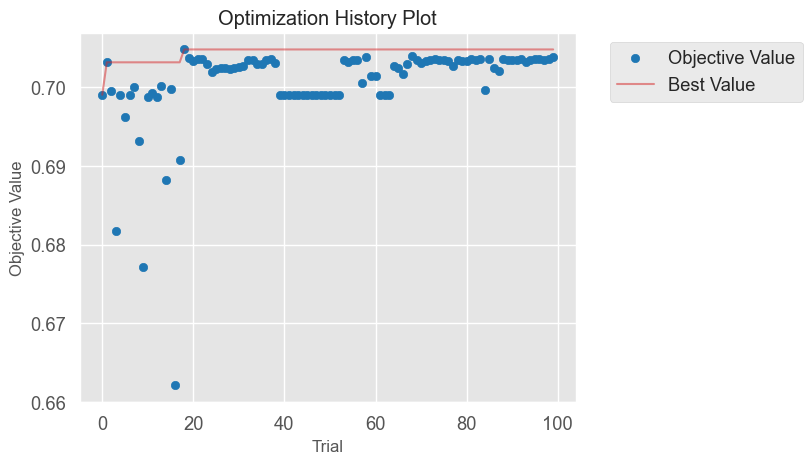

In [21]:
optuna.visualization.matplotlib.plot_optimization_history(study_lr)

In [22]:
# Printing the best parameter outcomes
params_lr = study_lr.best_params
print(params_lr)

{'solver_penalty': ('lbfgs', 'l2'), 'C': 71.1803743158674, 'tol': 0.0004769608440982811, 'verbose': 1}


In [23]:
# Listing the best parameters for modeling
final_params_lr = study_lr.best_trial.params.copy()

In [24]:
# Separating solver and penalty
solver, penalty = final_params_lr.pop('solver_penalty')

# Add them separately
final_params_lr['solver'] = solver
final_params_lr['penalty'] = penalty

In [25]:
# Instantiating the classifier 
model_lr_tuned = LogisticRegression(**final_params_lr, random_state=123)

# Fitting the model
model_lr_tuned.fit(X_train_EK_full, y_train_full)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           38     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  1.43868D-01


 This problem is unconstrained.



At iterate   50    f=  5.95631D-01    |proj g|=  1.22816D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   38     91     96      1     0     0   3.555D-04   5.939D-01
  F =  0.59389769463114161     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished


LogisticRegression(C=71.1803743158674, random_state=123,
                   tol=0.0004769608440982811, verbose=1)

In [26]:
# Making predictions (test set)
y_pred_lr_tuned = model_lr_tuned.predict(X_test_EK)
y_proba_lr_tuned = model_lr_tuned.predict_proba(X_test_EK)
y_proba_lr_tuned_pos = y_proba_lr_tuned[:, 1]

In [27]:
# Making predictions (train set)
y_pred_lr_tuned_train = model_lr_tuned.predict(X_train_EK_full)
y_proba_lr_tuned_train = model_lr_tuned.predict_proba(X_train_EK_full)
y_proba_lr_tuned_train_pos = y_proba_lr_tuned_train[:, 1]

#### Evaluating logistic regression

In [28]:
# Evaluating the prediction performance (test set)
evaluate(y_test, y_pred_lr_tuned, y_proba_lr_tuned_pos, "logistic regression with manual feature selection (test set)")

Evaluation metrics for logistic regression with manual feature selection (test set):
Accuracy: 0.6403
Precision: 0.4077
Recall: 0.7416
F1 Score: 0.5262
AUC-ROC: 0.7289
Precision-Recall AUC: 0.4542


In [29]:
# Evaluating the prediction performance (train set)
evaluate(y_train_full, y_pred_lr_tuned_train, y_proba_lr_tuned_train_pos, "logistic regression with manual feature selection (train set)")

Evaluation metrics for logistic regression with manual feature selection (train set):
Accuracy: 0.6766
Precision: 0.6501
Recall: 0.7646
F1 Score: 0.7027
AUC-ROC: 0.7417
Precision-Recall AUC: 0.7239


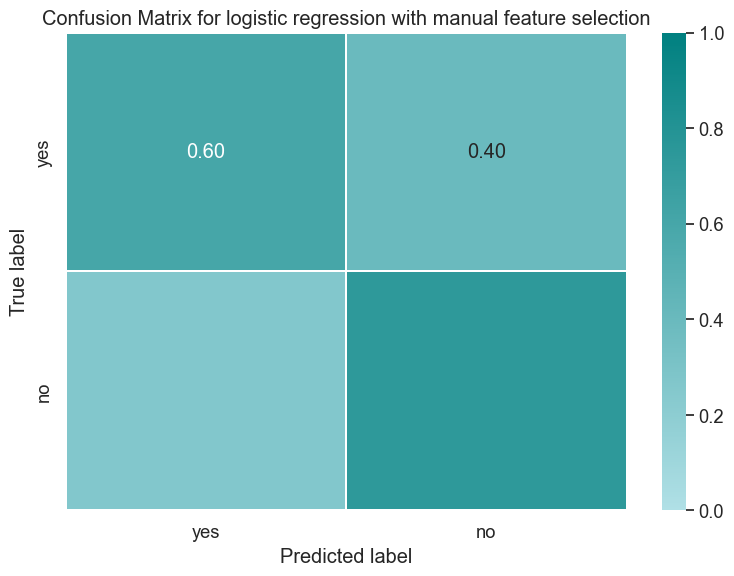

In [30]:
# Plotting the confusion matrix
plot_confusion_matrix(y_test, y_pred_lr_tuned, "logistic regression with manual feature selection")

In [31]:
# Printing the classification report
print(classification_report(y_test, y_pred_lr_tuned, target_names = ['yes', 'no']))

              precision    recall  f1-score   support

         yes       0.86      0.60      0.71      5440
          no       0.41      0.74      0.53      2005

    accuracy                           0.64      7445
   macro avg       0.64      0.67      0.62      7445
weighted avg       0.74      0.64      0.66      7445



### Random forest

In [32]:
# Code inspired by:
# https://stackoverflow.com/questions/55591063/how-to-perform-smote-with-cross-validation-in-sklearn-in-python
# https://github.com/optuna/optuna
# https://medium.com/@taeefnajib/hyperparameter-tuning-using-optuna-c46d7b29a3e
# https://medium.com/@moussadoumbia_90919/mastering-hyperparameter-optimization-with-optuna-a-comprehensive-guide-0bd6b4b1bc67
# https://www.kaggle.com/code/mustafagerme/optimization-of-random-forest-model-using-optuna

# Defining an objective function to be maximized using pre-defined train/val splits
def objective_rf(trial):
    # Defining the hyperparameters to be tuned
    n_estimators = trial.suggest_int("n_estimators", 100, 700, step=50)
    max_depth = trial.suggest_int("max_depth", 2, 32)
    max_features = trial.suggest_categorical("max_features", ['log2', 'sqrt'])
    criterion = trial.suggest_categorical("criterion", ['gini', 'entropy', 'log_loss'])
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    bootstrap = trial.suggest_categorical("bootstrap", [True, False])
    
    # Defining model with trial hyperparameters
    params_rf = dict(max_depth=max_depth,
                     n_estimators=n_estimators,
                     max_features=max_features,
                     criterion=criterion,
                     min_samples_leaf=min_samples_leaf, 
                     min_samples_split=min_samples_split,
                     bootstrap=bootstrap
                     )
    model_rf = RandomForestClassifier(**params_rf, random_state=123, n_jobs=-1)
    
    # Fitting on training data
    model_rf.fit(X_train_EK, y_train)
    
    # Predicting and evaluating on validation data
    y_pred = model_rf.predict(X_val_EK)
    f1 = f1_score(y_val, y_pred, average='binary')
    
    return float(f1)

# Running Optuna study
optuna.logging.set_verbosity(optuna.logging.DEBUG)
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=100, n_jobs=-1, timeout=600)

# Printing results
print('Number of finished trials:', len(study_rf.trials))
print('Best parameters:', study_rf.best_trial.params)
print('Best F1 score:', study_rf.best_value)

[I 2025-05-16 18:17:24,654] A new study created in memory with name: no-name-2845ea25-1722-45d8-971c-ef84bd93c749
[I 2025-05-16 18:17:35,737] Trial 3 finished with value: 0.7286624203821656 and parameters: {'n_estimators': 150, 'max_depth': 6, 'max_features': 'log2', 'criterion': 'gini', 'min_samples_split': 4, 'min_samples_leaf': 7, 'bootstrap': True}. Best is trial 3 with value: 0.7286624203821656.
[I 2025-05-16 18:17:48,015] Trial 6 finished with value: 0.7471211423307231 and parameters: {'n_estimators': 200, 'max_depth': 9, 'max_features': 'sqrt', 'criterion': 'gini', 'min_samples_split': 7, 'min_samples_leaf': 9, 'bootstrap': True}. Best is trial 6 with value: 0.7471211423307231.
[I 2025-05-16 18:17:49,538] Trial 0 finished with value: 0.7132657761400276 and parameters: {'n_estimators': 400, 'max_depth': 4, 'max_features': 'log2', 'criterion': 'entropy', 'min_samples_split': 3, 'min_samples_leaf': 10, 'bootstrap': True}. Best is trial 6 with value: 0.7471211423307231.
[I 2025-05-1

Number of finished trials: 49
Best parameters: {'n_estimators': 700, 'max_depth': 16, 'max_features': 'sqrt', 'criterion': 'log_loss', 'min_samples_split': 10, 'min_samples_leaf': 7, 'bootstrap': True}
Best F1 score: 0.7535655833528174


/var/folders/sn/xsphv8q94nj2rnmccxb2nftm0000gn/T/ipykernel_9154/1451018526.py:1: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study_rf)


<Axes: title={'center': 'Optimization History Plot'}, xlabel='Trial', ylabel='Objective Value'>

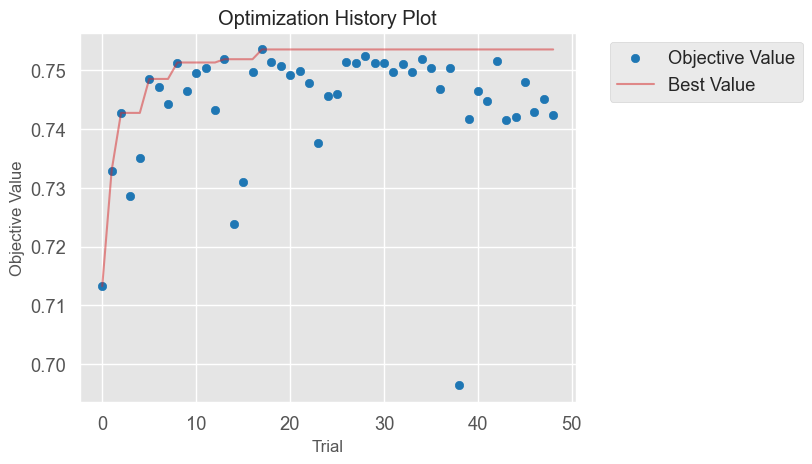

In [33]:
optuna.visualization.matplotlib.plot_optimization_history(study_rf)

In [34]:
# Printing the best parameter outcomes
params_rf = study_rf.best_params
print(params_rf)

{'n_estimators': 700, 'max_depth': 16, 'max_features': 'sqrt', 'criterion': 'log_loss', 'min_samples_split': 10, 'min_samples_leaf': 7, 'bootstrap': True}


In [35]:
# Listing the best parameters for modeling
final_params_rf = dict(max_depth=params_rf['max_depth'],
                       n_estimators=params_rf['n_estimators'],
                       max_features=params_rf['max_features'],
                       criterion=params_rf['criterion'],
                       min_samples_leaf=params_rf['min_samples_leaf'],
                       min_samples_split=params_rf['min_samples_split'],
                       bootstrap=params_rf['bootstrap']
                       )

In [36]:
# Instantiating the classifier 
model_rf_tuned = RandomForestClassifier(**final_params_rf, random_state=123)

# Fitting the model
model_rf_tuned.fit(X_train_EK_full, y_train_full)

RandomForestClassifier(criterion='log_loss', max_depth=16, min_samples_leaf=7,
                       min_samples_split=10, n_estimators=700,
                       random_state=123)

In [37]:
# Making predictions (test set)
y_pred_rf = model_rf_tuned.predict(X_test_EK)
y_proba_rf = model_rf_tuned.predict_proba(X_test_EK)
y_proba_rf_pos = y_proba_rf[:, 1]

In [38]:
# Making predictions (train set)
y_pred_rf_train = model_rf_tuned.predict(X_train_EK_full)
y_proba_rf_train = model_rf_tuned.predict_proba(X_train_EK_full)
y_proba_rf_train_pos = y_proba_rf_train[:, 1]

#### Evaluating random forest

In [39]:
# Evaluating the prediction performance (test set)
evaluate(y_test, y_pred_rf, y_proba_rf_pos, "random forest with manual feature selection (test set)")

Evaluation metrics for random forest with manual feature selection (test set):
Accuracy: 0.7487
Precision: 0.5245
Recall: 0.7157
F1 Score: 0.6054
AUC-ROC: 0.8103
Precision-Recall AUC: 0.5814


In [40]:
# Evaluating the prediction performance (train set)
evaluate(y_train_full, y_pred_rf_train, y_proba_rf_train_pos, "random forest with manual feature selection (train set)")

Evaluation metrics for random forest with manual feature selection (train set):
Accuracy: 0.8972
Precision: 0.8774
Recall: 0.9235
F1 Score: 0.8999
AUC-ROC: 0.9682
Precision-Recall AUC: 0.9681


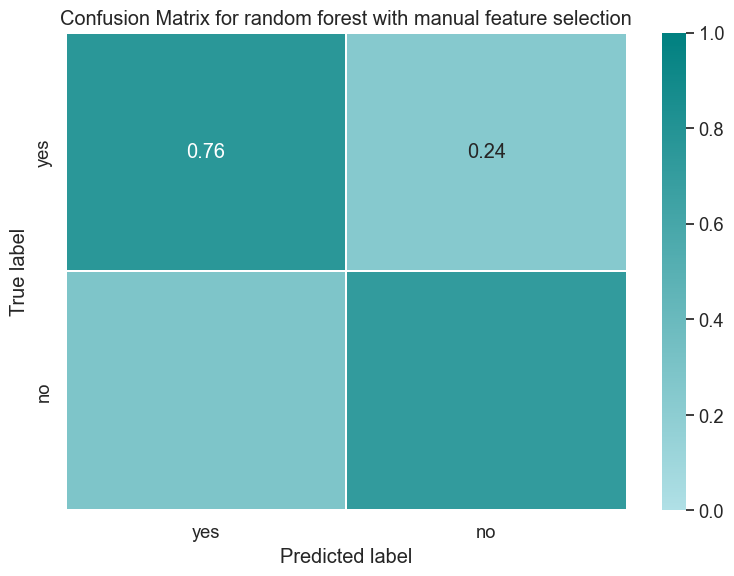

In [41]:
# Plotting the confusion matrix
plot_confusion_matrix(y_test, y_pred_rf, "random forest with manual feature selection")

In [42]:
# Printing the classification report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.88      0.76      0.82      5440
           1       0.52      0.72      0.61      2005

    accuracy                           0.75      7445
   macro avg       0.70      0.74      0.71      7445
weighted avg       0.78      0.75      0.76      7445



### XGBoost

In [43]:
# Code inspired by:
# https://stackoverflow.com/questions/55591063/how-to-perform-smote-with-cross-validation-in-sklearn-in-python
# https://github.com/optuna/optuna
# https://medium.com/@taeefnajib/hyperparameter-tuning-using-optuna-c46d7b29a3e
# https://medium.com/@moussadoumbia_90919/mastering-hyperparameter-optimization-with-optuna-a-comprehensive-guide-0bd6b4b1bc67
# https://www.kaggle.com/code/cahyaalkahfi/xgboost-model-tuning-using-optuna

# Defining an objective function to be maximized using pre-defined train/val splits
def objective_xgb(trial):
    # Defining the hyperparameters to be tuned
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3, log=True)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)
    min_child_weight = trial.suggest_int('min_child_weight', 1, 10)
    gamma = trial.suggest_float('gamma', 0, 5)
    
    # Defining model with trial hyperparameters
    params_xgb = dict(n_estimators=n_estimators,
                     max_depth=max_depth,
                     learning_rate=learning_rate,
                     subsample=subsample,
                     colsample_bytree=colsample_bytree, 
                     min_child_weight=min_child_weight,
                     gamma=gamma
                     )
    model_xgb = XGBClassifier(**params_xgb, random_state=123, n_jobs=-1)
    
    # Fitting on training data
    model_xgb.fit(X_train_EK, y_train)
    
    # Predicting and evaluating on validation data
    y_pred = model_xgb.predict(X_val_EK)
    f1 = f1_score(y_val, y_pred, average='binary')
    
    return float(f1)

# Running Optuna study
optuna.logging.set_verbosity(optuna.logging.DEBUG)
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=100, n_jobs=-1, timeout=600)

# Printing results
print('Number of finished trials:', len(study_xgb.trials))
print('Best parameters:', study_xgb.best_trial.params)
print('Best F1 score:', study_xgb.best_value)

[I 2025-05-16 18:31:08,483] A new study created in memory with name: no-name-f3a95e14-3b7c-4b5b-8e3b-4309aa4077ad
[I 2025-05-16 18:31:10,636] Trial 3 finished with value: 0.747275204359673 and parameters: {'n_estimators': 132, 'max_depth': 4, 'learning_rate': 0.014741421397619468, 'subsample': 0.9098795132352328, 'colsample_bytree': 0.702488464897745, 'min_child_weight': 4, 'gamma': 4.456898990013186}. Best is trial 3 with value: 0.747275204359673.
[I 2025-05-16 18:31:11,424] Trial 2 finished with value: 0.7615505972503944 and parameters: {'n_estimators': 112, 'max_depth': 6, 'learning_rate': 0.01679346426539481, 'subsample': 0.7251392953634559, 'colsample_bytree': 0.9932008976114918, 'min_child_weight': 10, 'gamma': 4.485229025777619}. Best is trial 2 with value: 0.7615505972503944.
[I 2025-05-16 18:31:12,802] Trial 4 finished with value: 0.8209399167162403 and parameters: {'n_estimators': 265, 'max_depth': 4, 'learning_rate': 0.09756254543672575, 'subsample': 0.7108500086164864, 'col

Number of finished trials: 100
Best parameters: {'n_estimators': 197, 'max_depth': 7, 'learning_rate': 0.08174030299897905, 'subsample': 0.7078049546386992, 'colsample_bytree': 0.9726584893366089, 'min_child_weight': 4, 'gamma': 4.520407006299456}
Best F1 score: 0.8251830852823057


/var/folders/sn/xsphv8q94nj2rnmccxb2nftm0000gn/T/ipykernel_9154/1860755764.py:1: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study_xgb)


<Axes: title={'center': 'Optimization History Plot'}, xlabel='Trial', ylabel='Objective Value'>

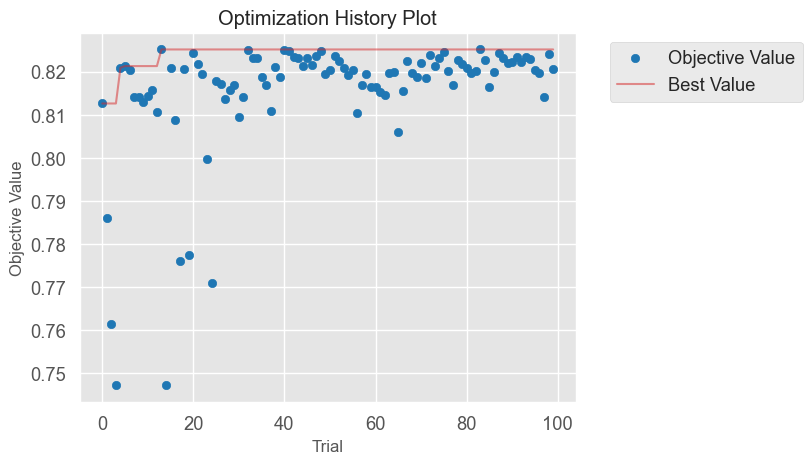

In [44]:
optuna.visualization.matplotlib.plot_optimization_history(study_xgb)

In [45]:
# Printing the best parameter outcomes
params_xgb = study_xgb.best_params
print(params_xgb)

{'n_estimators': 197, 'max_depth': 7, 'learning_rate': 0.08174030299897905, 'subsample': 0.7078049546386992, 'colsample_bytree': 0.9726584893366089, 'min_child_weight': 4, 'gamma': 4.520407006299456}


In [46]:
# Listing the best parameters for modeling
final_params_xgb = dict(max_depth=params_xgb['max_depth'],
                       learning_rate=params_xgb['learning_rate'],
                       n_estimators=params_xgb['n_estimators'],
                       subsample=params_xgb['subsample'],
                       colsample_bytree=params_xgb['colsample_bytree'],
                       min_child_weight=params_xgb['min_child_weight'],
                       gamma=params_xgb['gamma']
                       )

In [47]:
# Instantiating the classifier 
model_xgb_tuned = XGBClassifier(**final_params_xgb, random_state=123)

# Fitting the model
model_xgb_tuned.fit(X_train_EK_full, y_train_full)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9726584893366089, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=4.520407006299456, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.08174030299897905,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=197, n_jobs=None,
              num_parallel_tree=None, ...)

In [48]:
# Making predictions (test set)
y_pred_xgb = model_xgb_tuned.predict(X_test_EK)
y_proba_xgb = model_xgb_tuned.predict_proba(X_test_EK)
y_proba_xgb_pos = y_proba_xgb[:, 1]

In [49]:
# Making predictions (train set)
y_pred_xgb_train = model_xgb_tuned.predict(X_train_EK_full)
y_proba_xgb_train = model_xgb_tuned.predict_proba(X_train_EK_full)
y_proba_xgb_train_pos = y_proba_xgb_train[:, 1]

#### Evaluating XGBoost

In [50]:
# Evaluating the prediction performance (test set)
evaluate(y_test, y_pred_xgb, y_proba_xgb_pos, "XGBoost with manual feature selection (test set)")

Evaluation metrics for XGBoost with manual feature selection (test set):
Accuracy: 0.7727
Precision: 0.5763
Recall: 0.5895
F1 Score: 0.5828
AUC-ROC: 0.8132
Precision-Recall AUC: 0.5918


In [51]:
# Evaluating the prediction performance (train set)
evaluate(y_train_full, y_pred_xgb_train, y_proba_xgb_train_pos, "XGBoost with manual feature selection (train set)")

Evaluation metrics for XGBoost with manual feature selection (train set):
Accuracy: 0.8742
Precision: 0.8837
Recall: 0.8618
F1 Score: 0.8726
AUC-ROC: 0.9517
Precision-Recall AUC: 0.9577


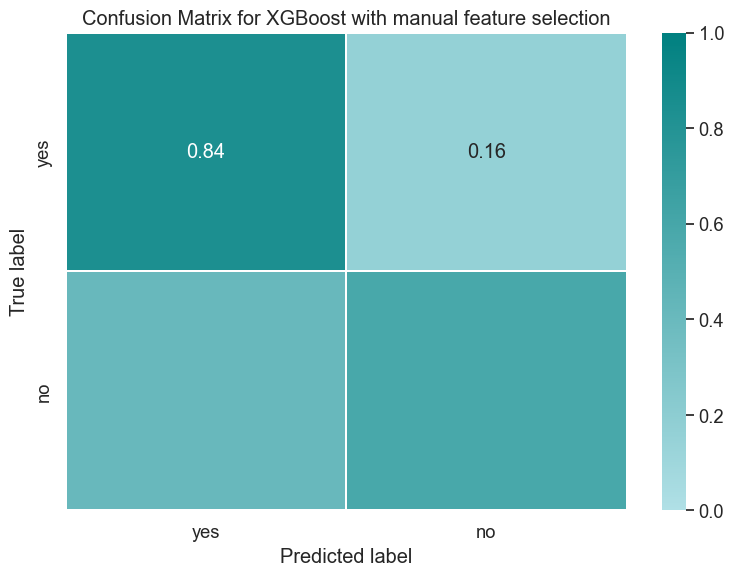

In [52]:
# Plotting the confusion matrix
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost with manual feature selection")

In [53]:
# Printing the classification report
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      5440
           1       0.58      0.59      0.58      2005

    accuracy                           0.77      7445
   macro avg       0.71      0.71      0.71      7445
weighted avg       0.77      0.77      0.77      7445



## SHAP

In [54]:
!pip install shap

In [55]:
import shap

In [56]:
feature_names = X_train_EK_full.columns.tolist()

In [57]:
X_train_EK_full = X_train_EK_full.values.astype(float)

In [58]:
X_train_EK_full = pd.DataFrame(X_train_EK_full, columns=feature_names)

### Baseline logistic regression SHAP analysis

In [59]:
# Code inspired by:
# https://github.com/jw-uvt/master-s-thesis-DS-S
# Calculating SHAP values
explainer_baseline_LR = shap.LinearExplainer(model_lr, X_train_EK_full)
shap_values_baseline_LR = explainer_baseline_LR(X_train_EK_full)

In [60]:
# Confirming shapes match before plotting
print("shap_values_LR shape:", shap_values_baseline_LR.shape)
print("X_train_EK_full shape:", X_train_EK_full.shape)

shap_values_LR shape: (43522, 37)
X_train_EK_full shape: (43522, 37)


In [61]:
# Ensuring that column names are included
shap_values_baseline_LR_expl = shap.Explanation(
    values=shap_values_baseline_LR,
    base_values=explainer_baseline_LR.expected_value,
    data=X_train_EK_full,
    feature_names=X_train_EK_full.columns.tolist()
)

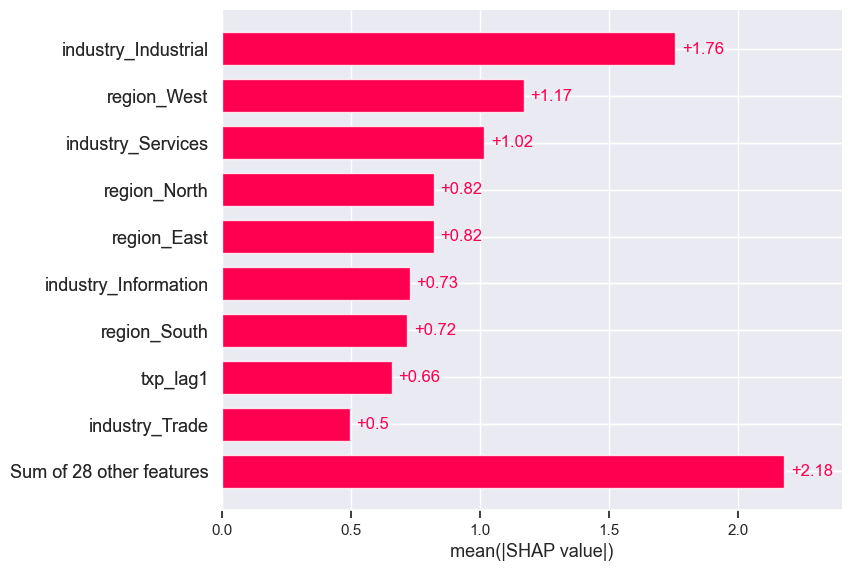

In [62]:
shap.plots.bar(shap_values_baseline_LR_expl)

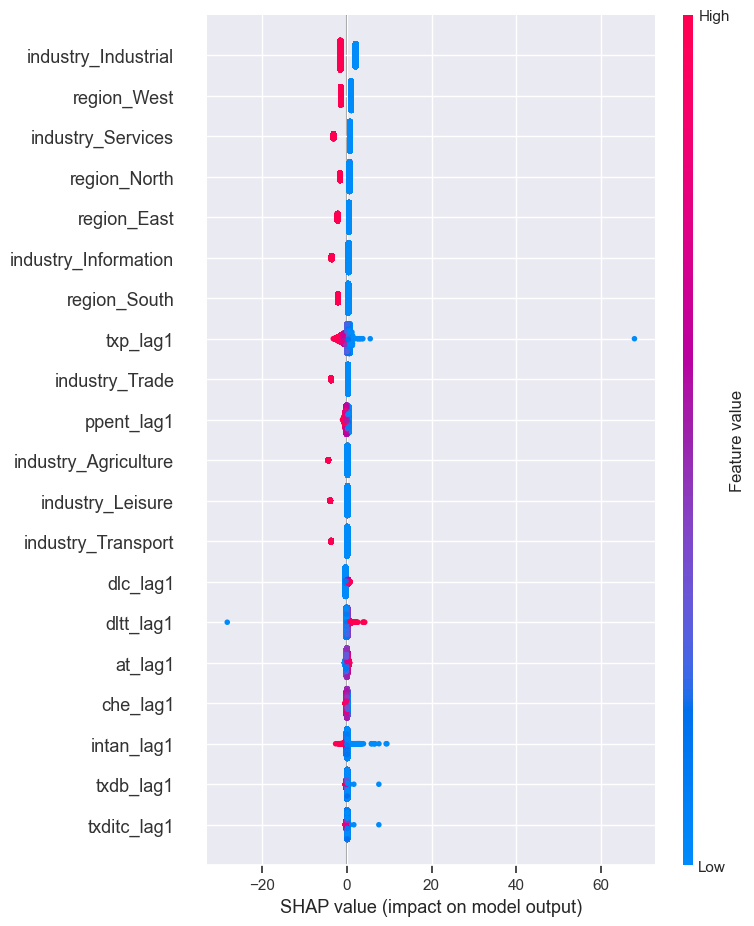

In [63]:
shap_values_baseline_LR_expl = shap_values_baseline_LR_expl.values.astype(float)
shap.summary_plot(shap_values_baseline_LR_expl, X_train_EK_full, max_display=20)

In [64]:
# Calculating absolute SHAP values
abs_shap_values_LR = np.abs(shap_values_baseline_LR_expl)

# Summing for each feature across all samples
overall_shap_values_baseline_LR = np.sum(shap_values_baseline_LR_expl, axis=0)

# Sorting features based on their absolute SHAP values
sorted_features_indices_baseline_LR = np.argsort(overall_shap_values_baseline_LR)[::-1]
sorted_features_baseline_LR = [feature_names[i] for i in sorted_features_indices_baseline_LR]

for feature_LR, shap_value_LR in zip(sorted_features_baseline_LR, overall_shap_values_baseline_LR[sorted_features_indices_baseline_LR]):
    print(f"Feature: {feature_LR}, Overall SHAP Value: {shap_value_LR}")

Feature: industry_Services, Overall SHAP Value: 8590.240233138125
Feature: region_North, Overall SHAP Value: 7937.443513093459
Feature: region_West, Overall SHAP Value: 3196.2600833252027
Feature: txp_lag1, Overall SHAP Value: 2314.7060008372155
Feature: industry_Agriculture, Overall SHAP Value: 1664.9279670882559
Feature: industry_Leisure, Overall SHAP Value: 889.5120978539311
Feature: industry_Industrial, Overall SHAP Value: 757.579457865318
Feature: che_lag1, Overall SHAP Value: 706.4459116394205
Feature: dlc_lag1, Overall SHAP Value: 672.9064567250359
Feature: dltt_lag1, Overall SHAP Value: 600.548114482436
Feature: txw_lag1, Overall SHAP Value: 355.03144974936566
Feature: txdb_lag1, Overall SHAP Value: 120.9466867607856
Feature: txditc_lag1, Overall SHAP Value: 120.9466867607856
Feature: ceq_lag1, Overall SHAP Value: 67.15507922238808
Feature: ppegt_lag1, Overall SHAP Value: 22.613868040349377
Feature: fyear_sin, Overall SHAP Value: 7.180504882054452
Feature: pi_lag1, Overall SHAP

In [65]:
total_features_baseline_LR = len(sorted_features_baseline_LR)

# Counting number of features with overall SHAP value of 0
zero_shap_count_baseline_LR = np.count_nonzero(overall_shap_values_baseline_LR == 0)

print(f"Total number of features: {total_features_baseline_LR}")
print(f"Number of features with overall SHAP value of 0: {zero_shap_count_baseline_LR}")

Total number of features: 37
Number of features with overall SHAP value of 0: 0


### Logistic regression SHAP analysis

In [66]:
# Calculating SHAP values
explainer_LR = shap.LinearExplainer(model_lr_tuned, X_train_EK_full)
shap_values_LR = explainer_LR(X_train_EK_full)

In [67]:
# Confirming shapes match before plotting
print("shap_values_LR shape:", shap_values_LR.shape)
print("X_train_EK_full shape:", X_train_EK_full.shape)

shap_values_LR shape: (43522, 37)
X_train_EK_full shape: (43522, 37)


In [68]:
# Ensuring that column names are included
shap_values_LR_expl = shap.Explanation(
    values=shap_values_LR,
    base_values=explainer_LR.expected_value,
    data=X_train_EK_full,
    feature_names=X_train_EK_full.columns.tolist()
)

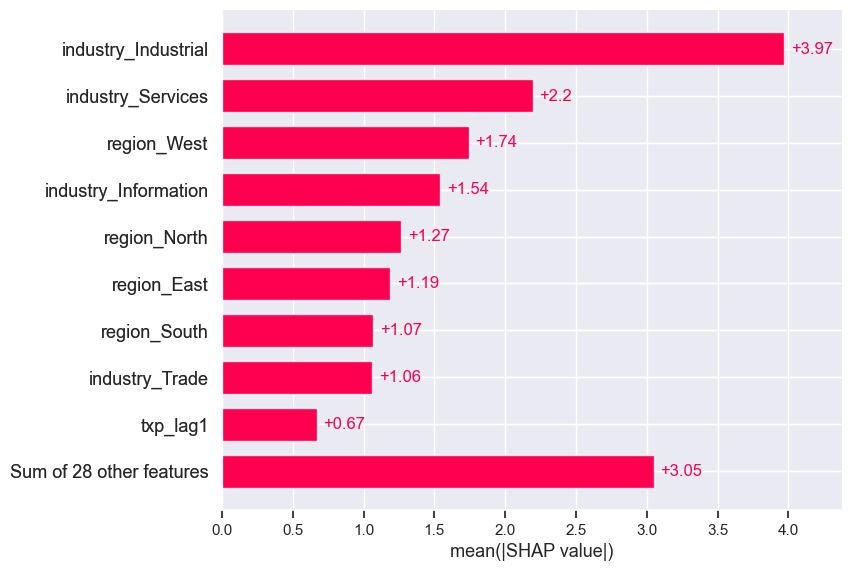

In [69]:
shap.plots.bar(shap_values_LR_expl)

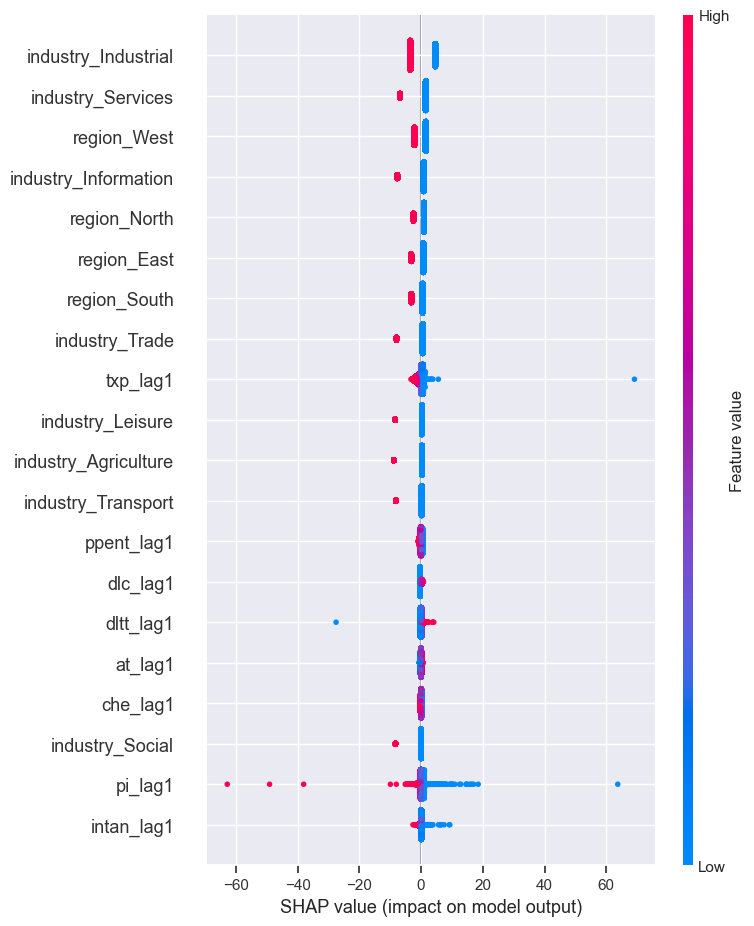

In [70]:
shap_values_LR_expl = shap_values_LR_expl.values.astype(float)
shap.summary_plot(shap_values_LR_expl, X_train_EK_full, max_display=20)

In [71]:
# Calculating absolute SHAP values
abs_shap_values_LR = np.abs(shap_values_LR_expl)

# Summing for each feature across all samples
overall_shap_values_LR = np.sum(shap_values_LR_expl, axis=0)

# Sorting features based on their absolute SHAP values
sorted_features_indices_LR = np.argsort(overall_shap_values_LR)[::-1]
sorted_features_LR = [feature_names[i] for i in sorted_features_indices_LR]

for feature_LR, shap_value_LR in zip(sorted_features_LR, overall_shap_values_LR[sorted_features_indices_LR]):
    print(f"Feature: {feature_LR}, Overall SHAP Value: {shap_value_LR}")

Feature: industry_Services, Overall SHAP Value: 18556.15957627591
Feature: region_North, Overall SHAP Value: 12236.221884564924
Feature: region_West, Overall SHAP Value: 4763.490217787434
Feature: industry_Agriculture, Overall SHAP Value: 3334.3067297702055
Feature: txp_lag1, Overall SHAP Value: 2354.9369562542097
Feature: industry_Leisure, Overall SHAP Value: 1893.67622124825
Feature: industry_Industrial, Overall SHAP Value: 1711.2753347070675
Feature: che_lag1, Overall SHAP Value: 720.5795890077839
Feature: dlc_lag1, Overall SHAP Value: 648.7392602373324
Feature: dltt_lag1, Overall SHAP Value: 584.9301086625841
Feature: txw_lag1, Overall SHAP Value: 316.40262357325713
Feature: txdb_lag1, Overall SHAP Value: 120.50918942883375
Feature: txditc_lag1, Overall SHAP Value: 120.50918942883375
Feature: ceq_lag1, Overall SHAP Value: 95.3636054635004
Feature: fyear_sin, Overall SHAP Value: 12.383425162215527
Feature: ppegt_lag1, Overall SHAP Value: 11.673776827534429
Feature: pi_lag1, Overall 

In [72]:
total_features_LR = len(sorted_features_LR)

# Counting number of features with overall SHAP value of 0
zero_shap_count_LR = np.count_nonzero(overall_shap_values_LR == 0)

print(f"Total number of features: {total_features_LR}")
print(f"Number of features with overall SHAP value of 0: {zero_shap_count_LR}")

Total number of features: 37
Number of features with overall SHAP value of 0: 0


### Random forest SHAP analysis

In [73]:
# Calculating SHAP values
explainer_RF = shap.TreeExplainer(model_rf_tuned, X_train_EK_full)
shap_values_RF = explainer_RF(X_train_EK_full, approximate=True)

#### Class 1 (Tax Avoidance)

In [74]:
# Ensuring that column names are included
shap_values_RF_class_1 = shap_values_RF[:, :, 1]
shap_values_RF_expl_1 = shap.Explanation(
    values=shap_values_RF_class_1,
    base_values=explainer_RF.expected_value[1],
    data=X_train_EK_full,
    feature_names=X_train_EK_full.columns.tolist()
)

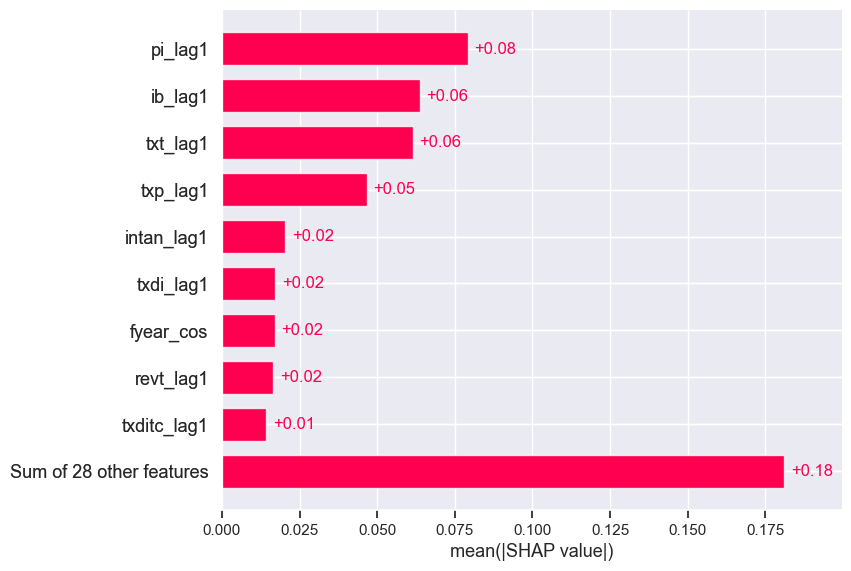

In [75]:
shap.plots.bar(shap_values_RF_expl_1)

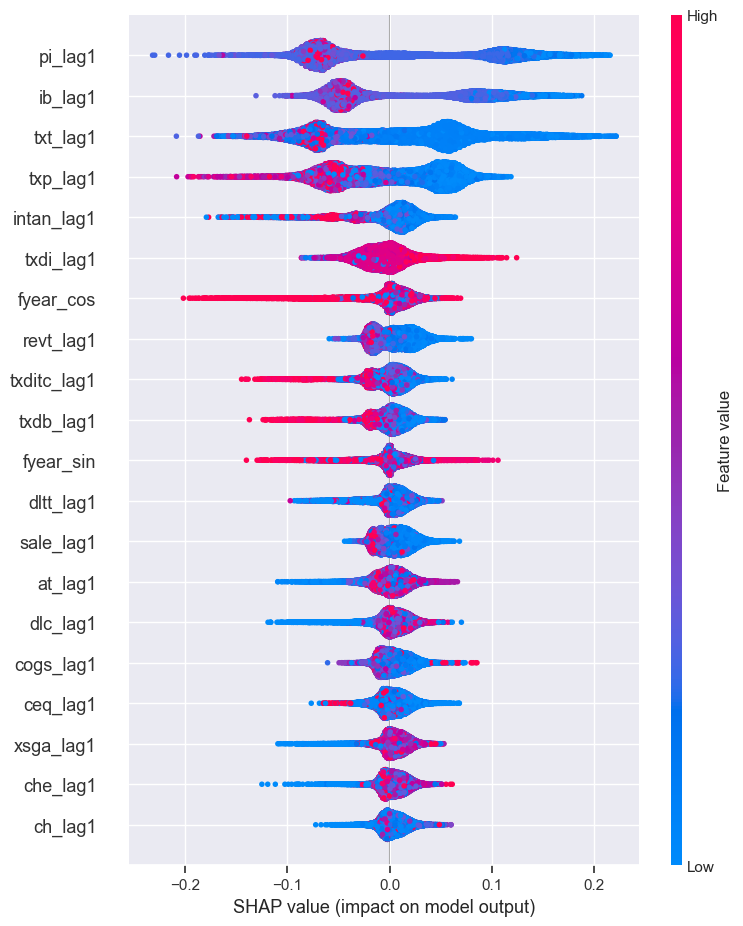

In [76]:
shap_values_RF_array_1 = shap_values_RF_class_1.values.astype(float)
shap.summary_plot(shap_values_RF_array_1, X_train_EK_full, max_display=20)

In [77]:
# Absolute SHAP values
abs_shap_values_RF_1 = np.abs(shap_values_RF_array_1)

# Overall importance per feature
overall_shap_values_RF_1 = np.sum(abs_shap_values_RF_1, axis=0)

# Sort features by importance
feature_names = X_train_EK_full.columns.tolist()
sorted_indices_RF_1 = np.argsort(overall_shap_values_RF_1)[::-1]
sorted_features_RF_1 = [feature_names[i] for i in sorted_indices_RF_1]

# Display sorted feature importance
for feature, value in zip(sorted_features_RF_1, overall_shap_values_RF_1[sorted_indices_RF_1]):
    print(f"Feature: {feature}, Overall SHAP Value: {value}")

# Summary stats
total_features_RF_1 = len(sorted_features_RF_1)
zero_shap_count_RF_1 = np.count_nonzero(overall_shap_values_RF_1 == 0)

print(f"Total number of features: {total_features_RF_1}")
print(f"Number of features with overall SHAP value of 0: {zero_shap_count_RF_1}")

Feature: pi_lag1, Overall SHAP Value: 3445.0744904999115
Feature: ib_lag1, Overall SHAP Value: 2769.8608800523725
Feature: txt_lag1, Overall SHAP Value: 2677.232494250311
Feature: txp_lag1, Overall SHAP Value: 2032.5404033880634
Feature: intan_lag1, Overall SHAP Value: 887.2628237712953
Feature: txdi_lag1, Overall SHAP Value: 744.900379089854
Feature: fyear_cos, Overall SHAP Value: 740.2547999116451
Feature: revt_lag1, Overall SHAP Value: 717.8781705595429
Feature: txditc_lag1, Overall SHAP Value: 620.9109936497058
Feature: txdb_lag1, Overall SHAP Value: 586.2615557712783
Feature: fyear_sin, Overall SHAP Value: 580.8306225567371
Feature: dltt_lag1, Overall SHAP Value: 574.1873181770035
Feature: sale_lag1, Overall SHAP Value: 563.3588600847891
Feature: at_lag1, Overall SHAP Value: 549.1255293430906
Feature: dlc_lag1, Overall SHAP Value: 538.4026665903881
Feature: cogs_lag1, Overall SHAP Value: 502.06250714029375
Feature: ceq_lag1, Overall SHAP Value: 491.1720551666703
Feature: xsga_lag1

#### Class 0: No Tax Avoidance

In [78]:
# Ensuring that column names are included
shap_values_RF_class_0 = shap_values_RF[:, :, 0]
shap_values_RF_expl_0 = shap.Explanation(
    values=shap_values_RF_class_0,
    base_values=explainer_RF.expected_value[0],
    data=X_train_EK_full.values,
    feature_names=X_train_EK_full.columns.tolist()
)

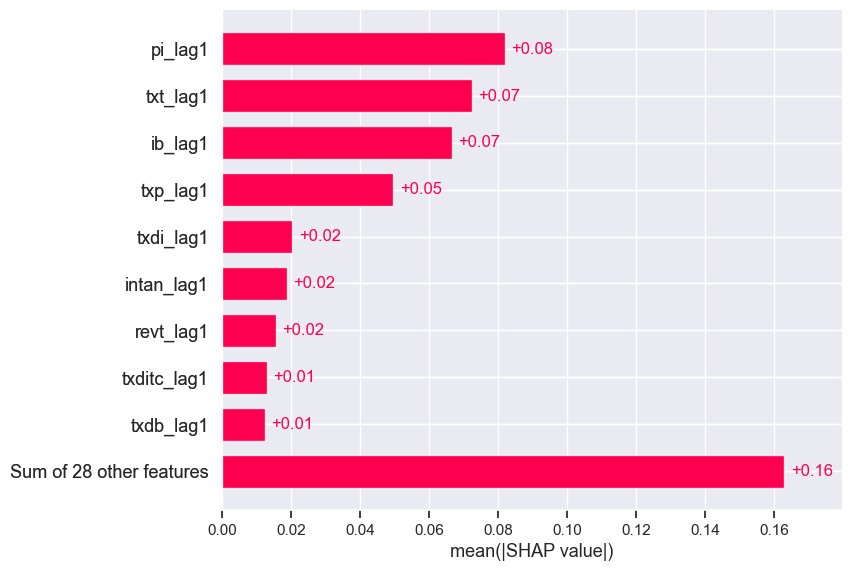

In [79]:
shap.plots.bar(shap_values_RF_expl_0)

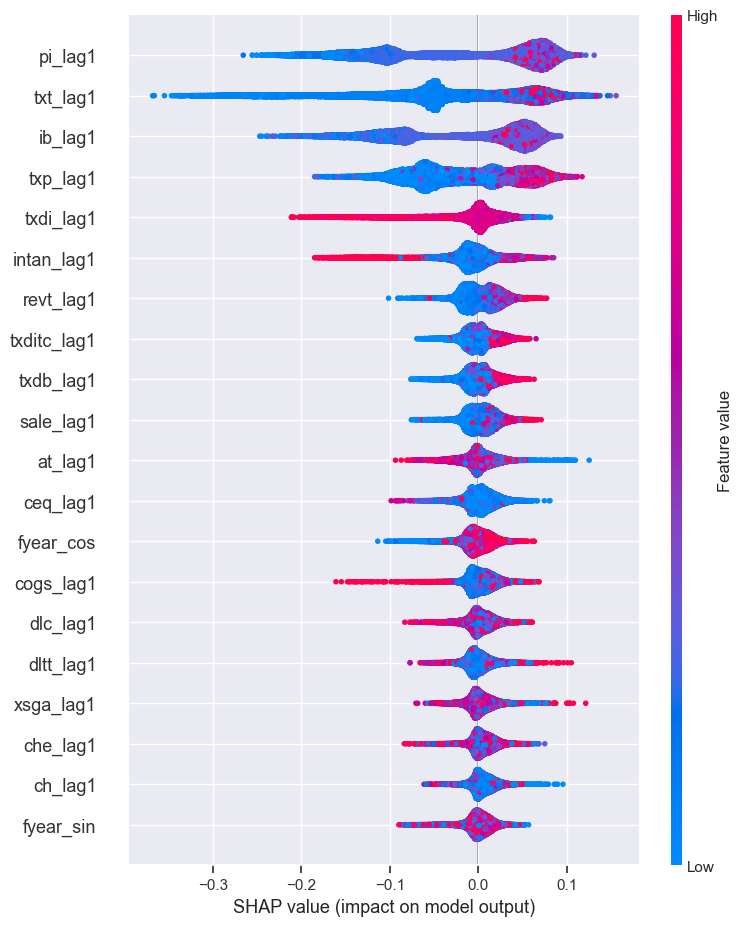

In [80]:
shap_values_RF_array_0 = shap_values_RF_class_0.values.astype(float)
shap.summary_plot(shap_values_RF_array_0, X_train_EK_full, max_display=20)

In [81]:
# Absolute SHAP values
abs_shap_values_RF_0 = np.abs(shap_values_RF_array_0)

# Overall importance per feature
overall_shap_values_RF_0 = np.sum(abs_shap_values_RF_0, axis=0)

# Sort features by importance
feature_names = X_train_EK_full.columns.tolist()
sorted_indices_RF_0 = np.argsort(overall_shap_values_RF_0)[::-1]
sorted_features_RF_0 = [feature_names[i] for i in sorted_indices_RF_0]

# Display sorted feature importance
for feature, value in zip(sorted_features_RF_0, overall_shap_values_RF_0[sorted_indices_RF_0]):
    print(f"Feature: {feature}, Overall SHAP Value: {value}")

# Summary stats
total_features_RF_0 = len(sorted_features_RF_0)
zero_shap_count_RF_0 = np.count_nonzero(overall_shap_values_RF_0 == 0)

print(f"Total number of features: {total_features_RF_0}")
print(f"Number of features with overall SHAP value of 0: {zero_shap_count_RF_0}")

Feature: pi_lag1, Overall SHAP Value: 3563.347033918903
Feature: txt_lag1, Overall SHAP Value: 3147.6053063770614
Feature: ib_lag1, Overall SHAP Value: 2895.5843639350273
Feature: txp_lag1, Overall SHAP Value: 2162.30072540493
Feature: txdi_lag1, Overall SHAP Value: 884.4095256872897
Feature: intan_lag1, Overall SHAP Value: 815.5475159206172
Feature: revt_lag1, Overall SHAP Value: 675.728425352341
Feature: txditc_lag1, Overall SHAP Value: 563.1393916913911
Feature: txdb_lag1, Overall SHAP Value: 537.9753228292647
Feature: sale_lag1, Overall SHAP Value: 537.0871408837606
Feature: at_lag1, Overall SHAP Value: 534.2997541798627
Feature: ceq_lag1, Overall SHAP Value: 519.7966817684128
Feature: fyear_cos, Overall SHAP Value: 490.09937715793484
Feature: cogs_lag1, Overall SHAP Value: 471.4409480513487
Feature: dlc_lag1, Overall SHAP Value: 459.1494934222686
Feature: dltt_lag1, Overall SHAP Value: 434.2356252450411
Feature: xsga_lag1, Overall SHAP Value: 426.19213097384926
Feature: che_lag1, 

### XGBoost SHAP analysis

In [82]:
# Calculating SHAP values
explainer_XGB = shap.TreeExplainer(model_xgb_tuned, X_train_EK_full)
shap_values_XGB = explainer_XGB(X_train_EK_full)

100%|===================| 43521/43522 [03:21<00:00]        

In [83]:
# Confirm shapes match before plotting
print("shap_values_XGB shape:", shap_values_XGB.shape)
print("X_train_EK_full shape:", X_train_EK_full.shape)

shap_values_XGB shape: (43522, 37)
X_train_EK_full shape: (43522, 37)


In [84]:
# Ensure that column names are included
shap_values_XGB_expl = shap.Explanation(
    values=shap_values_XGB,
    base_values=explainer_XGB.expected_value,
    data=X_train_EK_full,
    feature_names=X_train_EK_full.columns.tolist()
)

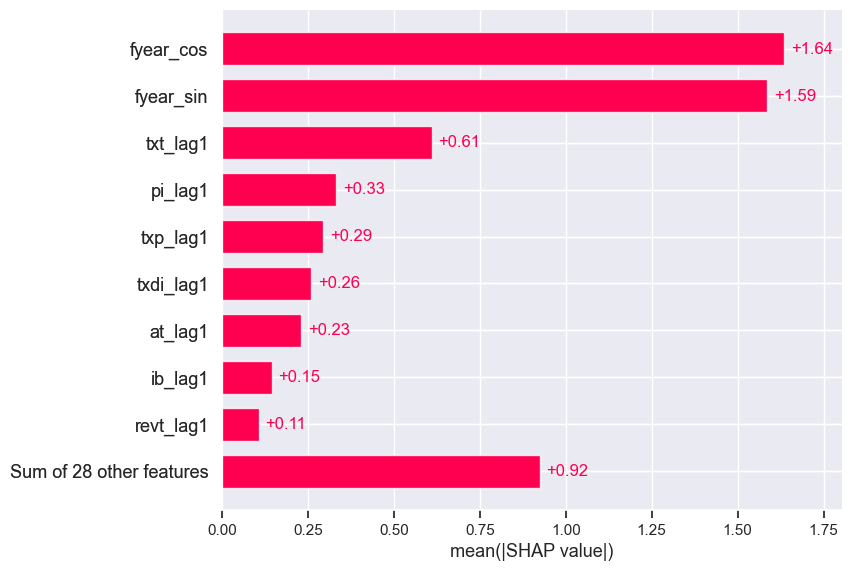

In [85]:
shap.plots.bar(shap_values_XGB_expl)

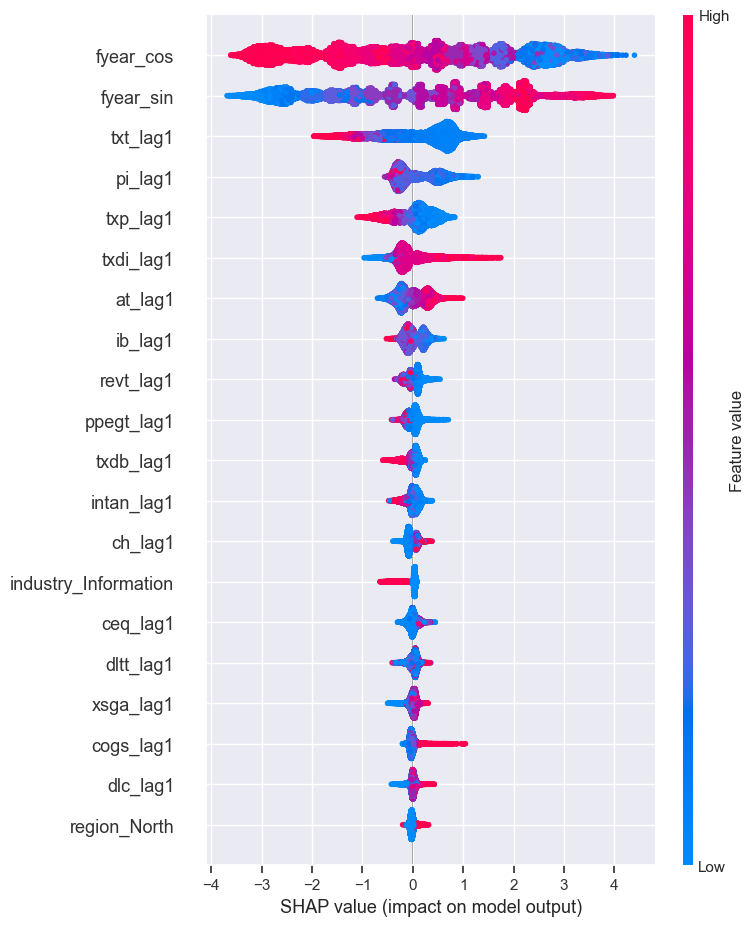

In [86]:
shap_values_XGB_expl = shap_values_XGB_expl.values.astype(float)
shap.summary_plot(shap_values_XGB_expl, X_train_EK_full, max_display=20)

In [87]:
# Calculating absolute SHAP values
abs_shap_values_XGB = np.abs(shap_values_XGB_expl)

# Summing for each feature across all samples
overall_shap_values_XGB = np.sum(shap_values_XGB_expl, axis=0)

# Sorting features based on their absolute SHAP values
sorted_features_indices_XGB = np.argsort(overall_shap_values_XGB)[::-1]
sorted_features_XGB = [feature_names[i] for i in sorted_features_indices_XGB]

for feature_XGB, shap_value_XGB in zip(sorted_features_XGB, overall_shap_values_XGB[sorted_features_indices_XGB]):
    print(f"Feature: {feature_XGB}, Overall SHAP Value: {shap_value_XGB}")

Feature: txt_lag1, Overall SHAP Value: 5887.567968231703
Feature: fyear_cos, Overall SHAP Value: 3351.3632283847114
Feature: pi_lag1, Overall SHAP Value: 2399.3629563354516
Feature: txp_lag1, Overall SHAP Value: 1271.3837625926512
Feature: ib_lag1, Overall SHAP Value: 1102.1289802208544
Feature: dltt_lag1, Overall SHAP Value: 872.5351840582567
Feature: revt_lag1, Overall SHAP Value: 561.4091653548999
Feature: intan_lag1, Overall SHAP Value: 360.32978914823013
Feature: ceq_lag1, Overall SHAP Value: 347.4536261706569
Feature: che_lag1, Overall SHAP Value: 258.27240182826796
Feature: industry_Information, Overall SHAP Value: 205.19075448414222
Feature: industry_Services, Overall SHAP Value: 196.0717477456614
Feature: industry_Leisure, Overall SHAP Value: 172.07284508727554
Feature: industry_Industrial, Overall SHAP Value: 160.6926289719584
Feature: xsga_lag1, Overall SHAP Value: 138.8110277509408
Feature: txdb_lag1, Overall SHAP Value: 105.90533129770456
Feature: industry_Agriculture, Ove

In [88]:
total_features_XGB = len(sorted_features_XGB)

# Counting number of features with overall SHAP value of 0
zero_shap_count_XGB = np.count_nonzero(overall_shap_values_XGB == 0)

print(f"Total number of features: {total_features_XGB}")
print(f"Number of features with overall SHAP value of 0: {zero_shap_count_XGB}")

Total number of features: 37
Number of features with overall SHAP value of 0: 0
